    INTRODUCTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) from: City from which the flight takes off. It is a categorical feature having 6 unique cities.
3) dep_time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
4) Stop: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
5) arr_time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
6) to: City where the flight will land. It is a categorical feature having 6 unique cities.
7) time_taken: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset:

In [2]:
df_bus = pd.read_csv('business.csv')
df_bus['class'] = 'business'
df_eco = pd.read_csv('economy.csv')
df_eco['class'] = 'economy'
df = pd.concat([df_eco,df_bus], axis = 0)
df.head()

date   airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  SpiceJet      SG      8709    18:55  Delhi    02h 10m   
1  11-02-2022  SpiceJet      SG      8157    06:20  Delhi    02h 20m   
2  11-02-2022   AirAsia      I5       764    04:25  Delhi    02h 10m   
3  11-02-2022   Vistara      UK       995    10:20  Delhi    02h 15m   
4  11-02-2022   Vistara      UK       963    08:50  Delhi    02h 20m   

        stop arr_time      to  price    class  
0  non-stop     21:05  Mumbai  5,953  economy  
1  non-stop     08:40  Mumbai  5,953  economy  
2  non-stop     06:35  Mumbai  5,956  economy  
3  non-stop     12:35  Mumbai  5,955  economy  
4  non-stop     11:10  Mumbai  5,955  economy

### Checking the basic informations of the datasets:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300261 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 29.8+ MB


In [4]:
df.shape

(300261, 12)

In [5]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
dtype: int64

In [6]:
df[df.duplicated()]

date    airline ch_code  num_code dep_time   from time_taken  \
563   14-02-2022  Air India      AI       807    17:20  Delhi    15h 15m   
6181  13-03-2022  Air India      AI       475    13:00  Delhi    24h 35m   

                                                   stop arr_time      to  \
563   1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    08:35  Mumbai   
6181  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    13:35  Mumbai   

       price    class  
563   12,150  economy  
6181   4,780  economy

### Checking for the anomolies:

In [7]:
# taking the columns as a list:
columns = df.columns.to_list()
columns

['date',
 'airline',
 'ch_code',
 'num_code',
 'dep_time',
 'from',
 'time_taken',
 'stop',
 'arr_time',
 'to',
 'price',
 'class']

In [8]:
sep_col = ['airline', 'ch_code', 'num_code', 'from', 'stop', 'to']

In [9]:
# check the value distribution in the above separated columns:
for i in sep_col:
    print((df[i].value_counts(normalize=True))*100)
    print('--------------------')

airline
Vistara      42.582620
Air India    26.941228
Indigo       14.360839
GO FIRST      7.718951
AirAsia       5.361336
SpiceJet      3.001056
StarAir       0.020316
Trujet        0.013655
Name: proportion, dtype: float64
--------------------
ch_code
UK    42.582620
AI    26.941228
6E    14.360839
G8     7.718951
I5     5.361336
SG     3.001056
S5     0.020316
2T     0.013655
Name: proportion, dtype: float64
--------------------
num_code
808     1.103373
706     1.077396
772     0.952505
774     0.935186
720     0.882566
          ...   
9991    0.000333
150     0.000333
5003    0.000333
6613    0.000333
9923    0.000333
Name: proportion, Length: 1255, dtype: float64
--------------------
from
Delhi        20.430559
Mumbai       20.283353
Bangalore    17.353569
Kolkata      15.435571
Hyderabad    13.608161
Chennai      12.888787
Name: proportion, dtype: float64
--------------------
stop
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      81.130417
non-stop

### Treating the anomolies and duplicates:

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df[df.duplicated()]

Empty DataFrame
Columns: [date, airline, ch_code, num_code, dep_time, from, time_taken, stop, arr_time, to, price, class]
Index: []

In [12]:
import pandas as pd
import re

def extract_location_info(text):
    # Clean the string by removing newlines and tabs
    clean_text = re.sub(r'[\n\t]', ' ', text).strip()
    
    # Split the string into words
    words = clean_text.split()
    
    # Extract the first part (e.g., "1-stop") and last part (e.g., "Mysore")
    first_part = words[0]  # First word (e.g., "1-stop")
    last_part = words[-1]  # Last word (e.g., "Mysore")
    
    return first_part, last_part

# Apply the function to the 'Location' column
df[['stop', 'city']] = df['stop'].apply(lambda x: pd.Series(extract_location_info(x)))

# Show the updated DataFrame
df.head()


date   airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  SpiceJet      SG      8709    18:55  Delhi    02h 10m   
1  11-02-2022  SpiceJet      SG      8157    06:20  Delhi    02h 20m   
2  11-02-2022   AirAsia      I5       764    04:25  Delhi    02h 10m   
3  11-02-2022   Vistara      UK       995    10:20  Delhi    02h 15m   
4  11-02-2022   Vistara      UK       963    08:50  Delhi    02h 20m   

       stop arr_time      to  price    class      city  
0  non-stop    21:05  Mumbai  5,953  economy  non-stop  
1  non-stop    08:40  Mumbai  5,953  economy  non-stop  
2  non-stop    06:35  Mumbai  5,956  economy  non-stop  
3  non-stop    12:35  Mumbai  5,955  economy  non-stop  
4  non-stop    11:10  Mumbai  5,955  economy  non-stop

In [13]:
df.head()

date   airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  SpiceJet      SG      8709    18:55  Delhi    02h 10m   
1  11-02-2022  SpiceJet      SG      8157    06:20  Delhi    02h 20m   
2  11-02-2022   AirAsia      I5       764    04:25  Delhi    02h 10m   
3  11-02-2022   Vistara      UK       995    10:20  Delhi    02h 15m   
4  11-02-2022   Vistara      UK       963    08:50  Delhi    02h 20m   

       stop arr_time      to  price    class      city  
0  non-stop    21:05  Mumbai  5,953  economy  non-stop  
1  non-stop    08:40  Mumbai  5,953  economy  non-stop  
2  non-stop    06:35  Mumbai  5,956  economy  non-stop  
3  non-stop    12:35  Mumbai  5,955  economy  non-stop  
4  non-stop    11:10  Mumbai  5,955  economy  non-stop

In [14]:
df['stop'].unique()

array(['non-stop', '1-stop', '2+-stop'], dtype=object)

In [15]:
df['city'].unique()

array(['non-stop', '1-stop', 'IXU', 'Chennai', 'Indore', 'RPR', '2+-stop',
       'Lucknow', 'GOP', 'Raipur', 'Nagpur', 'Surat', 'Hyderabad', 'STV',
       'IDR', 'VTZ', 'Guwahati', 'NAG', 'Vishakhapatnam', 'NDC', 'IXE',
       'Patna', 'PAT', 'Mangalore', 'Mumbai', 'KLH', 'MYQ', 'Kolkata',
       'Delhi', 'Kolhapur', 'JRG', 'Bhubaneswar', 'Ranchi', 'IXR', 'JGB',
       'BBI', 'Mysore', 'GAY', 'GAU', 'HYD'], dtype=object)

In [16]:
df['city'].value_counts()

city
1-stop            243601
non-stop           36044
2+-stop            13288
IXU                 1839
IDR                 1398
Patna                674
Indore               381
PAT                  354
MYQ                  321
Bhubaneswar          301
KLH                  284
JGB                  193
JRG                  175
STV                  169
BBI                  158
Delhi                153
Hyderabad            143
IXE                  120
Ranchi               114
Raipur               102
Chennai               77
Guwahati              55
Mysore                45
Mangalore             39
Mumbai                31
Kolkata               28
VTZ                   27
Nagpur                25
NDC                   22
RPR                   22
GOP                   16
Surat                 14
Lucknow               13
NAG                    9
Vishakhapatnam         8
Kolhapur               5
IXR                    4
GAY                    3
GAU                    3
HYD                 

In [17]:
df.replace({'non-stop': 'no_stop', '1-stop':'one_stop', '2+-stop': '2+_stops'}, inplace = True)

In [18]:
df['stop'].unique()

array(['no_stop', 'one_stop', '2+_stops'], dtype=object)

In [19]:
df.rename(columns = {'from': 'departure_city', 'to':'destination_city'}, inplace = True)

In [20]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'departure_city',
       'time_taken', 'stop', 'arr_time', 'destination_city', 'price', 'class',
       'city'],
      dtype='object')

In [21]:
# Changing the datatypes of the columns as required:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 93486
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   date              300259 non-null  object
 1   airline           300259 non-null  object
 2   ch_code           300259 non-null  object
 3   num_code          300259 non-null  int64 
 4   dep_time          300259 non-null  object
 5   departure_city    300259 non-null  object
 6   time_taken        300259 non-null  object
 7   stop              300259 non-null  object
 8   arr_time          300259 non-null  object
 9   destination_city  300259 non-null  object
 10  price             300259 non-null  object
 11  class             300259 non-null  object
 12  city              300259 non-null  object
dtypes: int64(1), object(12)
memory usage: 32.1+ MB


In [23]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [24]:
df['price'] = df['price'].str.replace(',','').astype('float')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 93486
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              300259 non-null  datetime64[ns]
 1   airline           300259 non-null  object        
 2   ch_code           300259 non-null  object        
 3   num_code          300259 non-null  int64         
 4   dep_time          300259 non-null  object        
 5   departure_city    300259 non-null  object        
 6   time_taken        300259 non-null  object        
 7   stop              300259 non-null  object        
 8   arr_time          300259 non-null  object        
 9   destination_city  300259 non-null  object        
 10  price             300259 non-null  float64       
 11  class             300259 non-null  object        
 12  city              300259 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usa

In [26]:
# Function to categorize times into segments
def categorize_time(dep_time):
    hour = int(dep_time.split(':')[0])
    if 4 <= hour < 8:
        return 'early morning'
    elif 8 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 16:
        return 'noon'
    elif 16 <= hour < 20:
        return 'evening'
    elif 20 <= hour <= 24:
        return 'night'
    else:
        return 'late night'

# Apply the function to the 'arr_time' column
df['dep_time'] = df['dep_time'].apply(categorize_time)
# Display the first few rows of the updated dataframe
df.head()


date   airline ch_code  num_code       dep_time departure_city  \
0 2022-02-11  SpiceJet      SG      8709        evening          Delhi   
1 2022-02-11  SpiceJet      SG      8157  early morning          Delhi   
2 2022-02-11   AirAsia      I5       764  early morning          Delhi   
3 2022-02-11   Vistara      UK       995        morning          Delhi   
4 2022-02-11   Vistara      UK       963        morning          Delhi   

  time_taken     stop arr_time destination_city   price    class     city  
0    02h 10m  no_stop    21:05           Mumbai  5953.0  economy  no_stop  
1    02h 20m  no_stop    08:40           Mumbai  5953.0  economy  no_stop  
2    02h 10m  no_stop    06:35           Mumbai  5956.0  economy  no_stop  
3    02h 15m  no_stop    12:35           Mumbai  5955.0  economy  no_stop  
4    02h 20m  no_stop    11:10           Mumbai  5955.0  economy  no_stop

In [27]:
# Function to categorize times into segments
def categorize_time(arr_time):
    hour = int(arr_time.split(':')[0])
    if 4 <= hour < 8:
        return 'early morning'
    elif 8 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 16:
        return 'noon'
    elif 16 <= hour < 20:
        return 'evening'
    elif 20 <= hour <= 24:
        return 'night'
    else:
        return 'late night'

# Apply the function to the 'arr_time' column
df['arr_time'] = df['arr_time'].apply(categorize_time)
# Display the first few rows of the updated dataframe
df.head()

date   airline ch_code  num_code       dep_time departure_city  \
0 2022-02-11  SpiceJet      SG      8709        evening          Delhi   
1 2022-02-11  SpiceJet      SG      8157  early morning          Delhi   
2 2022-02-11   AirAsia      I5       764  early morning          Delhi   
3 2022-02-11   Vistara      UK       995        morning          Delhi   
4 2022-02-11   Vistara      UK       963        morning          Delhi   

  time_taken     stop       arr_time destination_city   price    class  \
0    02h 10m  no_stop          night           Mumbai  5953.0  economy   
1    02h 20m  no_stop        morning           Mumbai  5953.0  economy   
2    02h 10m  no_stop  early morning           Mumbai  5956.0  economy   
3    02h 15m  no_stop           noon           Mumbai  5955.0  economy   
4    02h 20m  no_stop        morning           Mumbai  5955.0  economy   

      city  
0  no_stop  
1  no_stop  
2  no_stop  
3  no_stop  
4  no_stop

In [28]:
import re

# Enhanced function to handle variations in 'time_taken' formats
def convert_to_minutes_enhanced(time_str):
    if pd.isnull(time_str):
        return None
    # Extract hours and minutes using regex
    match = re.match(r"(?:(\d+)\.?(\d*)h)?\s*(?:(\d+)m)?", time_str.strip())
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(3)) if match.group(3) else 0
        return hours * 60 + minutes
    return None

# Apply the enhanced function to clean and convert the 'time_taken' data
df['time_taken'] = df['time_taken'].apply(convert_to_minutes_enhanced)
df['time_taken'] = df['time_taken']/60

# Basic statistics
df['time_taken'].describe()

count    300259.000000
mean         12.217706
std           7.192924
min           0.833333
25%           6.750000
50%          11.250000
75%          16.166667
max          49.833333
Name: time_taken, dtype: float64

In [29]:
df.head()

date   airline ch_code  num_code       dep_time departure_city  \
0 2022-02-11  SpiceJet      SG      8709        evening          Delhi   
1 2022-02-11  SpiceJet      SG      8157  early morning          Delhi   
2 2022-02-11   AirAsia      I5       764  early morning          Delhi   
3 2022-02-11   Vistara      UK       995        morning          Delhi   
4 2022-02-11   Vistara      UK       963        morning          Delhi   

   time_taken     stop       arr_time destination_city   price    class  \
0    2.166667  no_stop          night           Mumbai  5953.0  economy   
1    2.333333  no_stop        morning           Mumbai  5953.0  economy   
2    2.166667  no_stop  early morning           Mumbai  5956.0  economy   
3    2.250000  no_stop           noon           Mumbai  5955.0  economy   
4    2.333333  no_stop        morning           Mumbai  5955.0  economy   

      city  
0  no_stop  
1  no_stop  
2  no_stop  
3  no_stop  
4  no_stop

In [30]:
df.shape

(300259, 13)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 93486
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              300259 non-null  datetime64[ns]
 1   airline           300259 non-null  object        
 2   ch_code           300259 non-null  object        
 3   num_code          300259 non-null  int64         
 4   dep_time          300259 non-null  object        
 5   departure_city    300259 non-null  object        
 6   time_taken        300259 non-null  float64       
 7   stop              300259 non-null  object        
 8   arr_time          300259 non-null  object        
 9   destination_city  300259 non-null  object        
 10  price             300259 non-null  float64       
 11  class             300259 non-null  object        
 12  city              300259 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usag

 * Anomolies have been treated, dataset is ready to be explored

### Feature engineering:

In [32]:
df['day_of_week'] = df['date'].dt.day_name()
df['day_of_week'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

## Univariate analysis:

In [33]:
# Separating the numerical and categorical data
num = df.select_dtypes(include = np.number).columns.to_list()
categorical = df.select_dtypes(exclude = np.number).columns.to_list()

In [34]:
num

['num_code', 'time_taken', 'price']

In [35]:
categorical

['date',
 'airline',
 'ch_code',
 'dep_time',
 'departure_city',
 'stop',
 'arr_time',
 'destination_city',
 'class',
 'city',
 'day_of_week']

In [36]:
cat = ['airline',
 'ch_code',
 'dep_time',
 'departure_city',
 'stop',
 'arr_time',
 'destination_city',
 'city',
 'day_of_week']

### Numerical columns:

In [37]:
for i in num:
    print(i)
    print(df[i].describe())
    print('-------------')

num_code
count    300259.000000
mean       1417.776883
std        1974.519951
min         101.000000
25%         637.000000
50%         818.000000
75%         927.000000
max        9991.000000
Name: num_code, dtype: float64
-------------
time_taken
count    300259.000000
mean         12.217706
std           7.192924
min           0.833333
25%           6.750000
50%          11.250000
75%          16.166667
max          49.833333
Name: time_taken, dtype: float64
-------------
price
count    300259.000000
mean      20883.800386
std       22695.962230
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64
-------------


 * Average time taken by the flights to reach the destination is 11.54 Hours.
 * Travel duration of the flights ranges from 0.83 hours to 49.83 hours suggesting a wide range of travel duration.
 * Average ticket price for the economic class is Rs.6571.17.
 * Minimum and maximum fares of the economic class tickets are around Rs.1105 and Rs.42349 respectively indicating that there is a good range of ticket prices within the economic class tickets.
 * The distribution of all three columns seems to have skewed right , showing that there are instances where the value is higher pushing the value to the tail of the dataset.

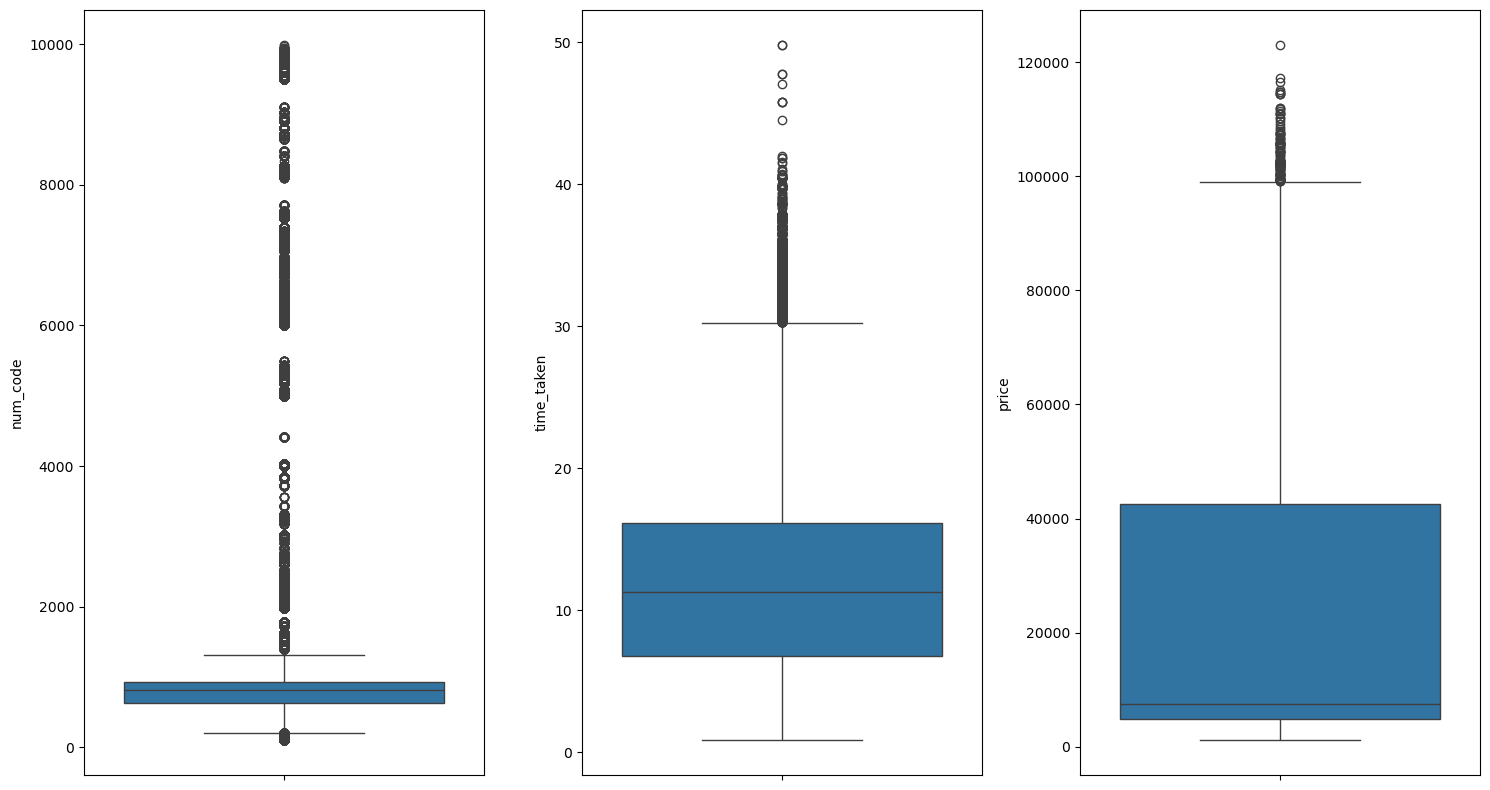

In [38]:
plt.figure(figsize=(15,8))
t= 1
for i in num:
    plt.subplot(1,3,t)
    sns.boxplot(df[i])
    t+=1

plt.tight_layout()
plt.show()

 * Outliers in the 'time_taken' and 'price' columns are very high

In [39]:
def outlier(i):
    q1 = np.quantile(df[i], 0.25)
    q3 = np.quantile(df[i], 0.75)
    iqr = q3 - q1
    lower = q1 - 2 * iqr
    upper = q3 + 2 * iqr
    print(upper)
    print(lower)
    return df[(df[i]< lower) | (df[i] > upper)]

In [40]:
outlier('time_taken')

35.0
-12.083333333333336


date    airline ch_code  num_code       dep_time departure_city  \
10542 2022-02-14  Air India      AI      9887  early morning          Delhi   
20466 2022-02-13    Vistara      UK       815        morning          Delhi   
29419 2022-02-17  Air India      AI       481        morning          Delhi   
29420 2022-02-17  Air India      AI       435  early morning          Delhi   
29536 2022-02-18  Air India      AI       481        morning          Delhi   
...          ...        ...     ...       ...            ...            ...   
63418 2022-03-28    Vistara      UK       720  early morning        Kolkata   
63535 2022-03-30    Vistara      UK       720  early morning        Kolkata   
76364 2022-02-12    Vistara      UK       860  early morning      Hyderabad   
86940 2022-02-16  Air India      AI       429           noon        Chennai   
89287 2022-02-12    Vistara      UK       832  early morning        Chennai   

       time_taken      stop arr_time destination_city    price     class  \
10542   36.916667  2+_stops  evening        Bangalore  12321.0   economy   
20466   35.833333  2+_stops  evening          Kolkata  17462.0   economy   
29419   36.916667  2+_stops    night        Hyderabad  10474.0   economy   
29420   39.666667  2+_stops    night        Hyderabad  10474.0   economy   
29536   36.916667  2+_stops    night        Hyderabad  10474.0   economy   
...           ...       ...      ...              ...      ...       ...   
63418   35.083333  one_stop  evening        Bangalore  67710.0  business   
63535   35.083333  one_stop  evening        Bangalore  67710.0  business   
76364   37.916667  one_stop    night          Kolkata  64733.0  business   
86940   45.833333  2+_stops  morning        Bangalore  51928.0  business   
89287   37.833333  one_stop    night          Kolkata  68963.0  business   

           city day_of_week  
10542  2+_stops      Monday  
20466  2+_stops      Sunday  
29419  2+_stops    Thursday  
29420  2+_stops    Thursday  
29536  2+_stops      Friday  
...         ...         ...  
63418  one_stop      Monday  
63535  one_stop   Wednesday  
76364  one_stop    Saturday  
86940  2+_stops   Wednesday  
89287  one_stop    Saturday  

[449 rows x 14 columns]

In [41]:
df[df['time_taken']>28.75]

date    airline ch_code  num_code       dep_time departure_city  \
82    2022-02-11  Air India      AI       801        evening          Delhi   
114   2022-02-11  Air India      AI       429        morning          Delhi   
357   2022-02-13  Air India      AI       429        morning          Delhi   
363   2022-02-13  Air India      AI       801        evening          Delhi   
546   2022-02-14  Air India      AI       429        morning          Delhi   
...          ...        ...     ...       ...            ...            ...   
91062 2022-03-24  Air India      AI       569  early morning        Chennai   
91149 2022-03-26  Air India      AI       569  early morning        Chennai   
91221 2022-03-27  Air India      AI       440  early morning        Chennai   
91305 2022-03-29  Air India      AI       440  early morning        Chennai   
91358 2022-03-31  Air India      AI       569  early morning        Chennai   

       time_taken      stop arr_time destination_city    price     class  \
82      29.333333  one_stop    night           Mumbai  16245.0   economy   
114     30.083333  one_stop     noon           Mumbai  24540.0   economy   
357     30.083333  one_stop     noon           Mumbai  15405.0   economy   
363     29.333333  one_stop    night           Mumbai  16245.0   economy   
546     30.083333  one_stop     noon           Mumbai  15720.0   economy   
...           ...       ...      ...              ...      ...       ...   
91062   29.833333  one_stop     noon          Kolkata  54481.0  business   
91149   29.833333  one_stop     noon          Kolkata  54481.0  business   
91221   28.916667  one_stop  morning          Kolkata  55377.0  business   
91305   28.916667  one_stop  morning          Kolkata  55377.0  business   
91358   29.833333  one_stop     noon          Kolkata  54481.0  business   

           city day_of_week  
82     one_stop      Friday  
114     Chennai      Friday  
357     Chennai      Sunday  
363    one_stop      Sunday  
546     Chennai      Monday  
...         ...         ...  
91062  one_stop    Thursday  
91149  one_stop    Saturday  
91221  one_stop      Sunday  
91305  one_stop     Tuesday  
91358  one_stop    Thursday  

[3188 rows x 14 columns]

<Axes: xlabel='stop', ylabel='time_taken'>

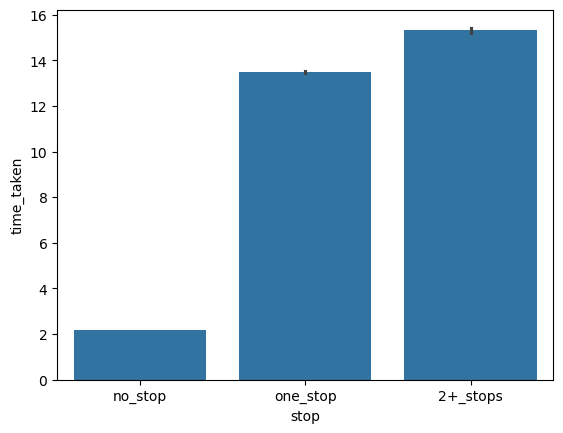

In [42]:
sns.barplot(x = df['stop'], y = df['time_taken'])

 * Flight having more than 2 stops have high duration than that of flights with one_stop and no_stop , thus creating the outliers.

In [43]:
outlier('price')

117997.0
-70693.0


date  airline ch_code  num_code dep_time departure_city  \
54711 2022-02-13  Vistara      UK       772  morning        Kolkata   

       time_taken      stop arr_time destination_city     price     class  \
54711        13.5  one_stop    night            Delhi  123071.0  business   

           city day_of_week  
54711  one_stop      Sunday

<Axes: xlabel='stop', ylabel='price'>

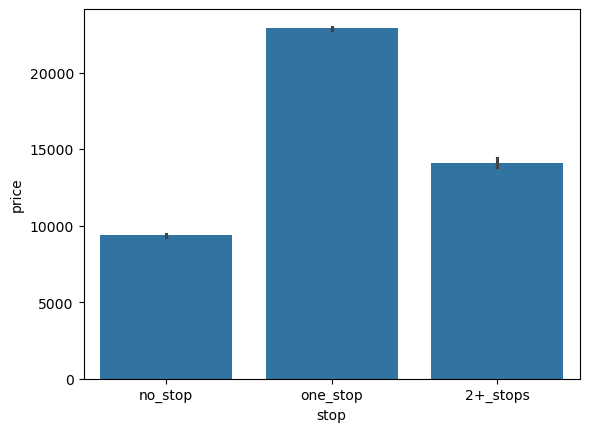

In [44]:
sns.barplot(x = df['stop'], y = df['price'])

 * The flight ticket price is also getting highly affected by the number of stops.

#### Measure of dispersion:

##### Skewness:

In [45]:
for i in num:
    print(f'Skewness of the column {i} is {df[i].skew()}')
    print()

Skewness of the column num_code is 2.816130569595276

Skewness of the column time_taken is 0.6029784255685438

Skewness of the column price is 1.0618818903392429



 * Skewness of the columns suggest that all three numerical columns are right skewed.

##### Kurtosis:

In [46]:
for i in num:
    print(f'Kurtosis value of the column {i} is {df[i].kurt()}')
    print()

Kurtosis value of the column num_code is 6.931508400618155

Kurtosis value of the column time_taken is -0.2689803307036893

Kurtosis value of the column price is -0.3951724294382908



##### Variance:

In [47]:
for i in num:
    print(f'Variance of the column {i} is {df[i].var()}')
    print()

Variance of the column num_code is 3898729.0371723277

Variance of the column time_taken is 51.73815248435815

Variance of the column price is 515106701.5414476



In [48]:
plt.rcParams['figure.figsize'] = [10,8]
from warnings import filterwarnings
filterwarnings('ignore')

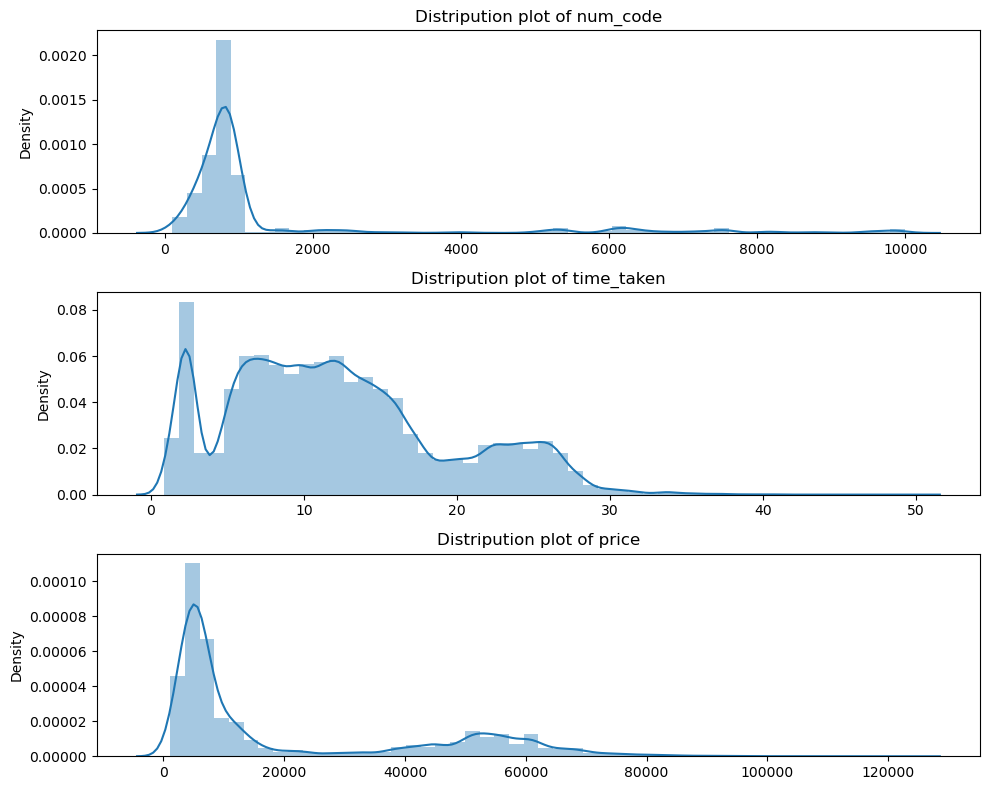

In [49]:
t = 1
for i in num:
    plt.subplot(3,1,t)
    sns.distplot(x = df[i])
    plt.title(f'Distripution plot of {i}')
    t+=1
plt.tight_layout()
plt.show()

#### Categorical:

In [50]:
for i in cat:
    print(i)
    print(df[i].describe())
    print('--------------------------')

airline
count      300259
unique          8
top       Vistara
freq       127859
Name: airline, dtype: object
--------------------------
ch_code
count     300259
unique         8
top           UK
freq      127859
Name: ch_code, dtype: object
--------------------------
dep_time
count      300259
unique          6
top       morning
freq        75250
Name: dep_time, dtype: object
--------------------------
departure_city
count     300259
unique         6
top        Delhi
freq       61343
Name: departure_city, dtype: object
--------------------------
stop
count       300259
unique           3
top       one_stop
freq        250927
Name: stop, dtype: object
--------------------------
arr_time
count     300259
unique         6
top        night
freq       93584
Name: arr_time, dtype: object
--------------------------
destination_city
count     300259
unique         6
top       Mumbai
freq       59107
Name: destination_city, dtype: object
--------------------------
city
count       300259
unique

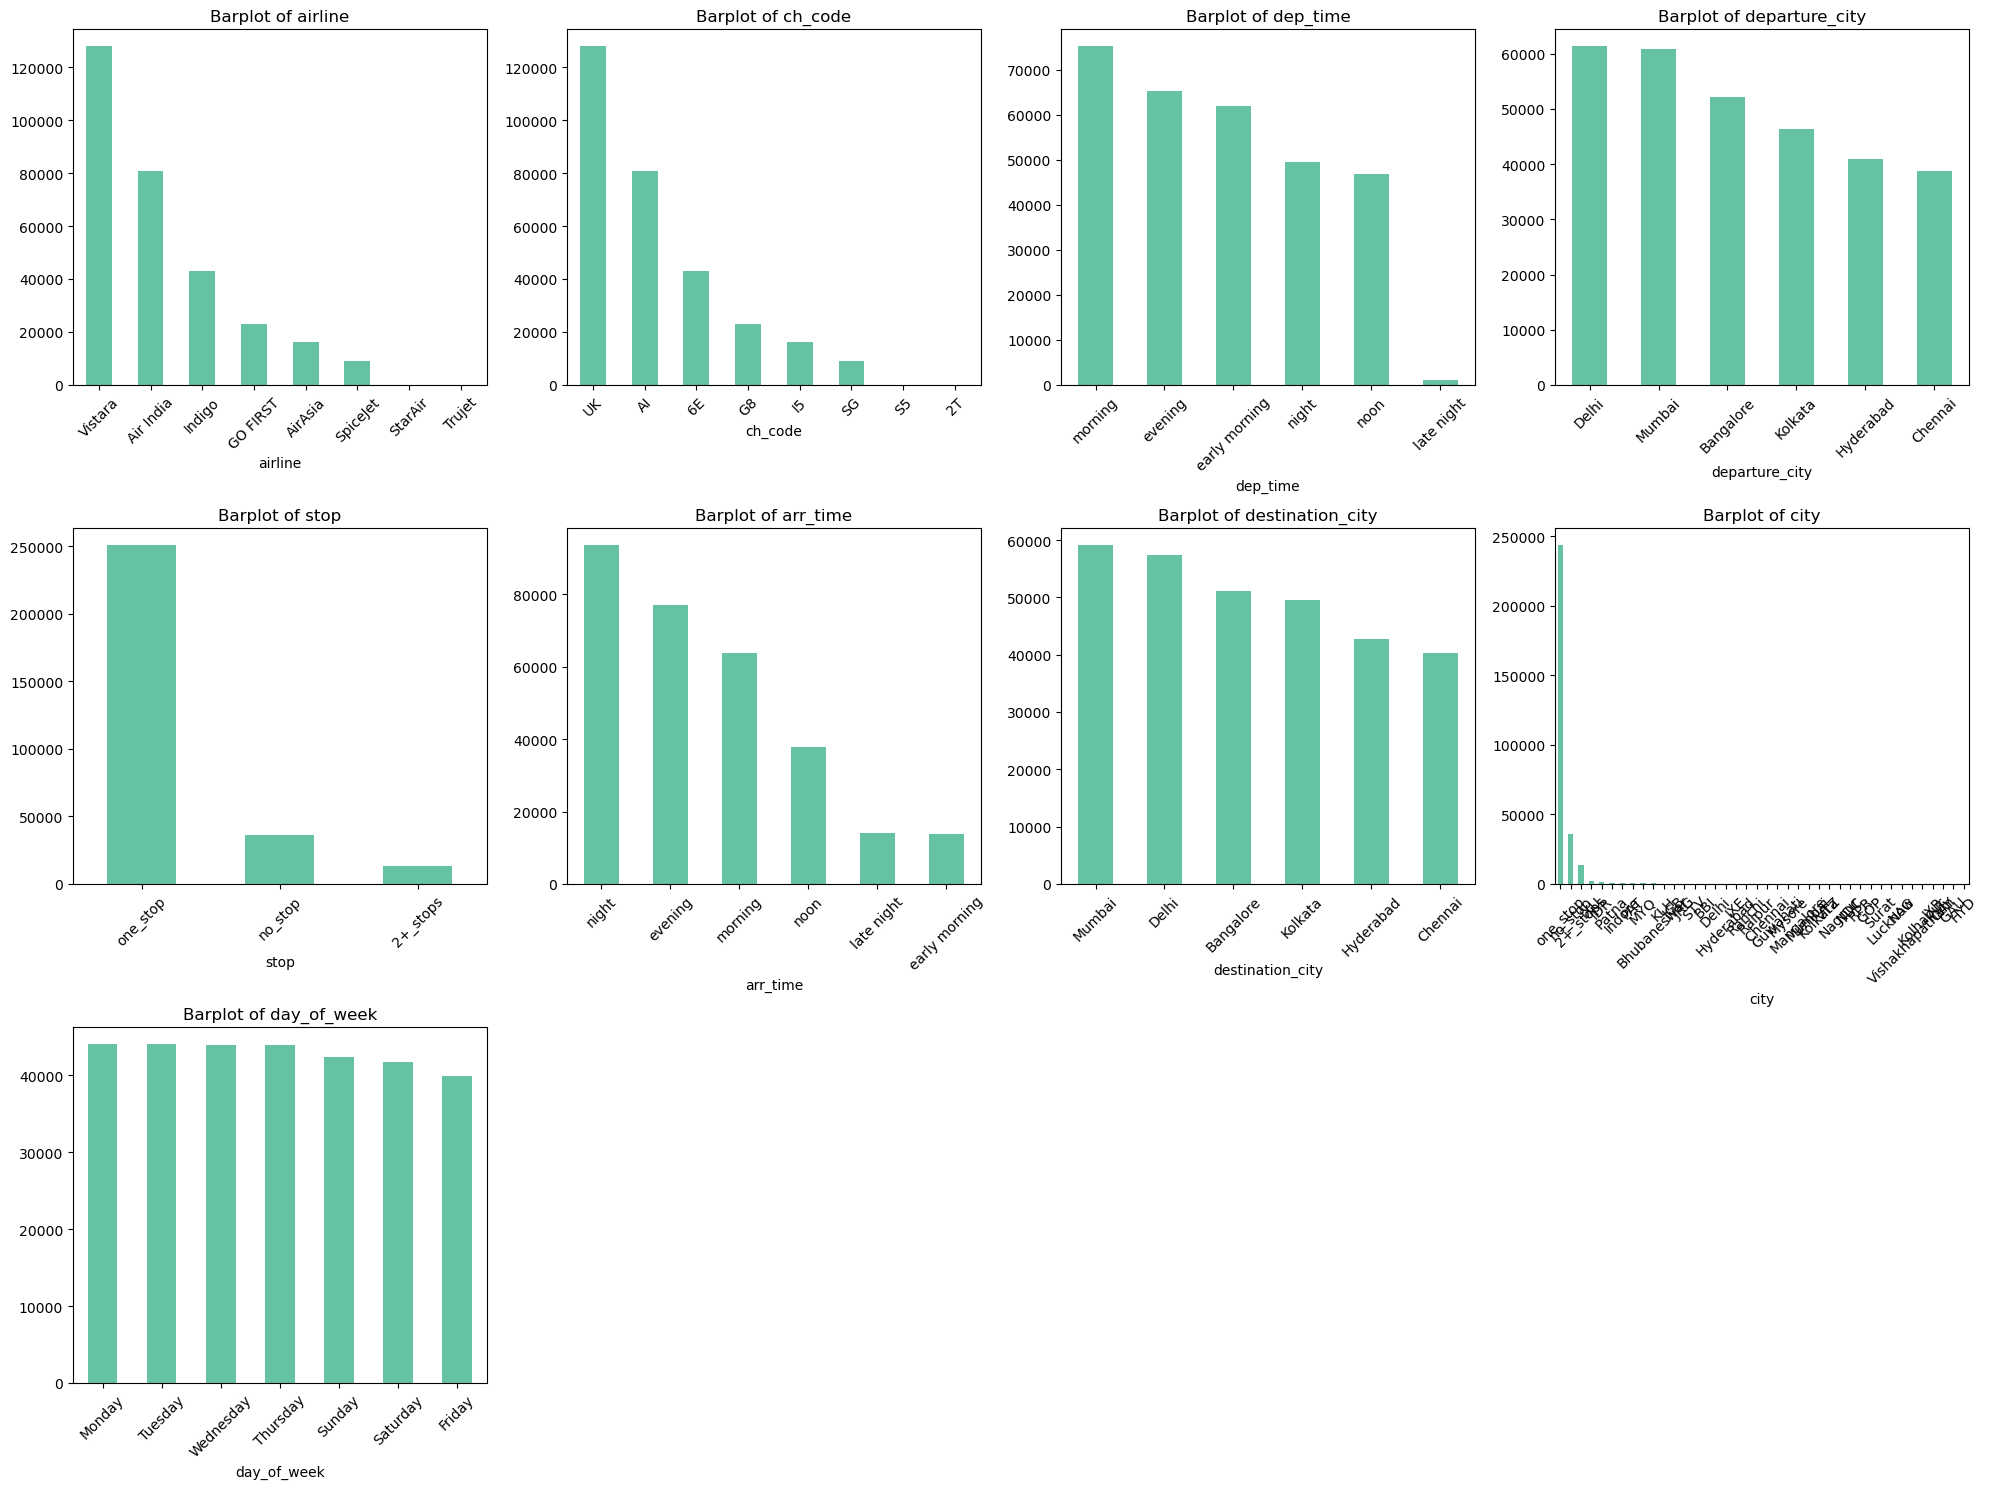

In [51]:
t = 1 
plt.figure(figsize=(20,15))
for i in cat:
    plt.subplot(3,4,t)
    df[i].value_counts().plot(kind = 'bar', colormap = 'Set2')
    plt.title(f'Barplot of {i}')
    plt.xticks(rotation = 45)
    t += 1
plt.tight_layout()
plt.show()

In [52]:
plt.rcParams['figure.figsize'] = [15,15]

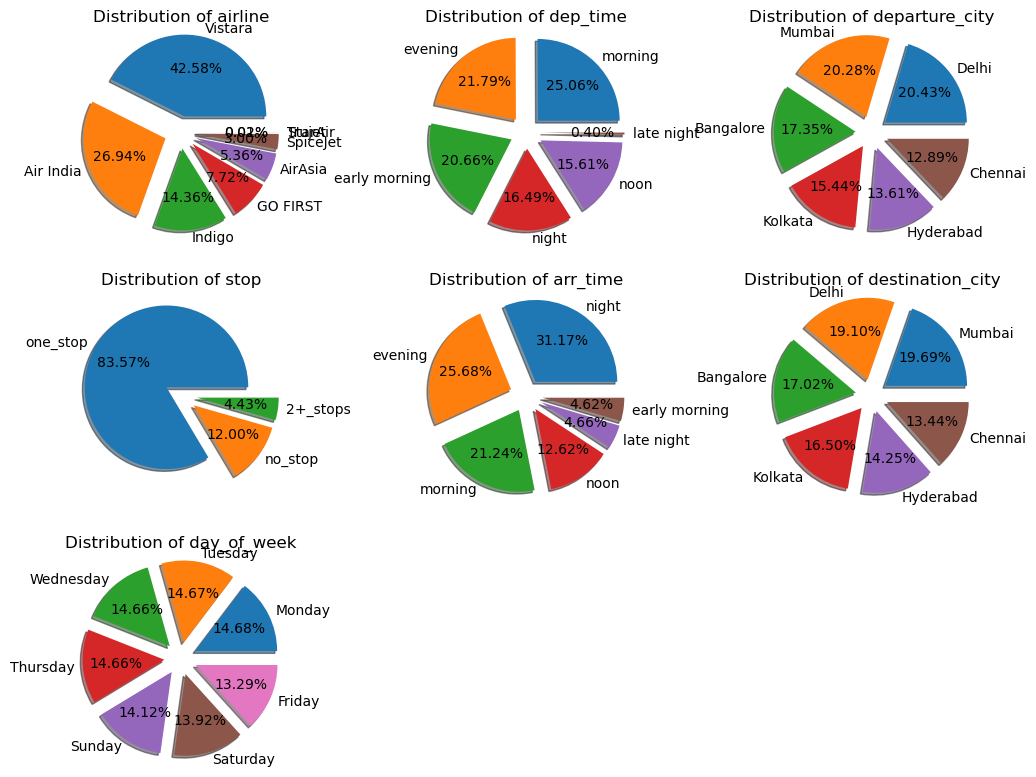

In [53]:
plt.rcParams['figure.figsize'] = [10,8]
t = 1 
for i in cat:
    if i != 'city' and i != 'ch_code':
        exp = [0.2] * len(df[i].value_counts())  
        plt.subplot(3,3,t)
        plt.pie(x = df[i].value_counts(), labels = df[i].value_counts().index, shadow = True, autopct = '%.2f%%', rotatelabels=False, explode = exp)
        plt.title(f'Distribution of {i}')
        plt.xticks(rotation = 45)
        t += 1
plt.tight_layout()
plt.show()

### Bivariate analysis:

#### NUM VS NUM:

In [54]:
# Checking the correlation:
df[num].corr()

num_code  time_taken     price
num_code    1.000000   -0.133752 -0.212867
time_taken -0.133752    1.000000  0.204478
price      -0.212867    0.204478  1.000000

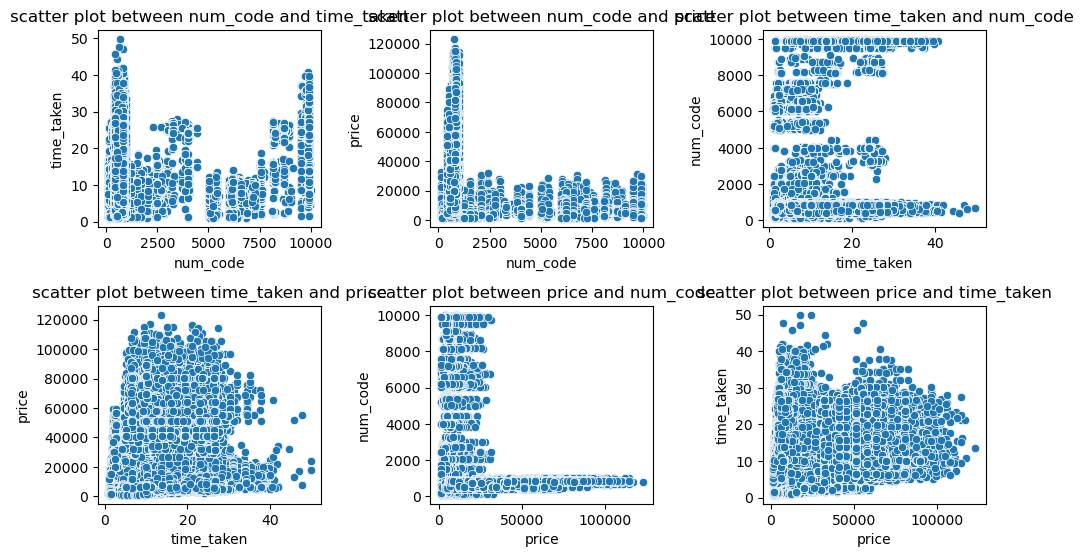

In [55]:
t = 1
for i in num:
    for j in num:
        if i != j:
            plt.subplot(3,3,t)
            sns.scatterplot(x = df[i], y = df[j])
            plt.title(f'scatter plot between {i} and {j}')
            t += 1
plt.tight_layout()
plt.show()

#### Cat vs cat:

In [56]:
cat = ['airline','ch_code','dep_time','departure_city','stop','arr_time','destination_city','city','day_of_week', 'class']

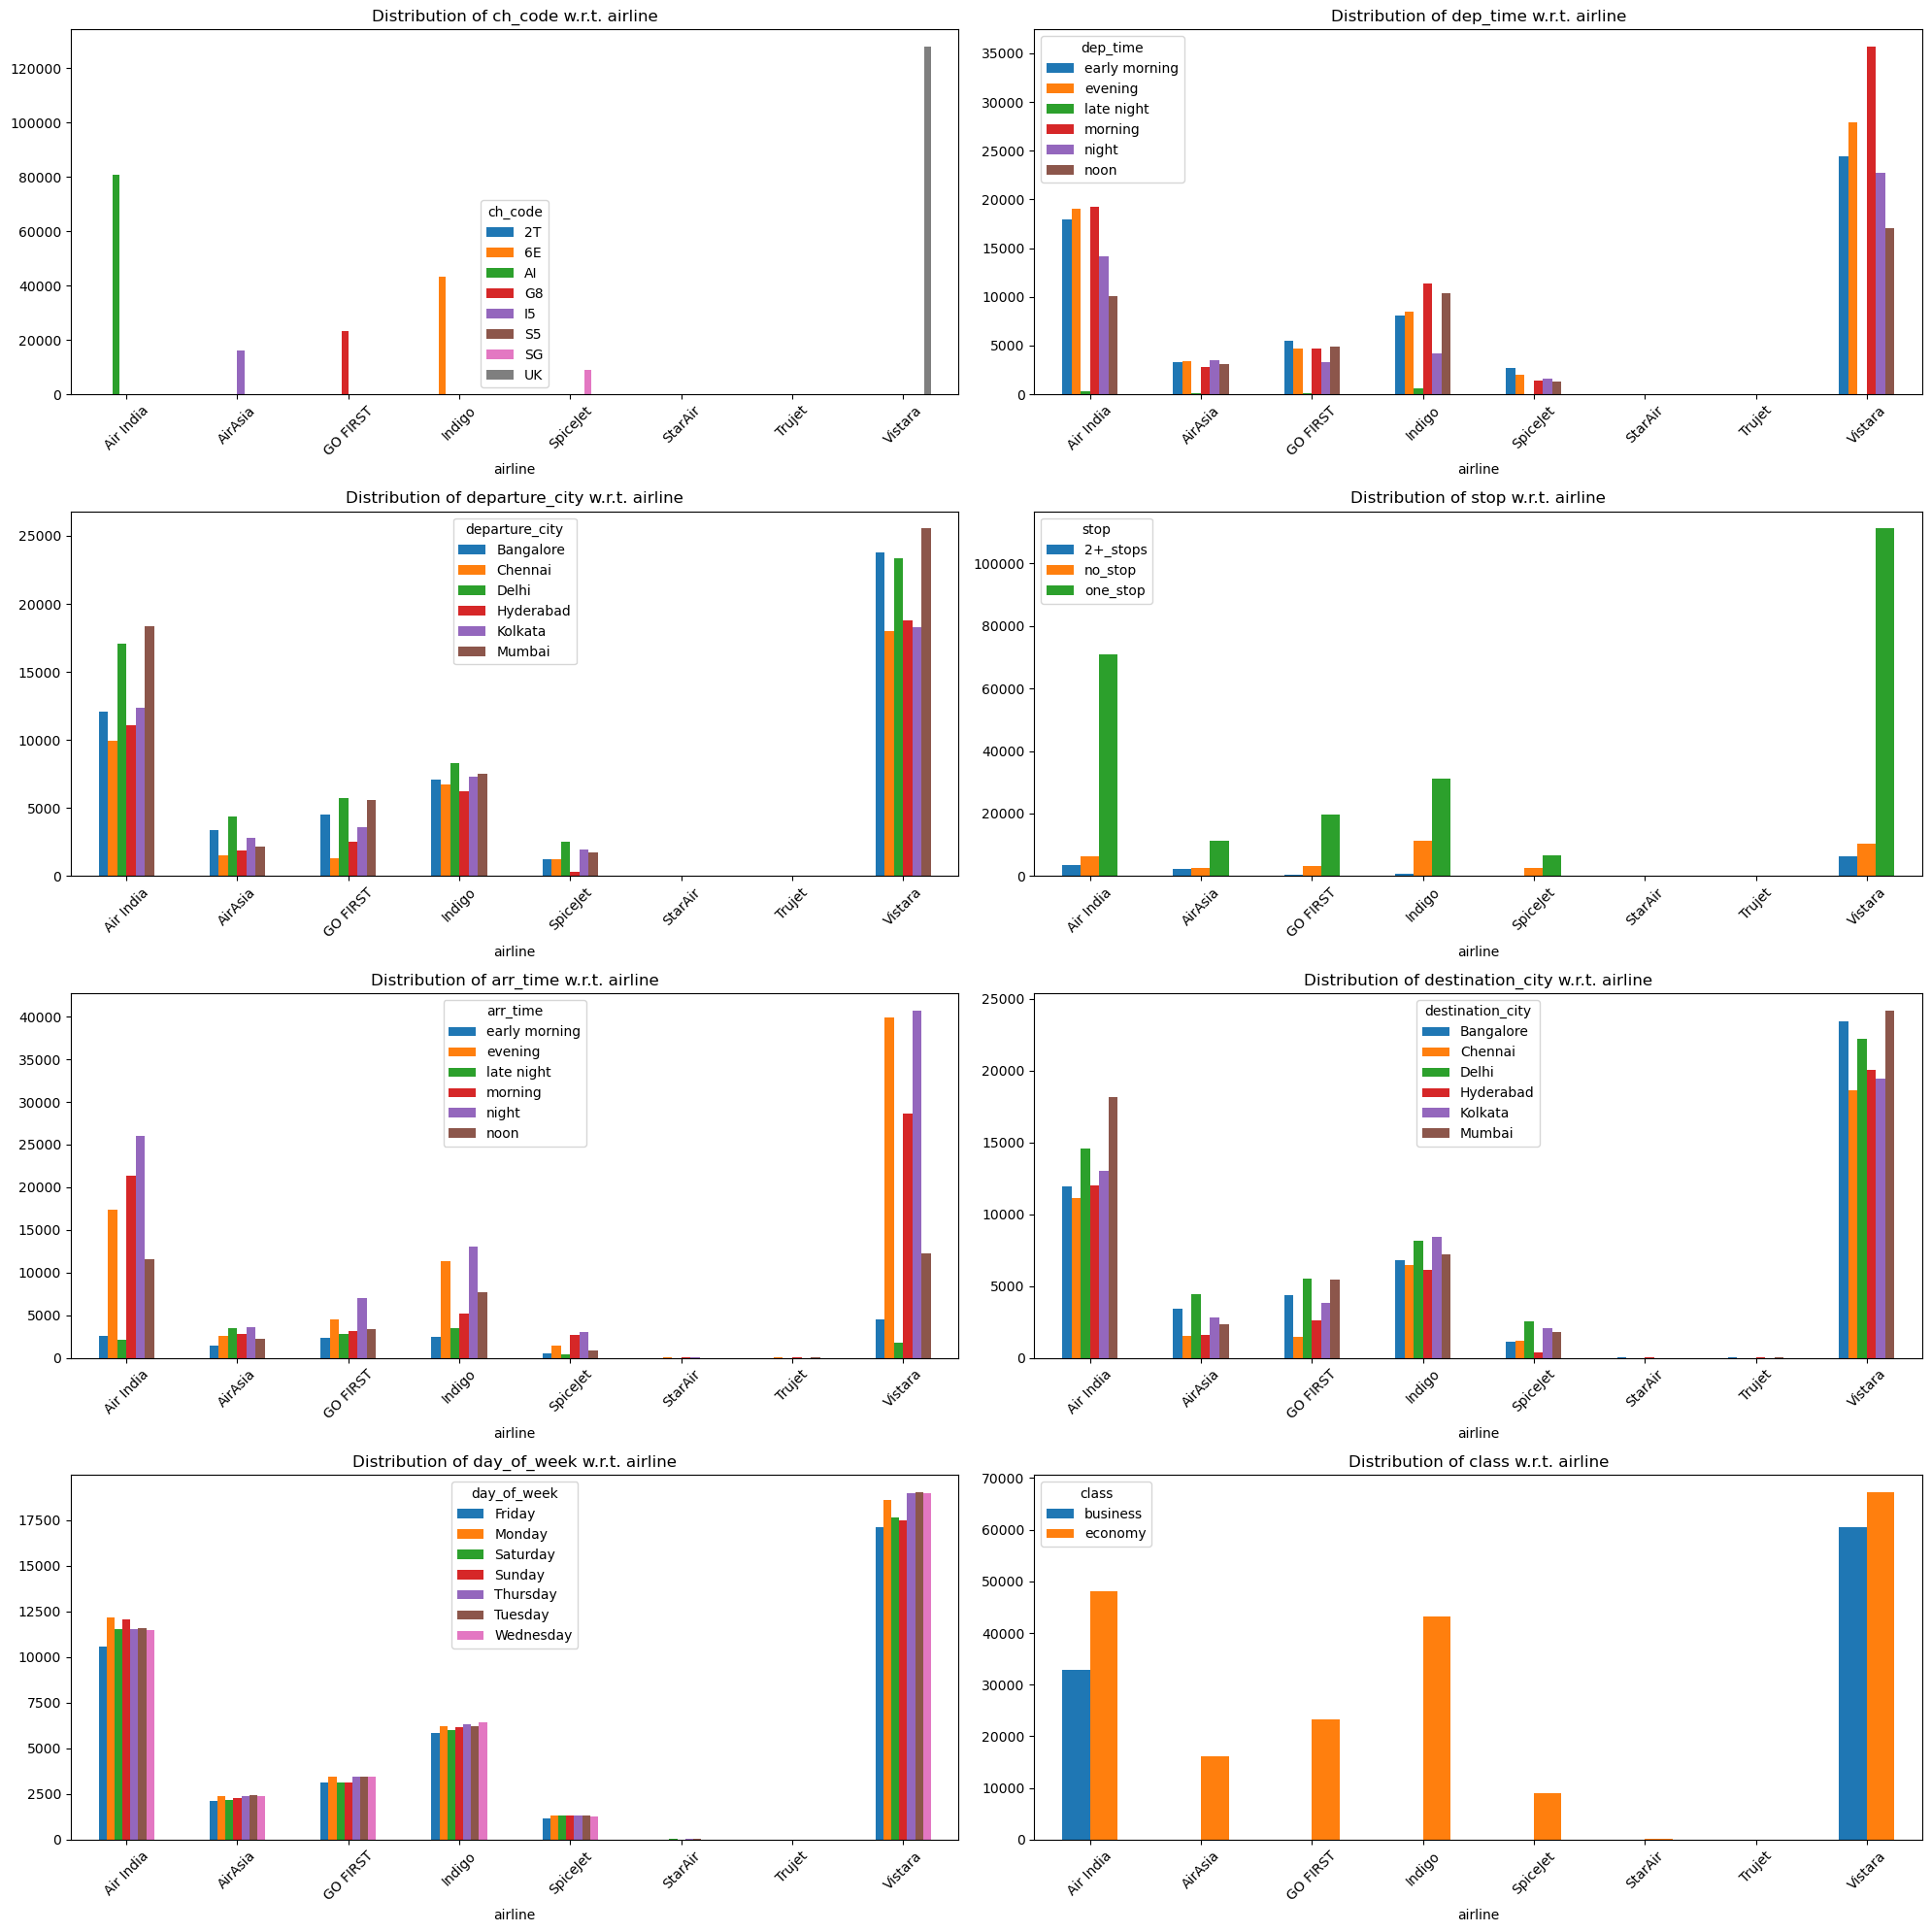

In [57]:
# airline vs other categories:
t = 1
plt.figure(figsize=(20,20))
for i in cat:
    if i != 'airline' and i != 'city':
        ax = plt.subplot(4,2,t)
        pd.crosstab(df['airline'], df[i]).plot(kind = 'bar', ax = ax)
        plt.title(f'Distribution of {i} w.r.t. {'airline'}')
        plt.xticks(rotation = 45)
        t += 1
plt.tight_layout()
plt.show()

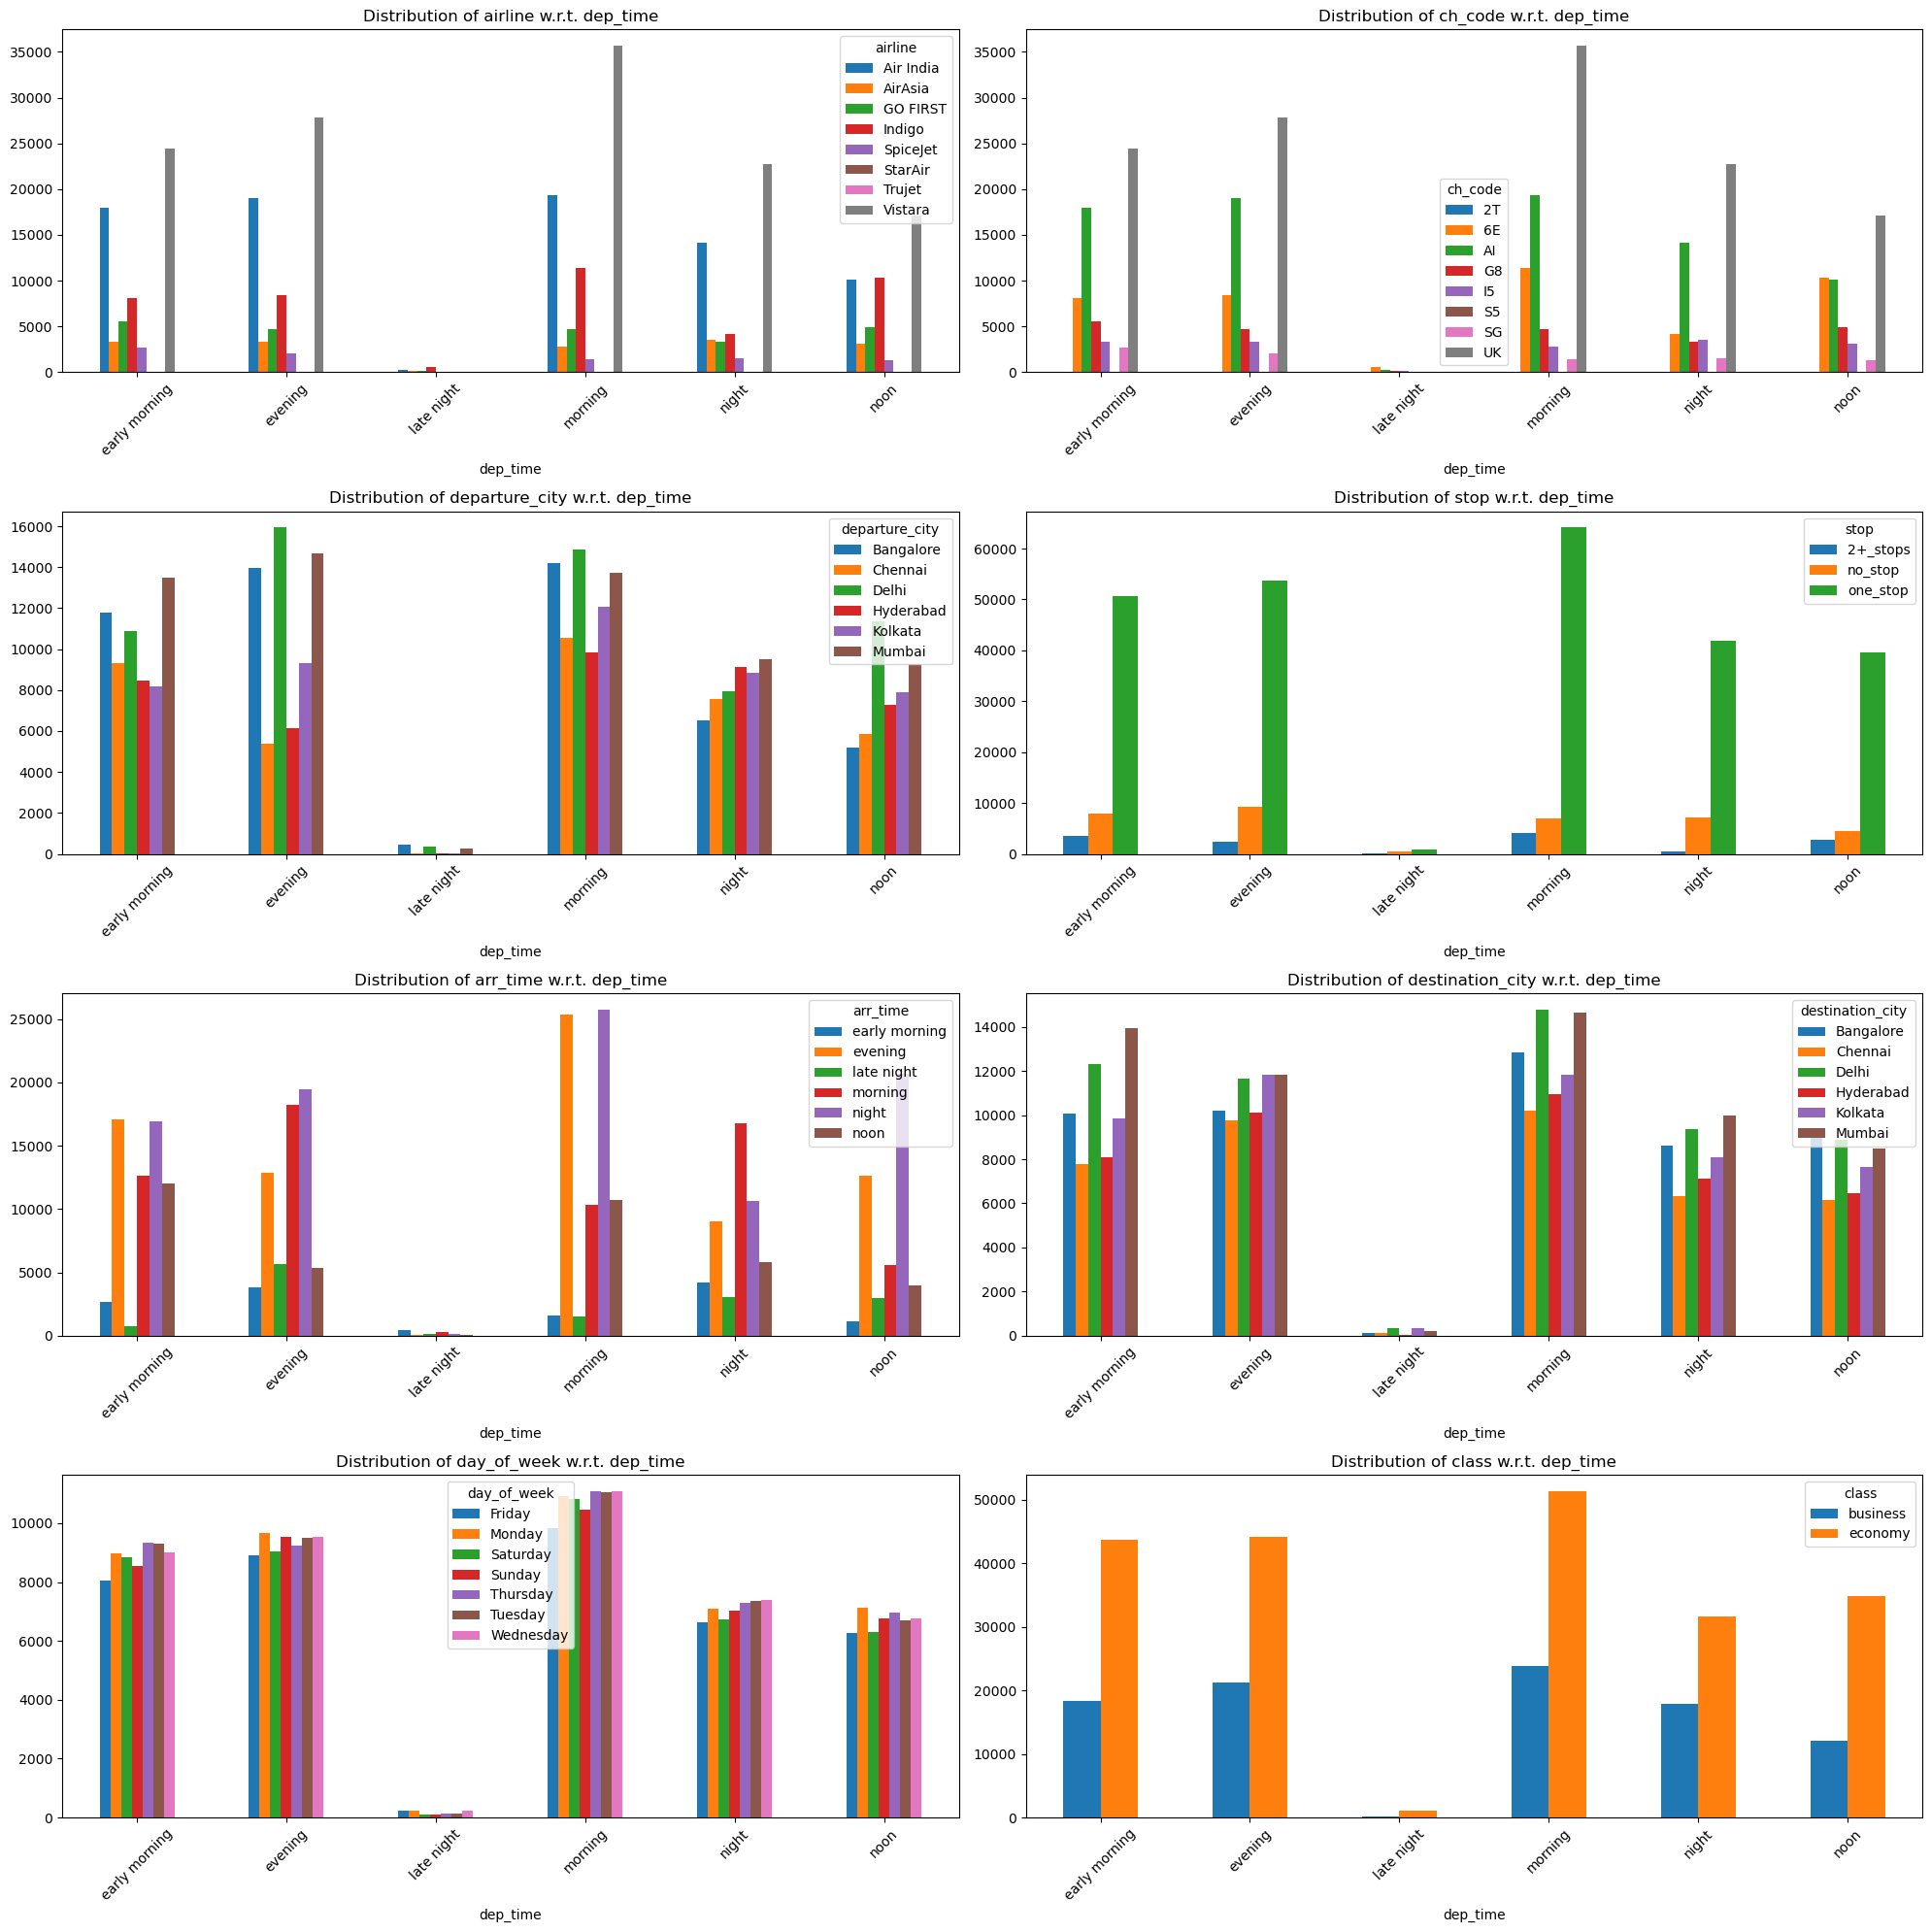

In [58]:
# dep_time vs other categories:
plt.figure(figsize=(20,20))
t = 1
for i in cat:
    if i != 'dep_time' and i != 'city':
        ax = plt.subplot(4,2,t)
        pd.crosstab(df['dep_time'], df[i]).plot(kind = 'bar', ax = ax)
        plt.title(f'Distribution of {i} w.r.t. {'dep_time'}')
        plt.xticks(rotation = 45)
        t += 1
plt.tight_layout()
plt.show()

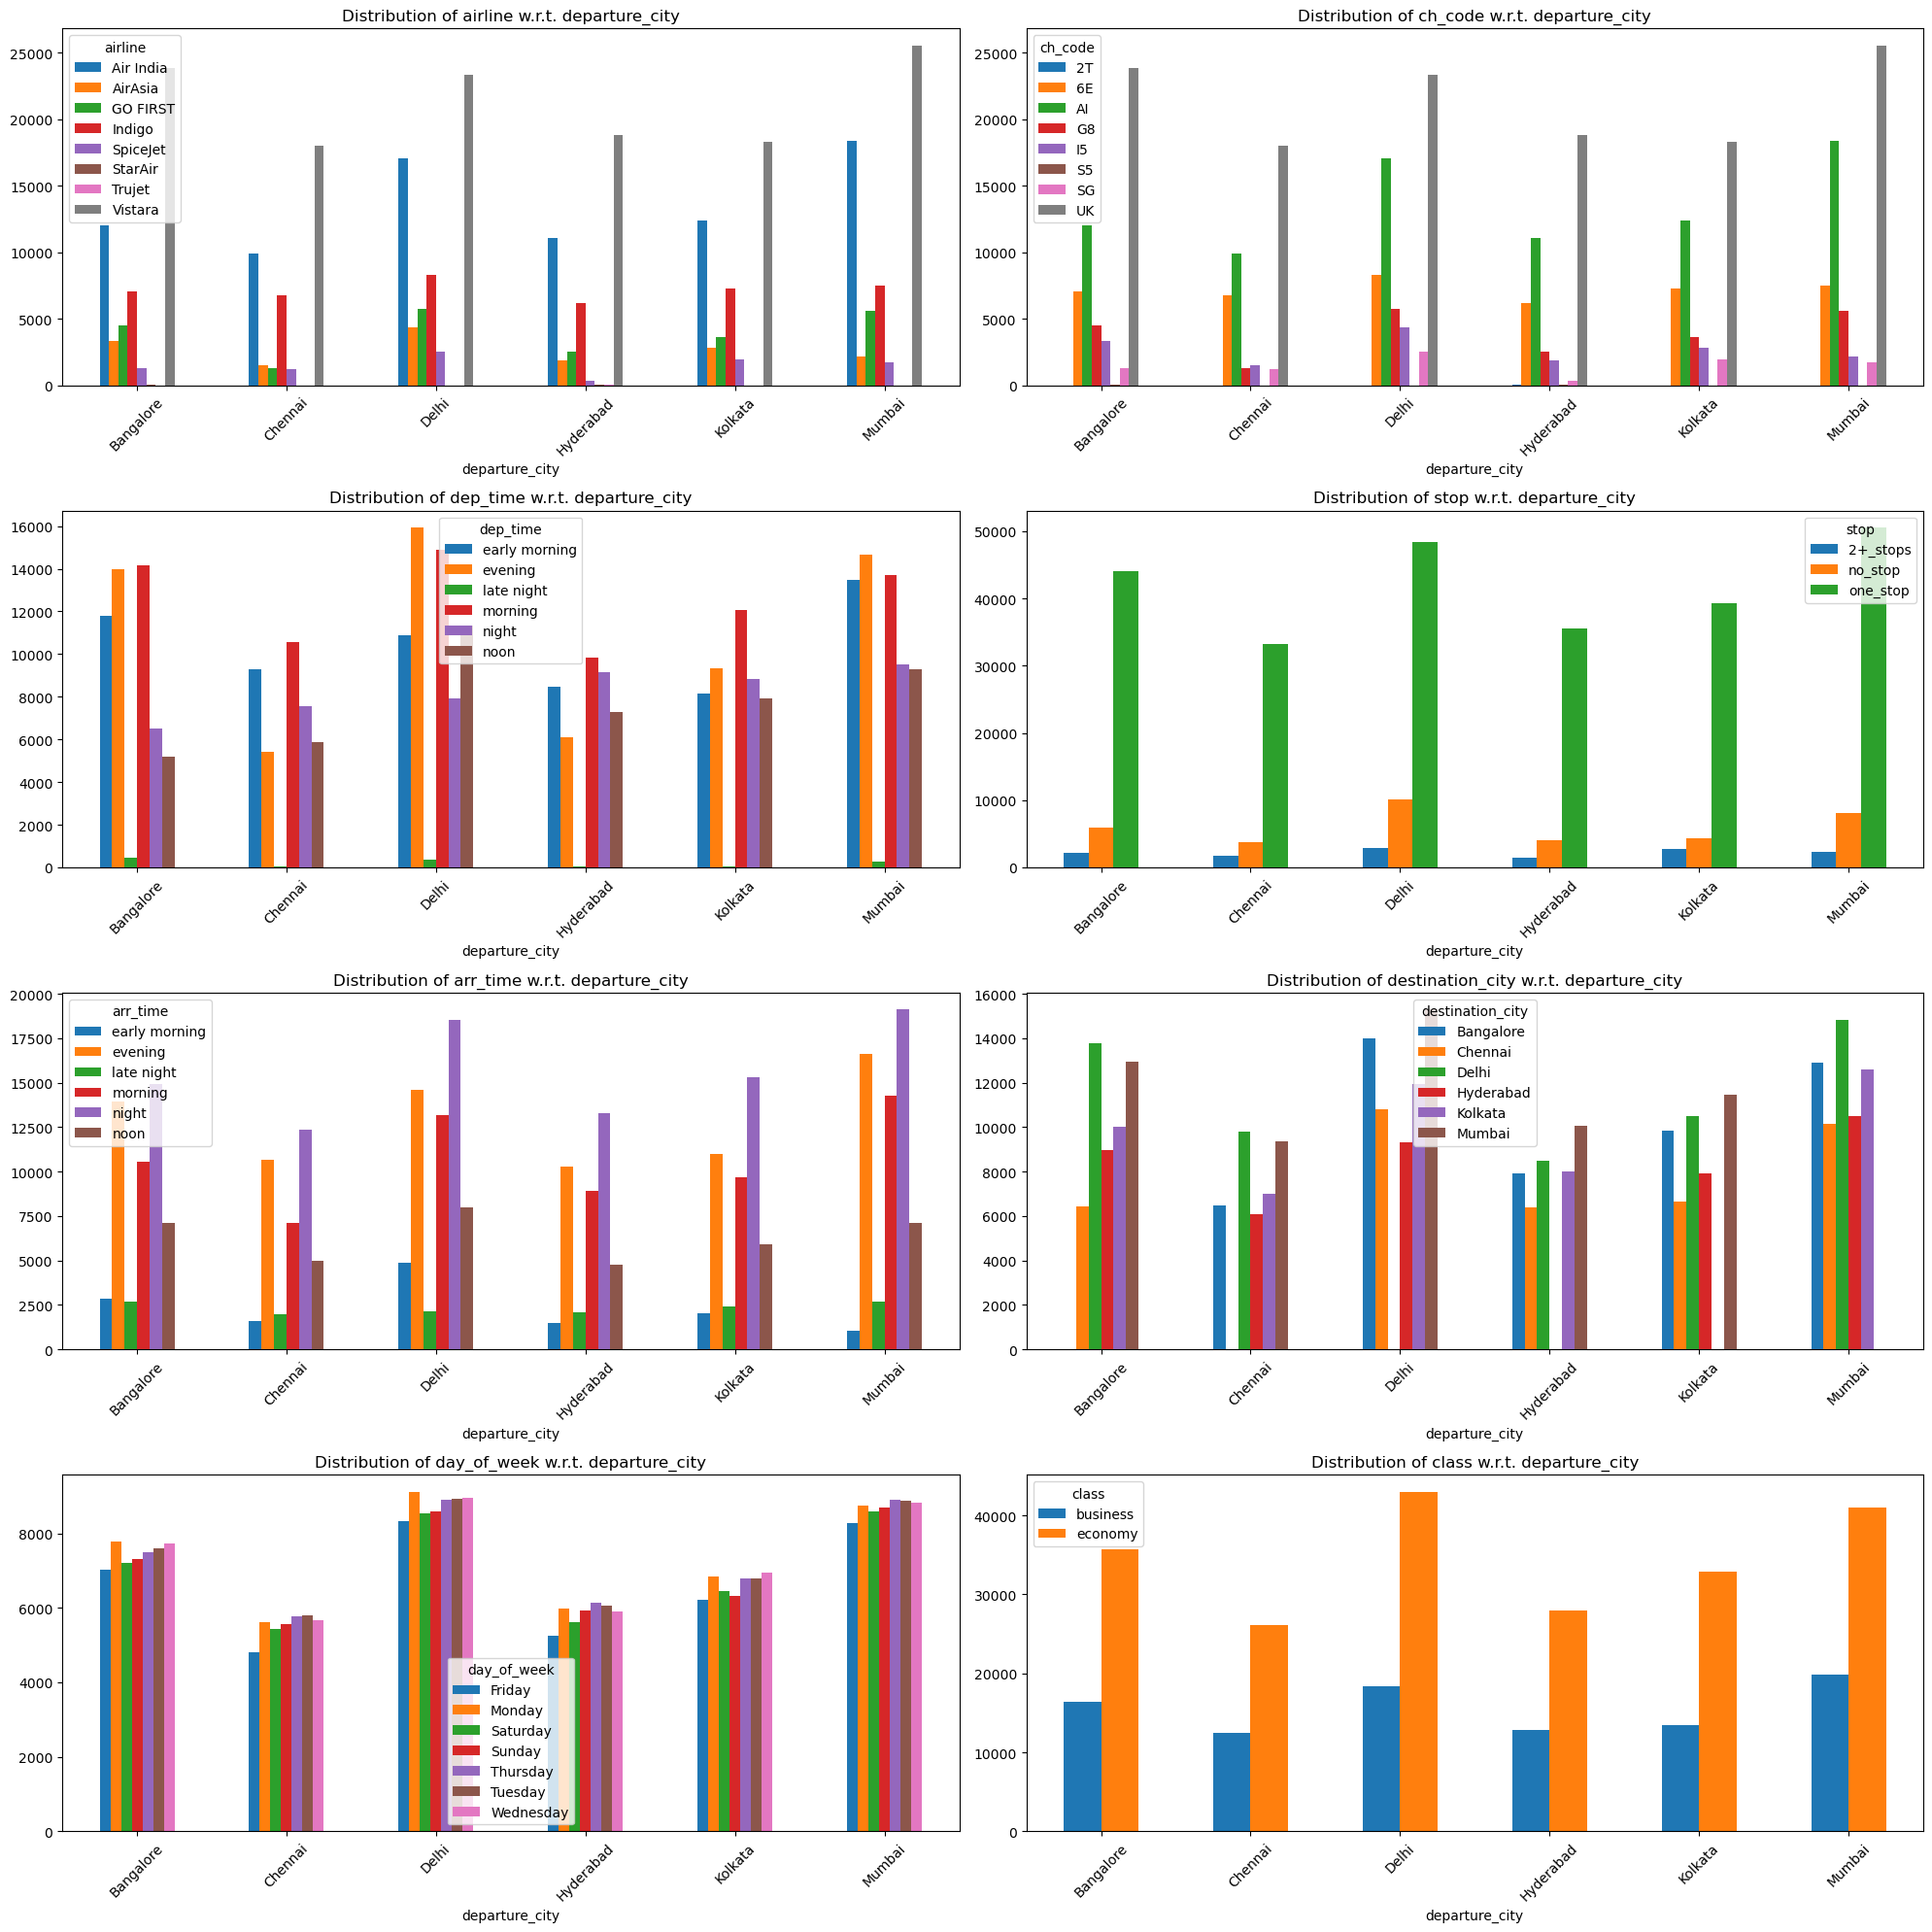

In [59]:
# departure_city vs other categories:
plt.figure(figsize=(20,20))
t = 1
for i in cat:
    if i != 'departure_city' and i != 'city':
        ax = plt.subplot(4,2,t)
        pd.crosstab(df['departure_city'], df[i]).plot(kind = 'bar', ax = ax)
        plt.title(f'Distribution of {i} w.r.t. {'departure_city'}')
        plt.xticks(rotation = 45)
        t += 1
plt.tight_layout()
plt.show()

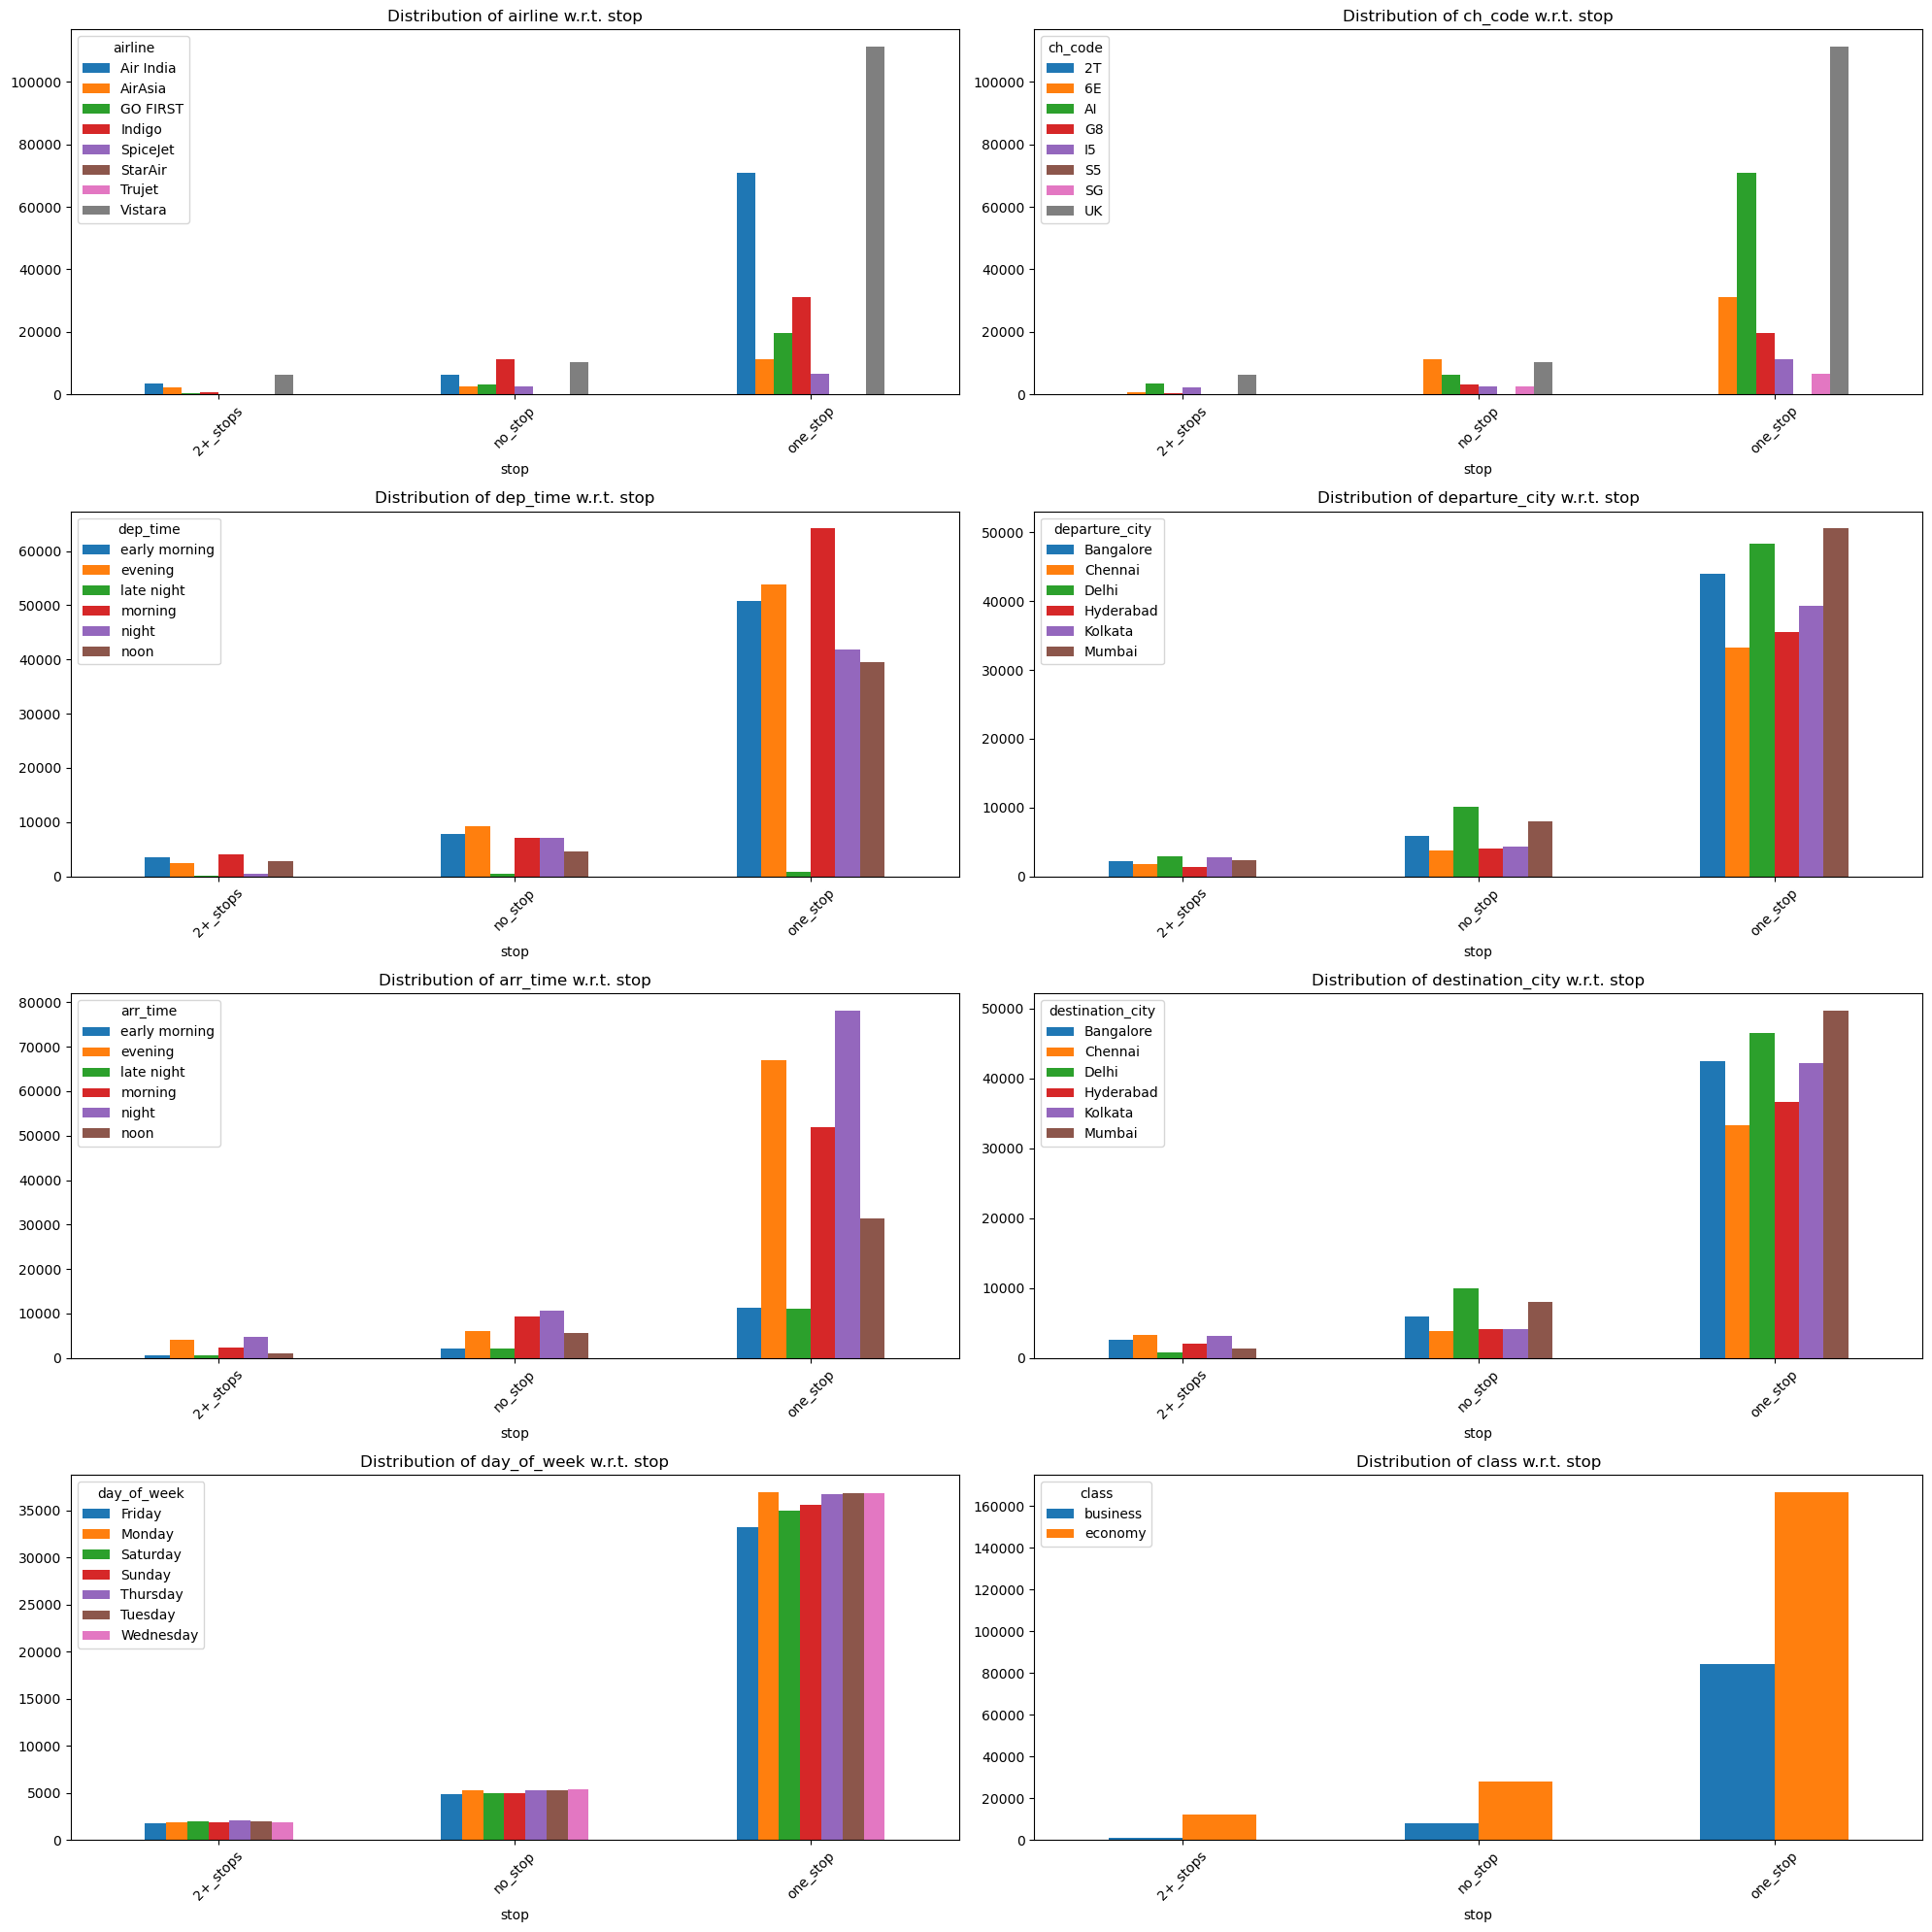

In [60]:
# stop vs other categories:
t = 1
plt.figure(figsize=(20,20))
for i in cat:
    if i != 'stop' and i != 'city':
        ax = plt.subplot(4,2,t)
        pd.crosstab(df['stop'], df[i]).plot(kind = 'bar', ax = ax)
        plt.title(f'Distribution of {i} w.r.t. {'stop'}')
        plt.xticks(rotation = 45)
        t += 1
plt.tight_layout()
plt.show()

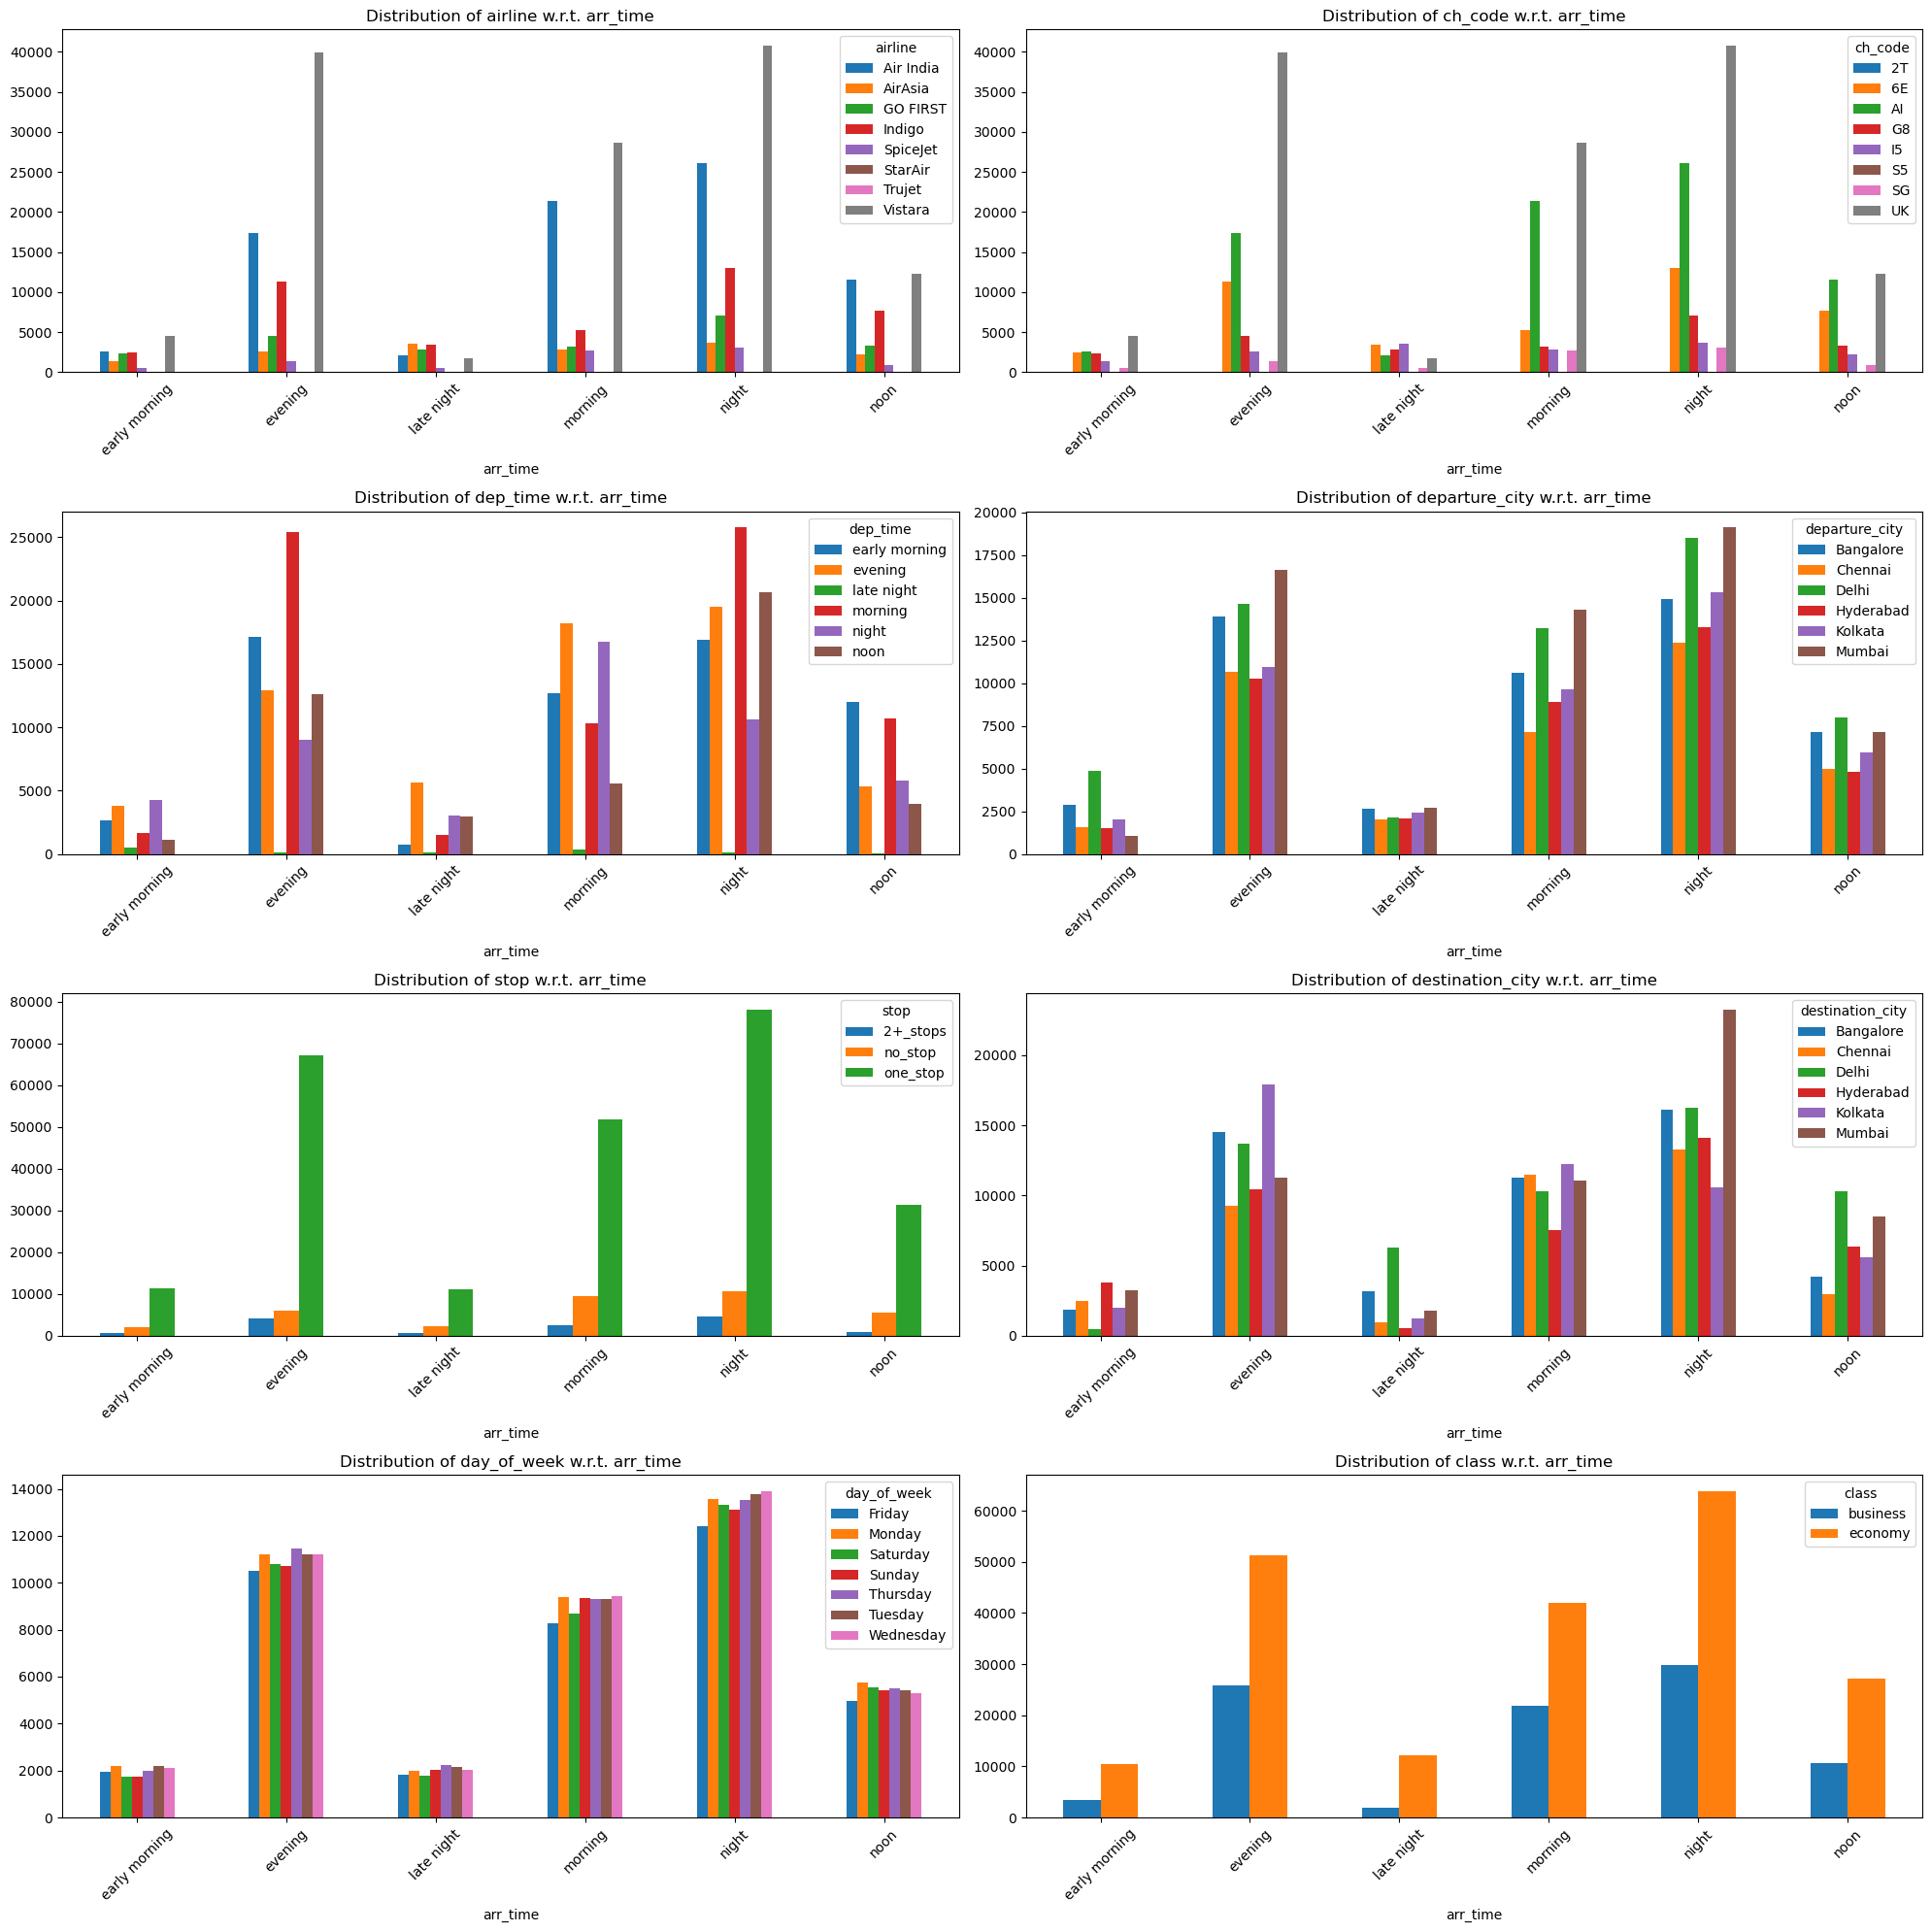

In [61]:
# arr_time vs other categories:
plt.figure(figsize=(20,20))
t = 1
for i in cat:
    if i != 'arr_time' and i != 'city':
        ax = plt.subplot(4,2,t)
        pd.crosstab(df['arr_time'], df[i]).plot(kind = 'bar', ax = ax)
        plt.title(f'Distribution of {i} w.r.t. {'arr_time'}')
        plt.xticks(rotation = 45)
        t += 1
plt.tight_layout()
plt.show()

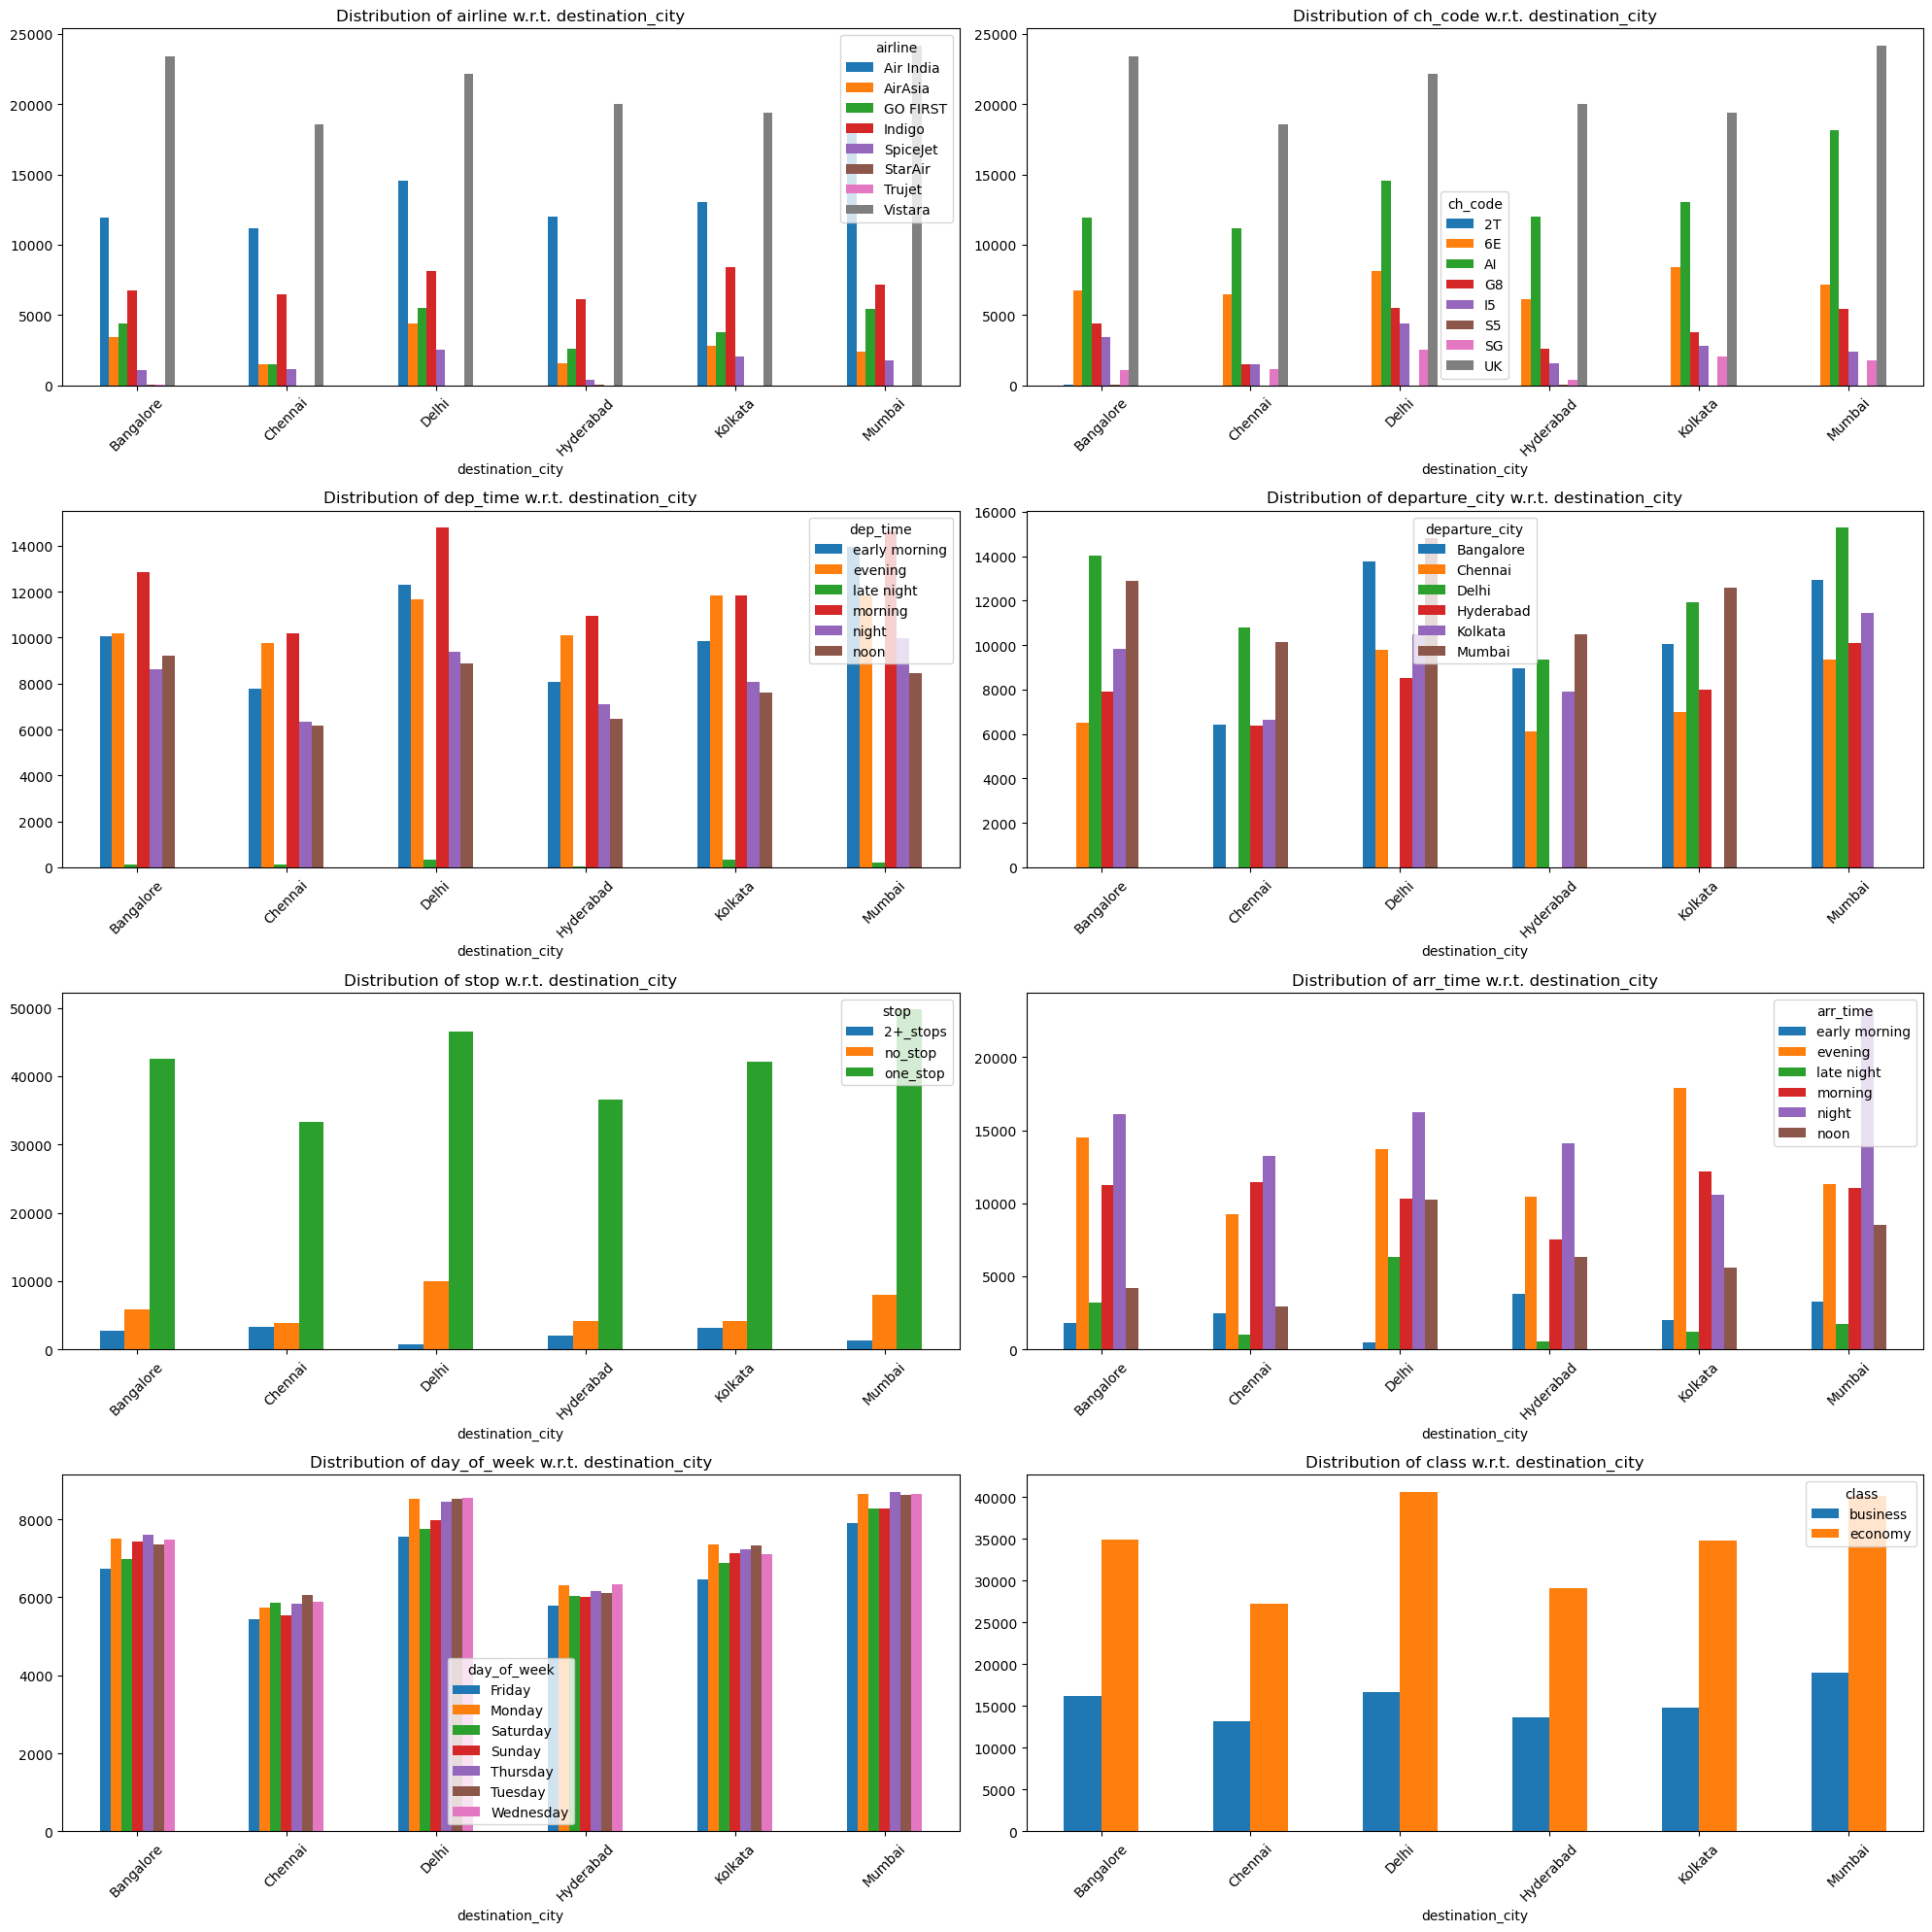

In [62]:
# destination_city vs other categories:
plt.figure(figsize=(20,20))
t = 1
for i in cat:
    if i != 'destination_city' and i != 'city':
        ax = plt.subplot(4,2,t)
        pd.crosstab(df['destination_city'], df[i]).plot(kind = 'bar', ax = ax)
        plt.title(f'Distribution of {i} w.r.t. {'destination_city'}')
        plt.xticks(rotation = 45)
        t += 1
plt.tight_layout()
plt.show()

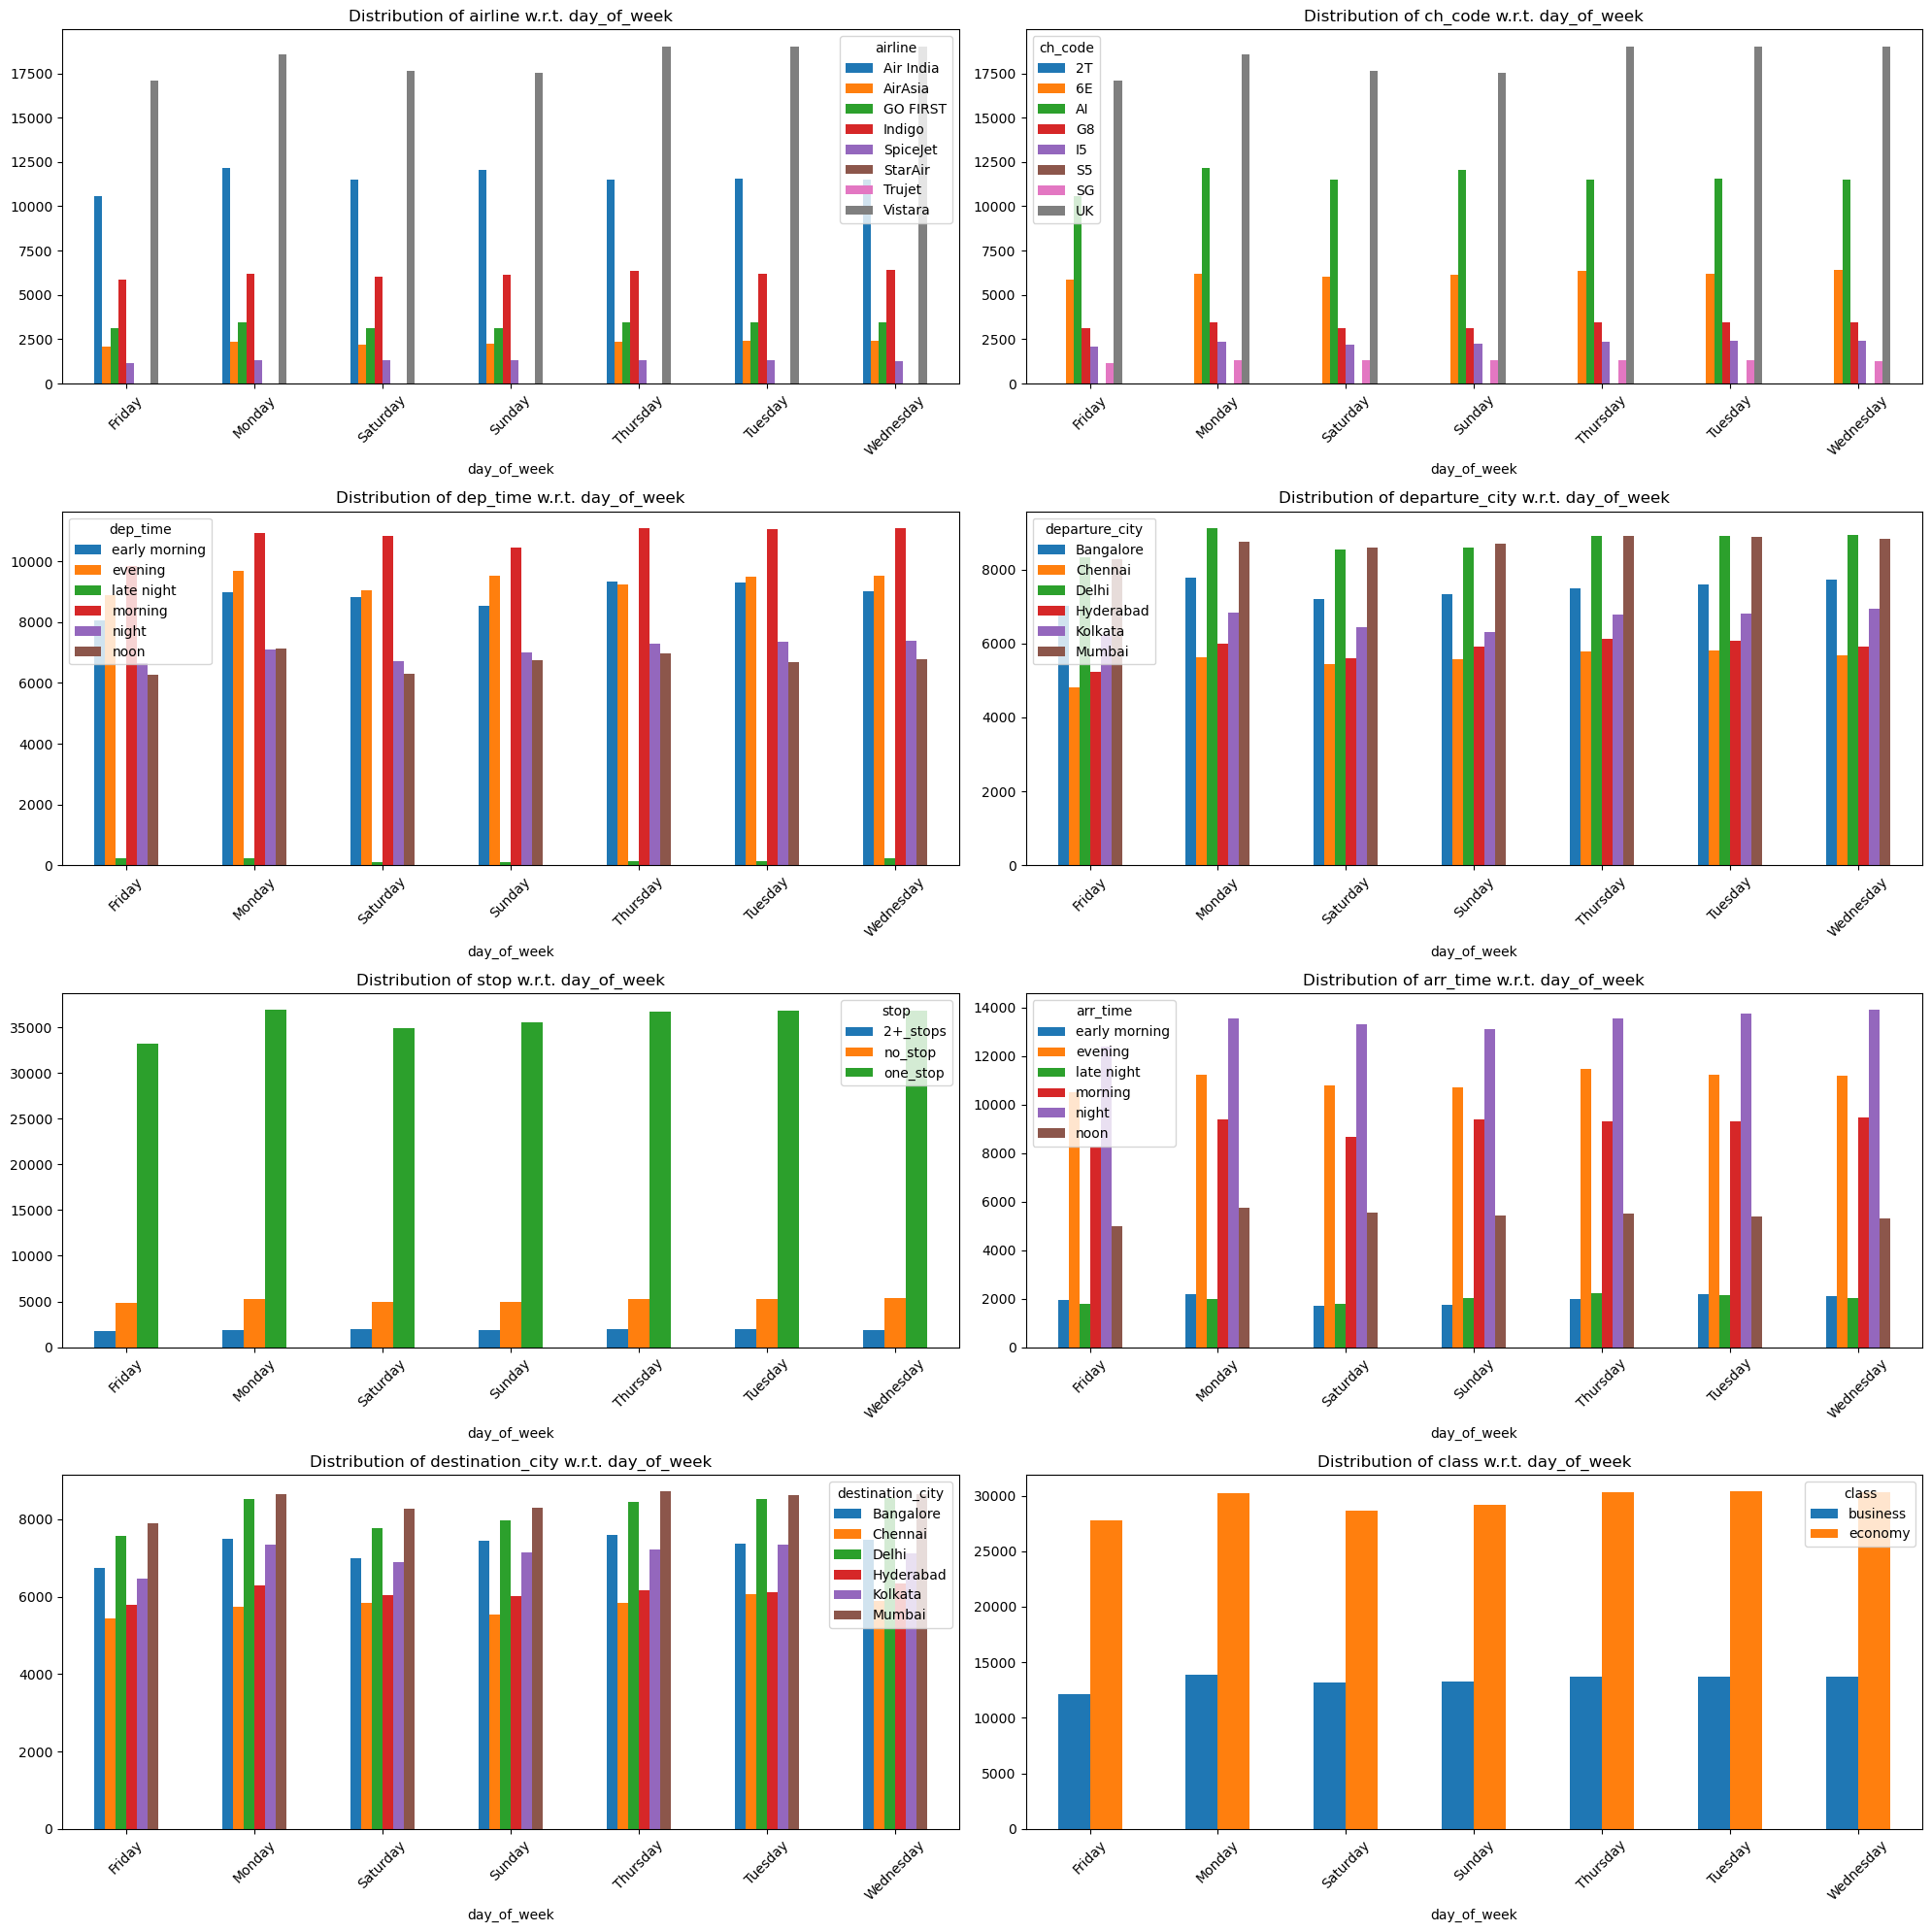

In [63]:
# day_of_week vs other categories:
t = 1
plt.figure(figsize=(20,20))
for i in cat:
    if i != 'day_of_week' and i != 'city':
        ax = plt.subplot(4, 2, t)  # Create subplot
        pd.crosstab(df['day_of_week'], df[i]).plot(kind='bar', ax=ax, legend=True)  # Assign plot to the subplot
        plt.title(f'Distribution of {i} w.r.t. day_of_week')
        plt.xticks(rotation = 45)
        t += 1

plt.tight_layout()
plt.show()


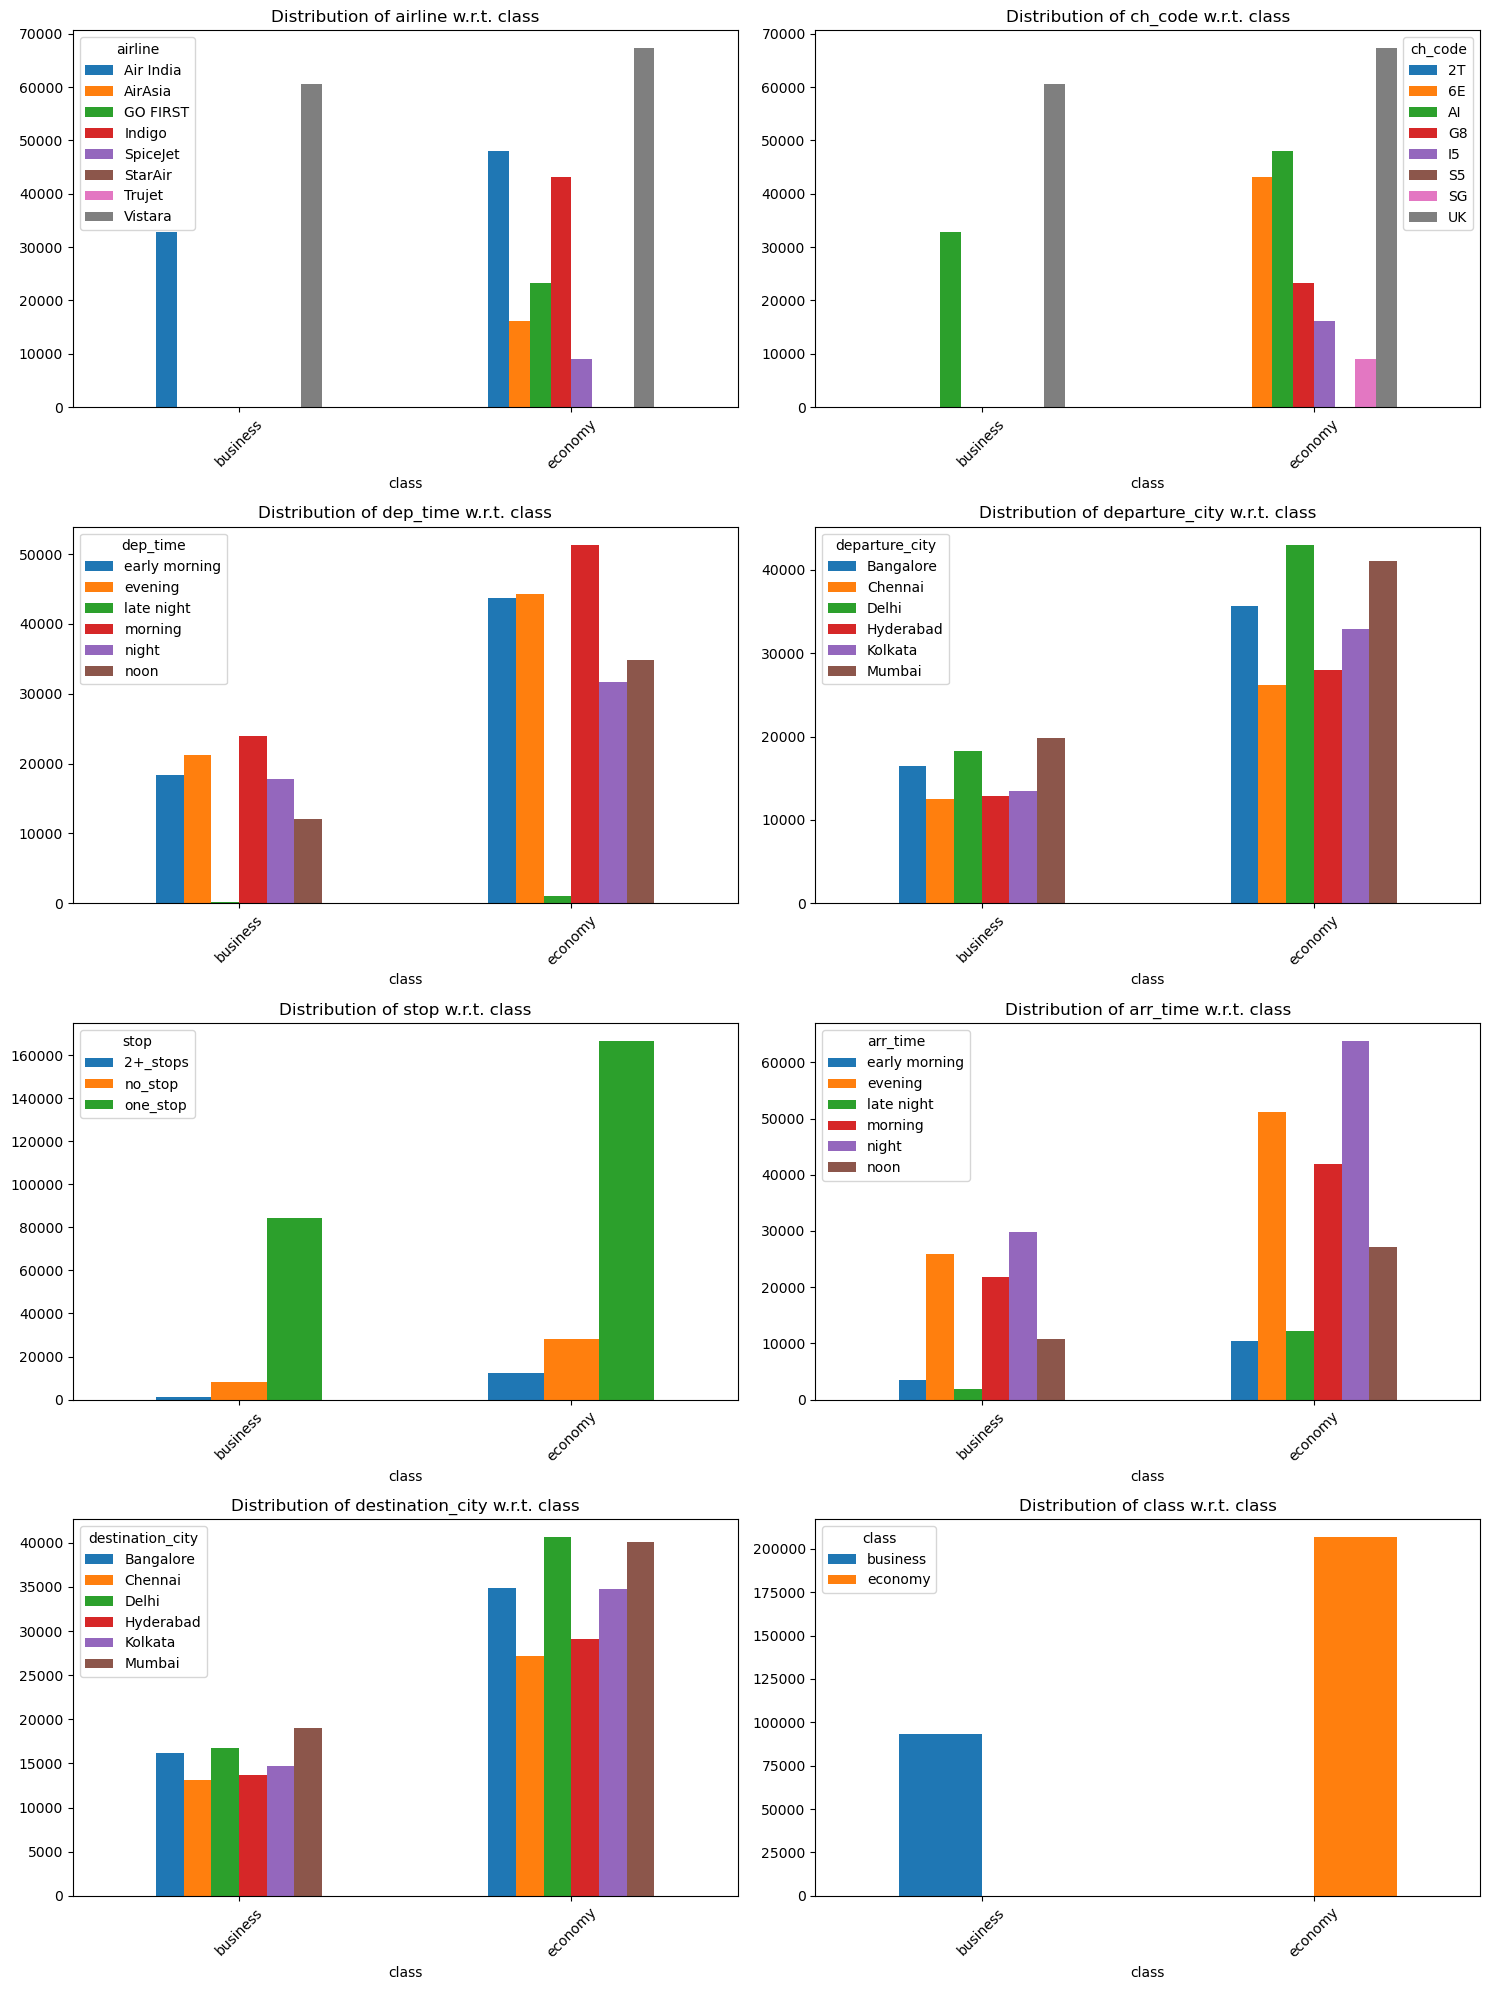

In [64]:
# class vs other categories:
t = 1
plt.figure(figsize=(15,20))
for i in cat:
    if i != 'day_of_week' and i != 'city':
        ax = plt.subplot(4,2,t)
        pd.crosstab(df['class'], df[i]).plot(kind = 'bar', ax = ax)
        plt.title(f'Distribution of {i} w.r.t. {'class'}')
        plt.xticks(rotation = 45)
        t += 1
plt.tight_layout()
plt.show()

#### Cat vs num:

In [65]:
num

['num_code', 'time_taken', 'price']

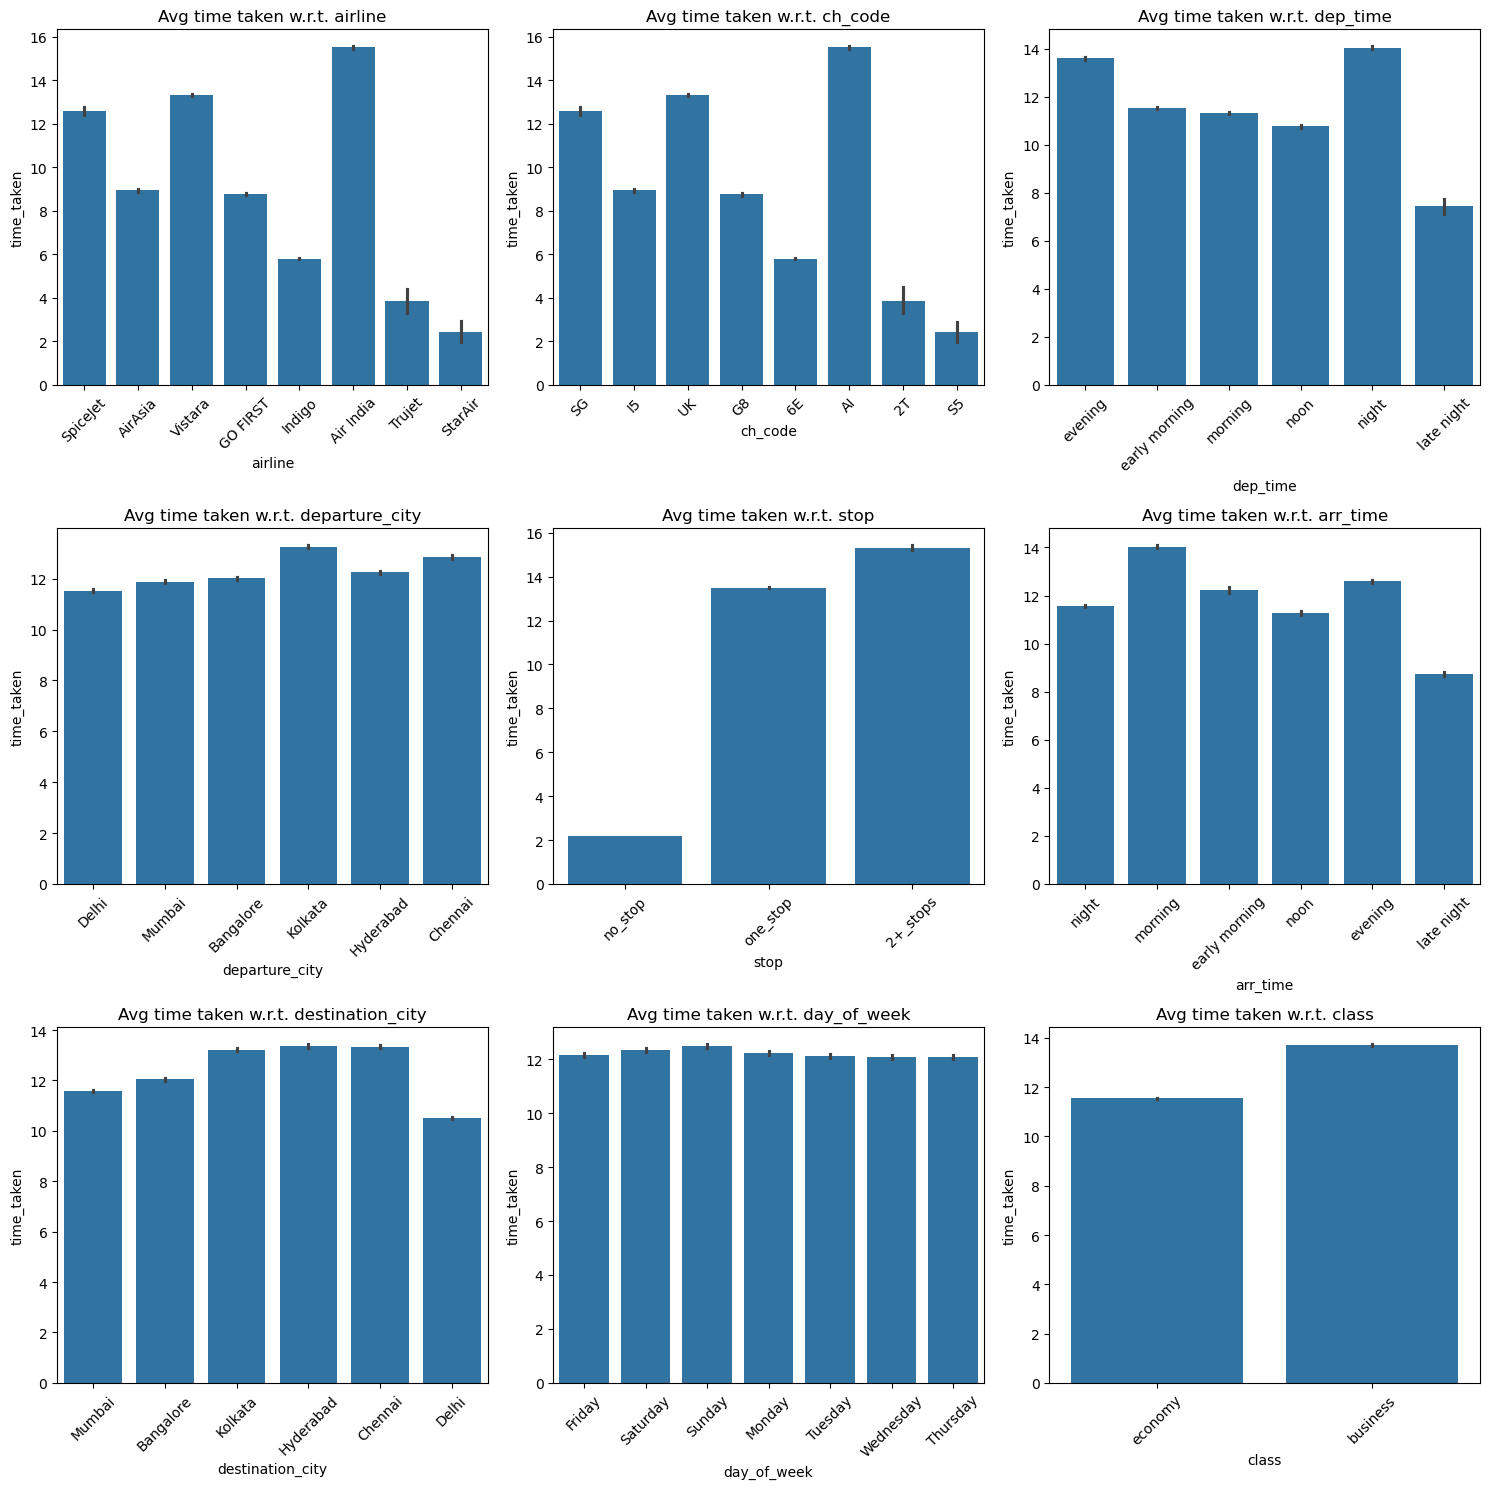

In [66]:
# time taken vs categorical columns
plt.figure(figsize=[15,15])
t = 1
for i in cat:
    if i != 'city':
        plt.subplot(3,3,t)
        sns.barplot(x = df[i], y = df['time_taken'])
        plt.title(f'Avg time taken w.r.t. {i}')
        plt.xticks(rotation = 45)
        t += 1
plt.tight_layout()
plt.show()

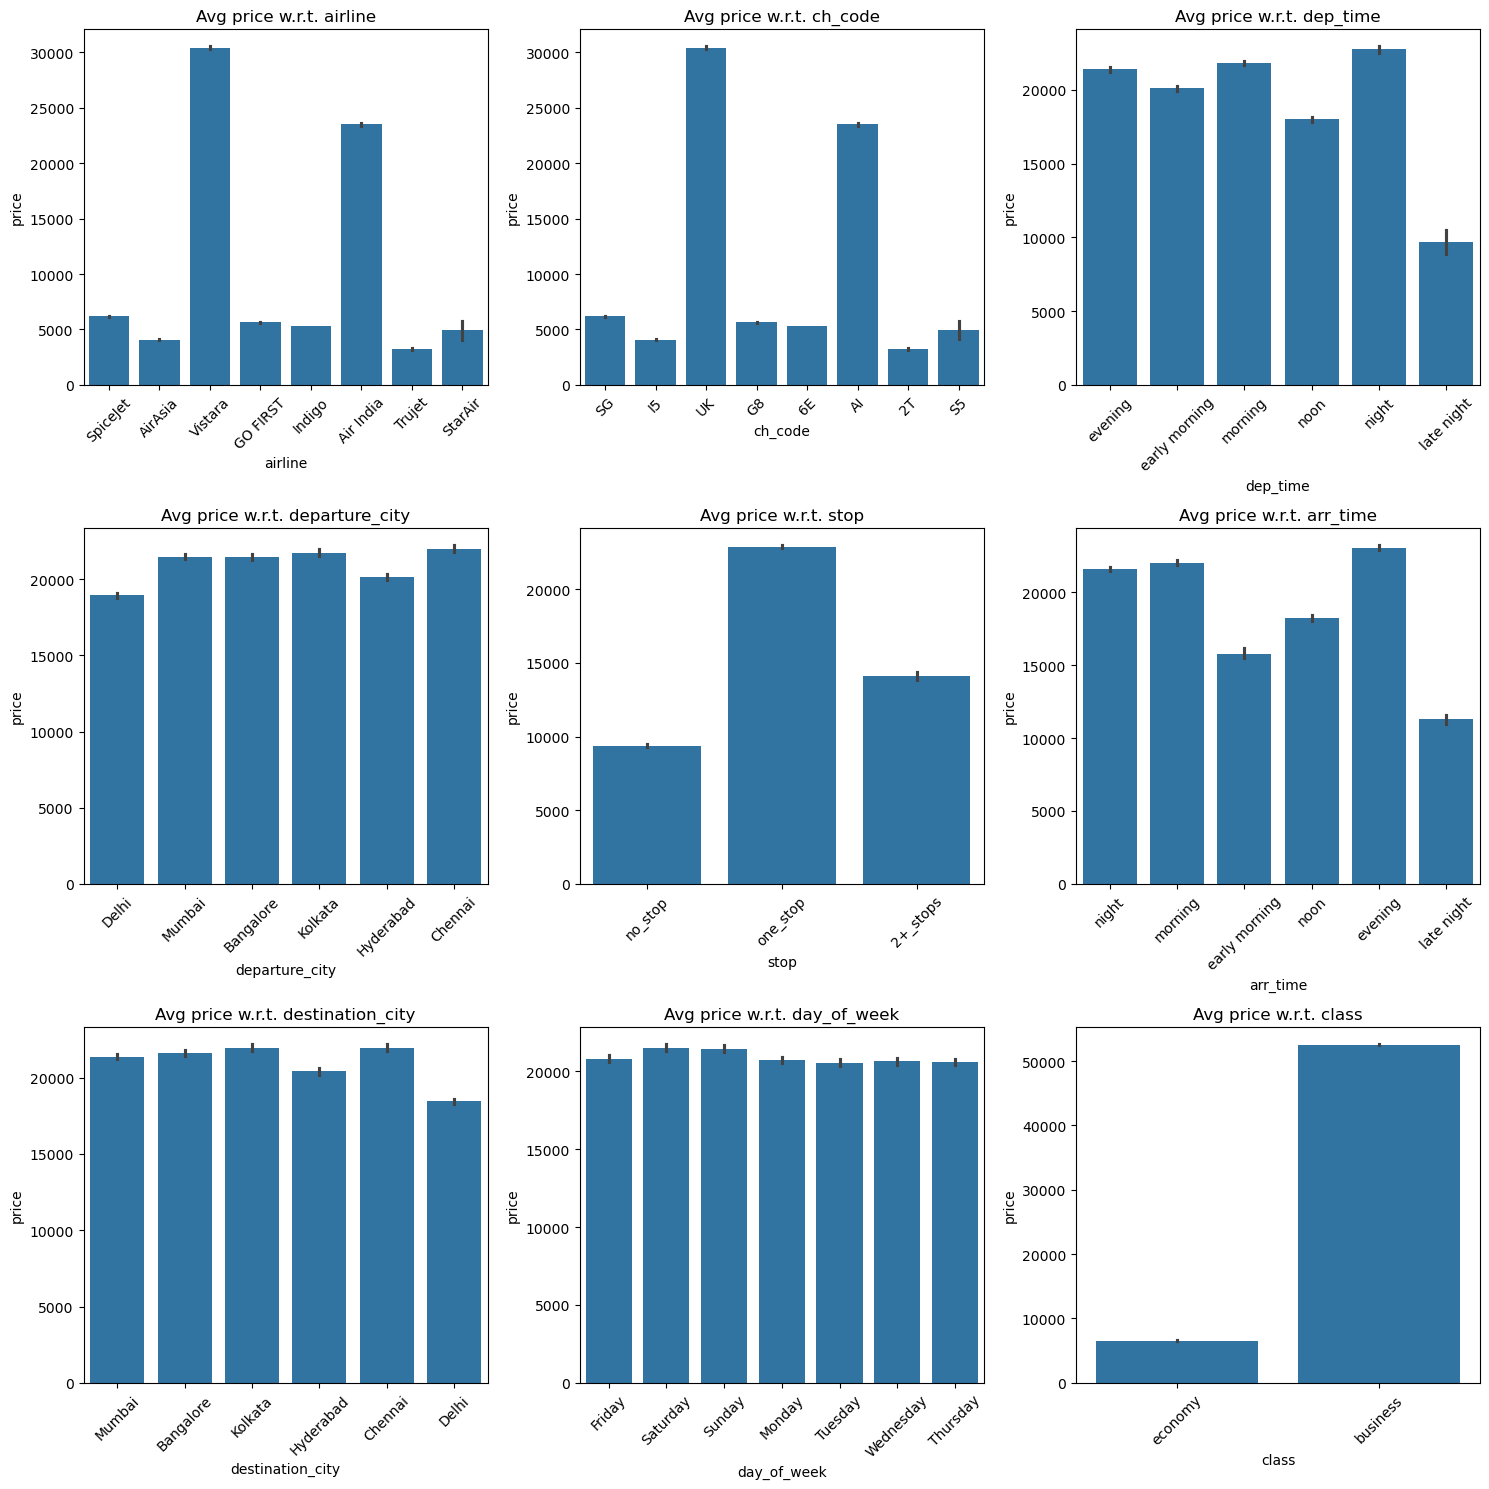

In [67]:
# price vs categorical columns
plt.figure(figsize=[15,15])
t = 1
for i in cat:
    if i != 'city':
        plt.subplot(3,3,t)
        sns.barplot(x = df[i], y = df['price'])
        plt.title(f'Avg price w.r.t. {i}')
        plt.xticks(rotation = 45)
        t += 1
plt.tight_layout()
plt.show()

### Multi variate analysis:

##### num vs num vs cat:

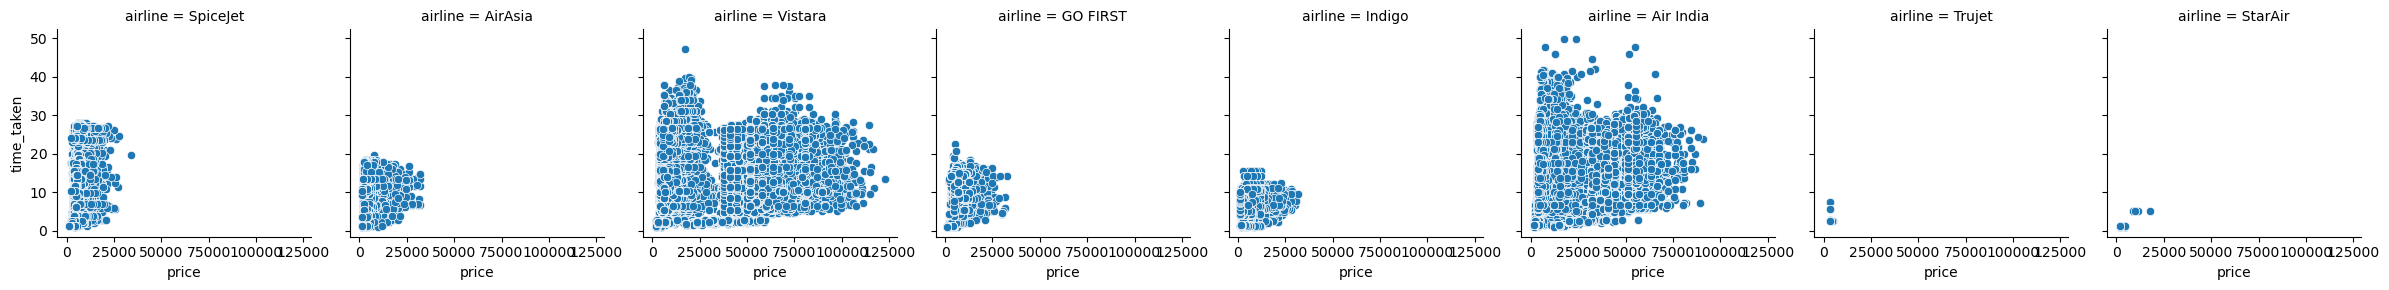

In [68]:
# price vs time_taken vs airline"
g = sns.FacetGrid(df, col='airline')
g.map(sns.scatterplot, 'price', 'time_taken')
plt.show()

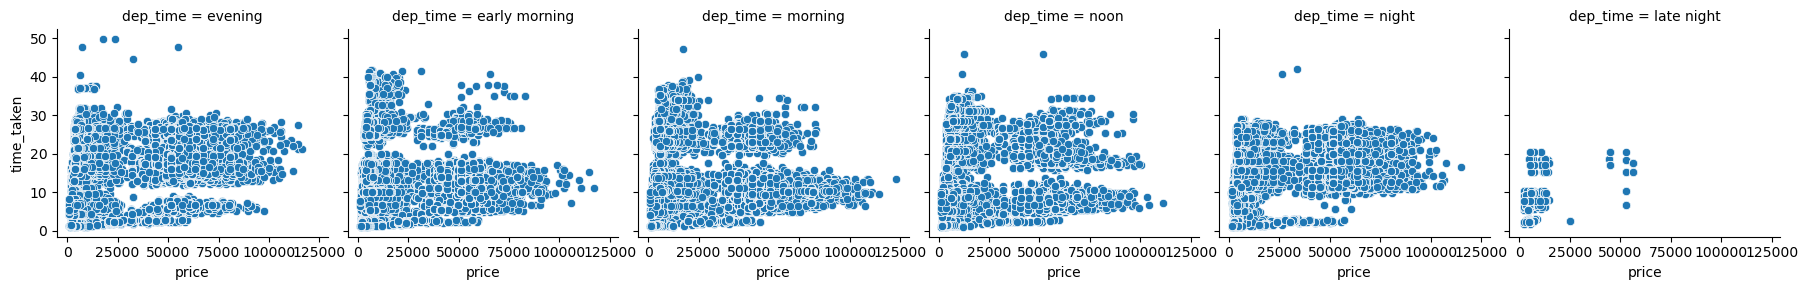

In [69]:
# price vs time_taken vs dep_time"
g = sns.FacetGrid(df, col='dep_time')
g.map(sns.scatterplot, 'price', 'time_taken')
plt.show()


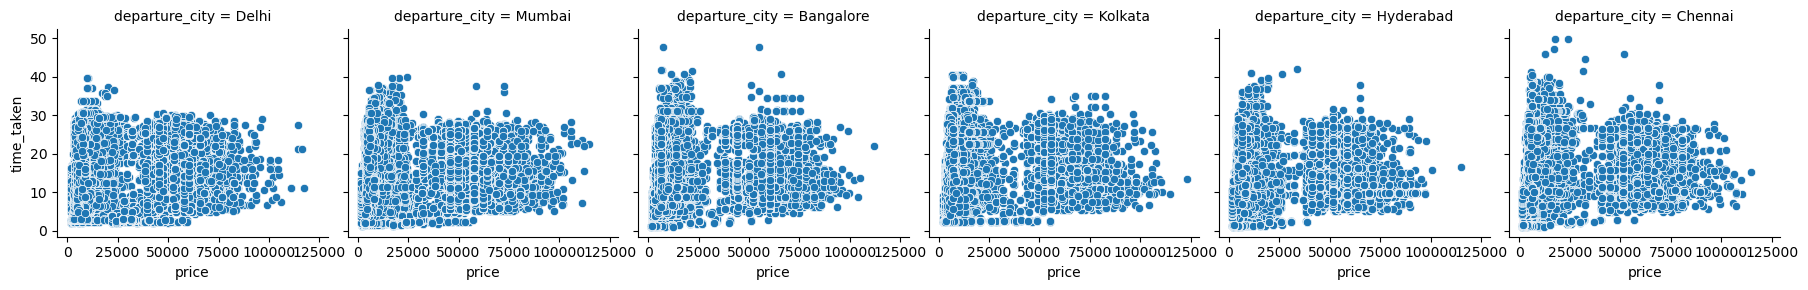

In [70]:
# price vs time_taken vs departure_city"
g = sns.FacetGrid(df, col='departure_city')
g.map(sns.scatterplot, 'price', 'time_taken')
plt.show()

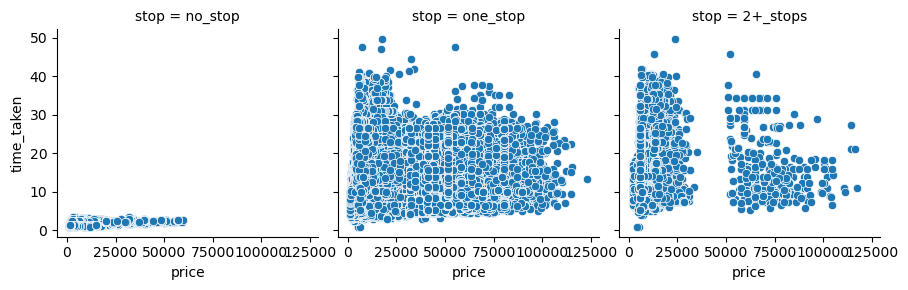

In [71]:
# price vs time_taken vs stop"
g = sns.FacetGrid(df, col='stop')
g.map(sns.scatterplot, 'price', 'time_taken')
plt.show()

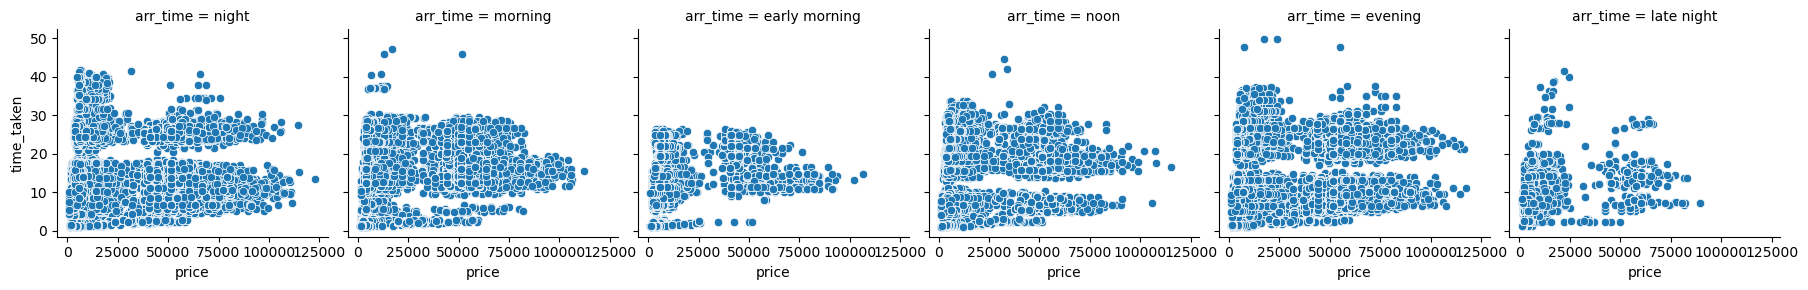

In [72]:
# price vs time_taken vs arr_time"
g = sns.FacetGrid(df, col='arr_time')
g.map(sns.scatterplot, 'price', 'time_taken')
plt.show()

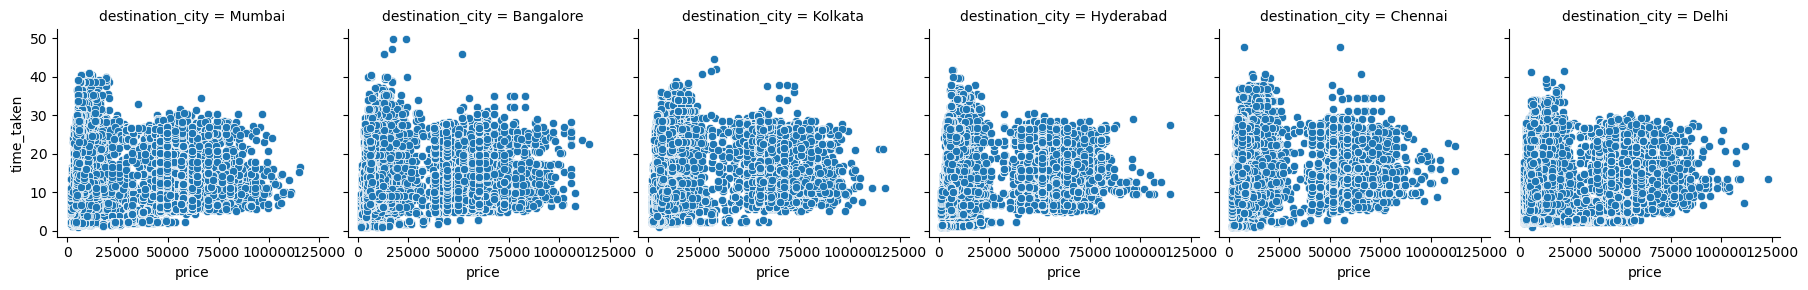

In [73]:
# price vs time_taken vs destination_city"
g = sns.FacetGrid(df, col='destination_city')
g.map(sns.scatterplot, 'price', 'time_taken')
plt.show()

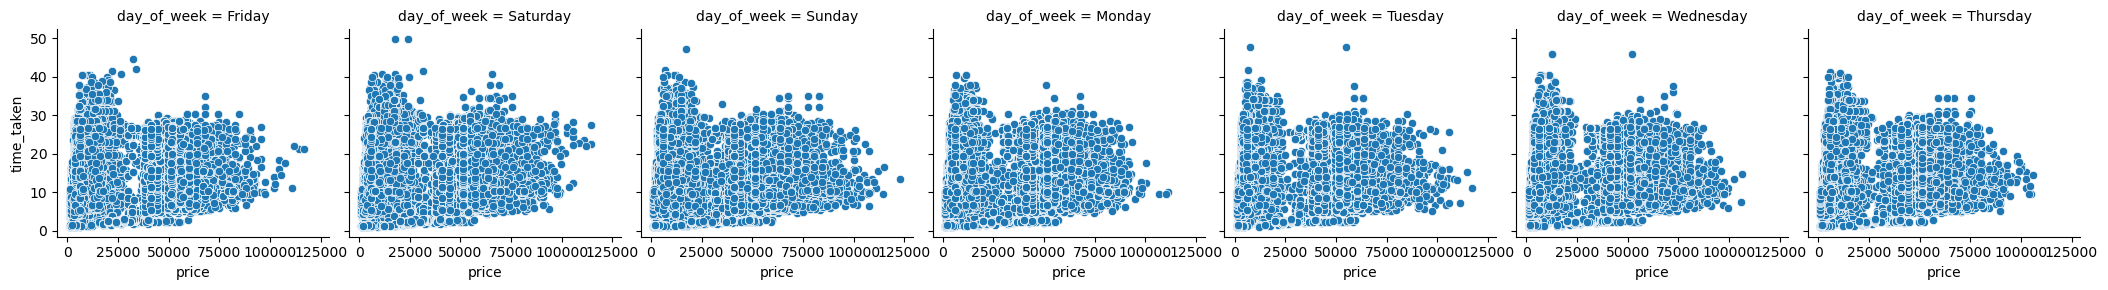

In [74]:

# price vs time_taken vs day_of_week"
g = sns.FacetGrid(df, col='day_of_week')
g.map(sns.scatterplot, 'price', 'time_taken')
plt.show()

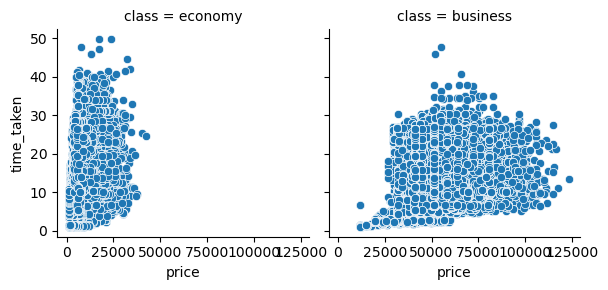

In [75]:
# price vs time_taken vs class"
g = sns.FacetGrid(df, col='class')
g.map(sns.scatterplot, 'price', 'time_taken')
plt.show()

##### Cat vs cat vs num:

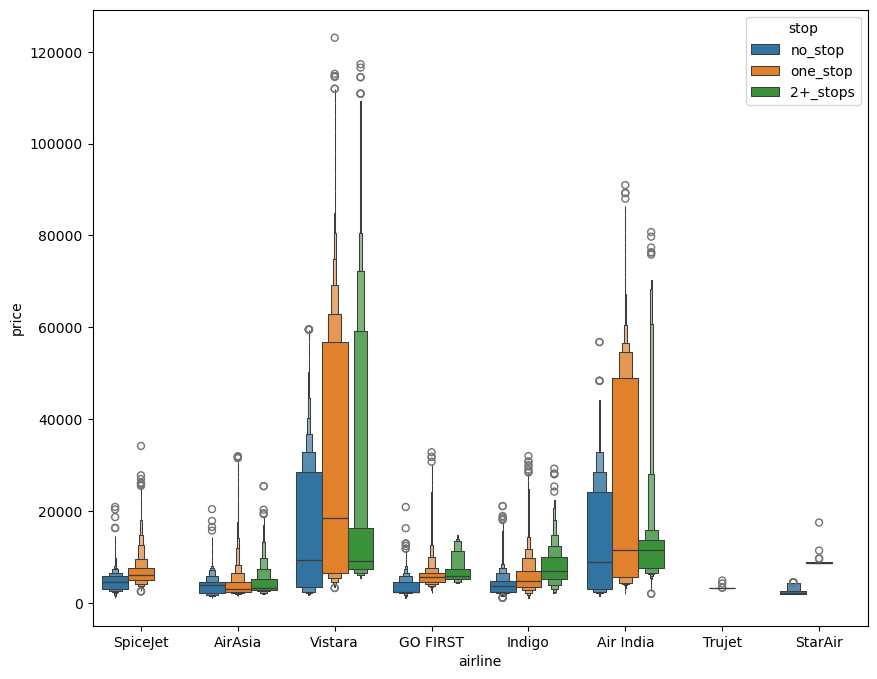

In [76]:
sns.boxenplot(x = df['airline'], y = df['price'], hue = df['stop'])
plt.show()

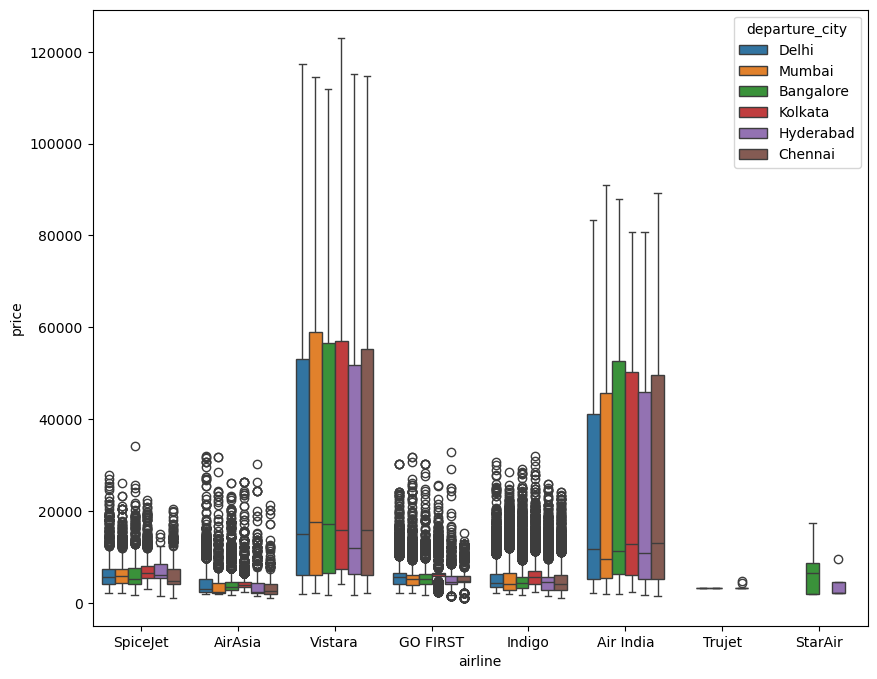

In [77]:
sns.boxplot(x = df['airline'], y = df['price'], hue = df['departure_city'])
plt.show()

### Encoding:

In [78]:
df_temp = df

In [79]:
from sklearn.preprocessing import OrdinalEncoder

In [80]:
df['stop'].unique()

array(['no_stop', 'one_stop', '2+_stops'], dtype=object)

In [81]:
categories = [['no_stop', 'one_stop', '2+_stops']]
o = OrdinalEncoder(categories=categories, dtype = int)

In [82]:
df_temp['stop'] = o.fit_transform(df_temp[['stop']])

In [83]:
df_temp['stop'].unique()

array([0, 1, 2])

In [84]:
df_temp.drop('city', axis = 1, inplace = True)
df_temp.drop('ch_code', axis = 1, inplace = True)

In [85]:
df_encoded = pd.get_dummies(df_temp, dtype='int', drop_first=True)

In [86]:
df_encoded.head()

date  num_code  time_taken  stop   price  airline_AirAsia  \
0 2022-02-11      8709    2.166667     0  5953.0                0   
1 2022-02-11      8157    2.333333     0  5953.0                0   
2 2022-02-11       764    2.166667     0  5956.0                1   
3 2022-02-11       995    2.250000     0  5955.0                0   
4 2022-02-11       963    2.333333     0  5955.0                0   

   airline_GO FIRST  airline_Indigo  airline_SpiceJet  airline_StarAir  ...  \
0                 0               0                 1                0  ...   
1                 0               0                 1                0  ...   
2                 0               0                 0                0  ...   
3                 0               0                 0                0  ...   
4                 0               0                 0                0  ...   

   destination_city_Hyderabad  destination_city_Kolkata  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   destination_city_Mumbai  class_economy  day_of_week_Monday  \
0                        1              1                   0   
1                        1              1                   0   
2                        1              1                   0   
3                        1              1                   0   
4                        1              1                   0   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   day_of_week_Tuesday  day_of_week_Wednesday  
0                    0                      0  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      0  

[5 rows x 39 columns]

### Transformation:

In [87]:
for i in num:
    print(i)
    print(df_encoded[i].skew())
    print('-----------')

num_code
2.816130569595276
-----------
time_taken
0.6029784255685438
-----------
price
1.0618818903392429
-----------


In [88]:
from sklearn.preprocessing import PowerTransformer

In [89]:
p = PowerTransformer()
df_encoded['price'] = p.fit_transform(df_encoded[['price']])
df_encoded['price'].skew()

0.1131788008598758

In [90]:
df_encoded['time_taken'] = p.fit_transform(df_encoded[['time_taken']])
df_encoded['time_taken'].skew()

-0.061477852802671686

<Axes: xlabel='price', ylabel='Density'>

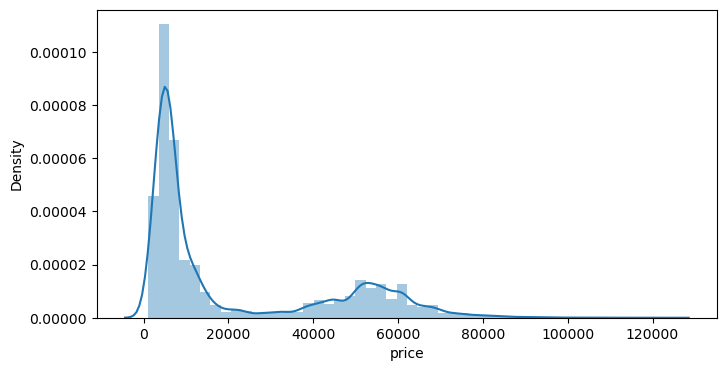

In [91]:
plt.rcParams['figure.figsize'] = [8,4]
sns.distplot(df['price'])

<Axes: xlabel='time_taken', ylabel='Density'>

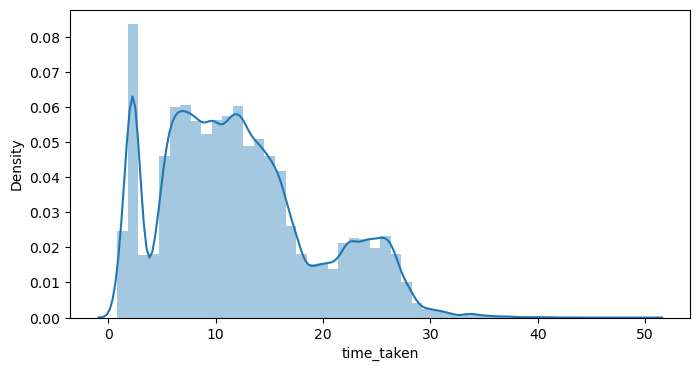

In [92]:
plt.rcParams['figure.figsize'] = [8,4]
sns.distplot(df['time_taken'])

## Model creation:

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, classification_report, f1_score,mean_absolute_percentage_error, root_mean_squared_error
from sklearn.metrics import roc_auc_score, mean_squared_error
lr = LinearRegression()

In [94]:
X = df_encoded.drop(['price', 'date'], axis = 1)
y = df_encoded['price']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=10)
model = lr.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.8398510363169323
Testing r2 score: 0.838320343532968
Train MAPE: 2.9968226517233925
Test MAPE: 2.867261290131983


In [95]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_rf = rf.fit(xtrain, ytrain)
ypred_train = model_rf.predict(xtrain)
ypred_test = model_rf.predict(xtest)
print(f'Training accuracy: {r2_score(ytrain, ypred_train)}')
print(f'Testing accuracy: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training accuracy: 0.9197085402096965
Testing accuracy: 0.8603914084762464
Train MAPE: 2.035075670062172
Test MAPE: 2.7124955375841946


In [72]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
lasso = Lasso()
model_lasso = lasso.fit(xtrain, ytrain)
ypred_train = model_lasso.predict(xtrain)
ypred_test = model_lasso.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.056492604425080195
Testing r2 score: 0.055654935120165394
Train MAPE: 1.7067036091708807
Test MAPE: 1.6984338570764377


In [73]:
ridge = Ridge()
model_ridge = ridge.fit(xtrain, ytrain)
ypred_train = model_ridge.predict(xtrain)
ypred_test = model_ridge.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.8398509657388529
Testing r2 score: 0.8383207213861471
Train MAPE: 2.9967647714337855
Test MAPE: 2.8672226280367137


In [74]:
en = ElasticNet()
model_en = en.fit(xtrain, ytrain)
ypred_train = model_en.predict(xtrain)
ypred_test = model_en.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.05649279599142176
Testing r2 score: 0.05565530962257459
Train MAPE: 1.7075732687374514
Test MAPE: 1.6992923251692034


# EDA - 2:

In [96]:
df_bus = pd.read_csv('business.csv')
df_eco = pd.read_csv('economy.csv')
df_bus['class'] = 'business'
df_eco['class'] = 'economy'

df_raw = pd.concat([df_bus, df_eco], ignore_index=True)
df_raw.head(2)

date    airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  Air India      AI       868    18:00  Delhi    02h 00m   
1  11-02-2022  Air India      AI       624    19:00  Delhi    02h 15m   

        stop arr_time      to   price     class  
0  non-stop     20:00  Mumbai  25,612  business  
1  non-stop     21:15  Mumbai  25,612  business

In [97]:
df_raw = df_raw.drop_duplicates()

df_raw['stop'] = df_raw['stop'].str.replace(r'1-stop[\s\S]*', 'one_stop', regex=True)
print(df_raw['stop'].unique())

df_raw.replace({'non-stop ': 'no_stop', '1-stop':'one_stop', '2+-stop': '2+_stop'}, inplace = True)

print(df_raw['stop'].unique())

df_raw['date'] = pd.to_datetime(df_raw['date'], format='%d-%m-%Y')
df_raw['day_of_week'] = df_raw['date'].dt.day_name()
df_raw['date'] = df_raw['date'].dt.day

df_raw['price'] = df_raw['price'].str.replace(',','').astype('float')

df_raw['arr_time'] = df_raw['arr_time'].str.replace(':','.').astype('float')
df_raw['dep_time'] = df_raw['dep_time'].str.replace(':','.').astype('float')

df_raw = df_raw.drop('ch_code', axis = 1)

['non-stop ' 'one_stop' '2+-stop']
['no_stop' 'one_stop' '2+_stop']


In [98]:
import re

# Enhanced function to handle variations in 'time_taken' formats
def convert_to_minutes_enhanced(time_str):
    if pd.isnull(time_str):
        return None
    # Extract hours and minutes using regex
    match = re.match(r"(?:(\d+)\.?(\d*)h)?\s*(?:(\d+)m)?", time_str.strip())
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(3)) if match.group(3) else 0
        return hours * 60 + minutes
    return None

# Apply the enhanced function to clean and convert the 'time_taken' data
df_raw['time_taken'] = df_raw['time_taken'].apply(convert_to_minutes_enhanced)
df_raw['time_taken'] = df_raw['time_taken']/60

# Basic statistics
print(df_raw['time_taken'].describe())

count    300259.000000
mean         12.217706
std           7.192924
min           0.833333
25%           6.750000
50%          11.250000
75%          16.166667
max          49.833333
Name: time_taken, dtype: float64


In [7]:
df_raw.head(2)

date    airline  num_code  dep_time   from  time_taken     stop  arr_time  \
0    11  Air India       868      18.0  Delhi        2.00  no_stop     20.00   
1    11  Air India       624      19.0  Delhi        2.25  no_stop     21.15   

       to    price     class day_of_week  
0  Mumbai  25612.0  business      Friday  
1  Mumbai  25612.0  business      Friday

In [162]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         300259 non-null  int32  
 1   airline      300259 non-null  object 
 2   num_code     300259 non-null  int64  
 3   dep_time     300259 non-null  float64
 4   from         300259 non-null  object 
 5   time_taken   300259 non-null  float64
 6   stop         300259 non-null  object 
 7   arr_time     300259 non-null  float64
 8   to           300259 non-null  object 
 9   price        300259 non-null  float64
 10  class        300259 non-null  object 
 11  day_of_week  300259 non-null  object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 28.6+ MB


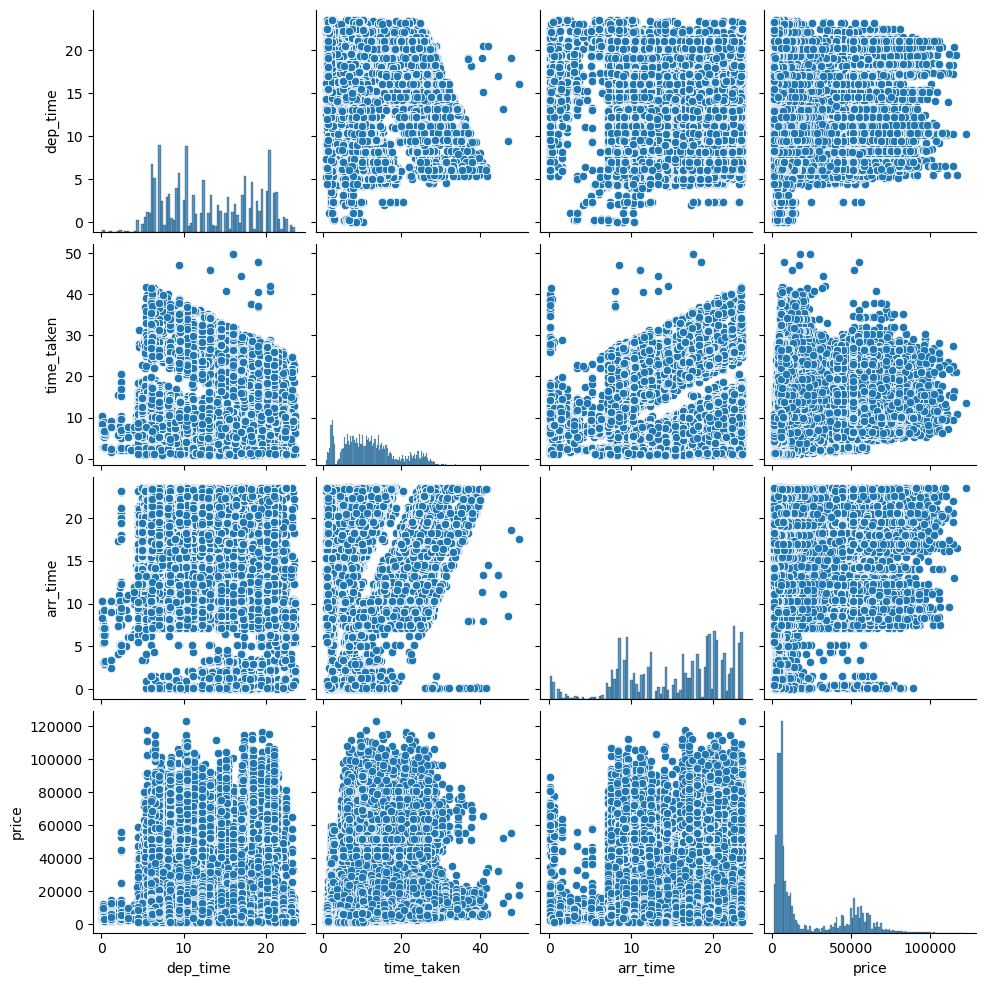

In [8]:
num = ['dep_time','time_taken','arr_time','price']
sns.pairplot(df_raw[num])
plt.show()

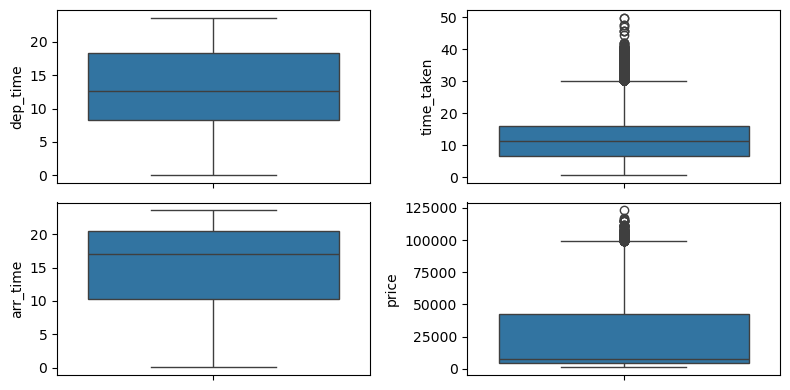

In [99]:
num = ['dep_time','time_taken','arr_time','price']
t = 1
for i in num:
    plt.subplot(2,2,t)
    sns.boxplot(df_raw[i])
    t += 1
plt.tight_layout()
plt.show()

In [99]:
for i in ['time_taken', 'price']:
    print(i)
    print(df_raw[i].min())
    print(df_raw[i].max())
    print()

for i in ['time_taken', 'price']:
    q1 = np.quantile(df_raw[i], 0.25)
    q3 = np.quantile(df_raw[i], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df_raw[i] = df_raw[i].apply(lambda x: upper if x > upper else (lower if x < lower else x))

for i in ['time_taken', 'price']:
    print(i)
    print(df_raw[i].min())
    print(df_raw[i].max())
    print()

time_taken
0.8333333333333334
49.833333333333336

price
1105.0
123071.0

time_taken
0.8333333333333334
30.29166666666667

price
1105.0
99128.0



#### Analysing the arr_time and dep_time variables:

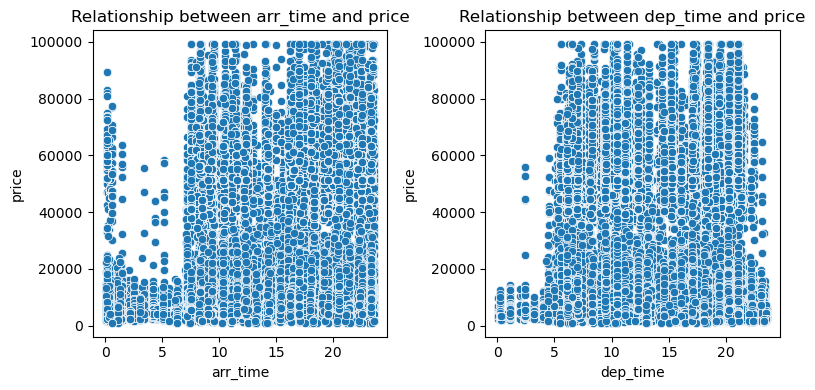

In [170]:
plt.subplot(1,2,1)
sns.scatterplot(x = df_raw['arr_time'], y = df_raw['price'])
plt.title('Relationship between arr_time and price')
plt.subplot(1,2,2)
sns.scatterplot(x = df_raw['dep_time'], y = df_raw['price'])
plt.title('Relationship between dep_time and price')
plt.tight_layout()
plt.show()

In [175]:
num = df_raw.select_dtypes(include = np.number).columns.to_list()
df_raw[num].corr()

date  num_code  dep_time  time_taken  arr_time     price
date        1.000000 -0.009887 -0.002244   -0.002386 -0.005141 -0.003244
num_code   -0.009887  1.000000 -0.015131   -0.135362 -0.005988 -0.212914
dep_time   -0.002244 -0.015131  1.000000    0.145732 -0.157039  0.032113
time_taken -0.002386 -0.135362  0.145732    1.000000 -0.023001  0.206926
arr_time   -0.005141 -0.005988 -0.157039   -0.023001  1.000000  0.075592
price      -0.003244 -0.212914  0.032113    0.206926  0.075592  1.000000

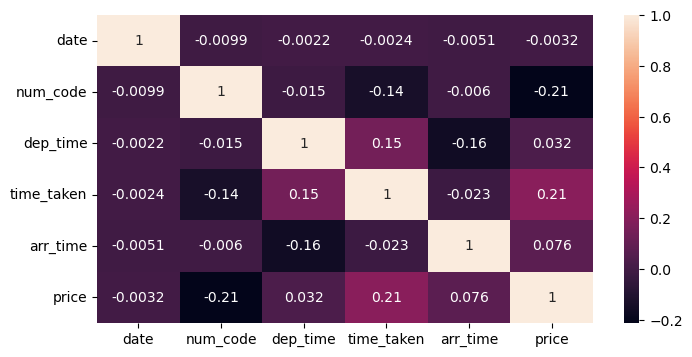

In [177]:
sns.heatmap(df_raw[num].corr(), annot = True)
plt.show()

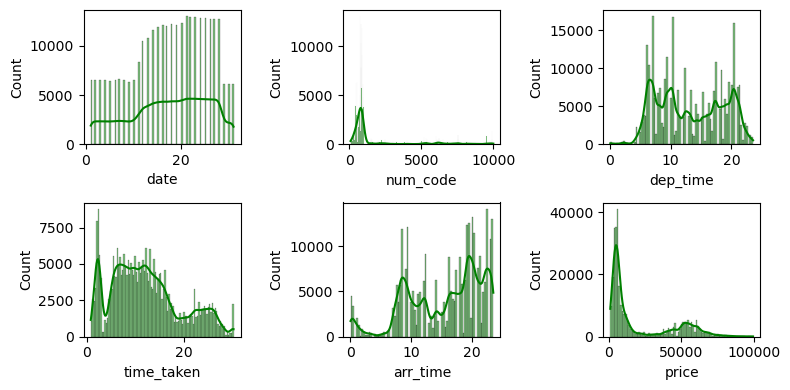

In [180]:
t = 1
for i in num:
    plt.subplot(2,3,t)
    sns.histplot(df_raw[i],kde=True, color= 'green')
    t += 1

plt.tight_layout()
plt.show()

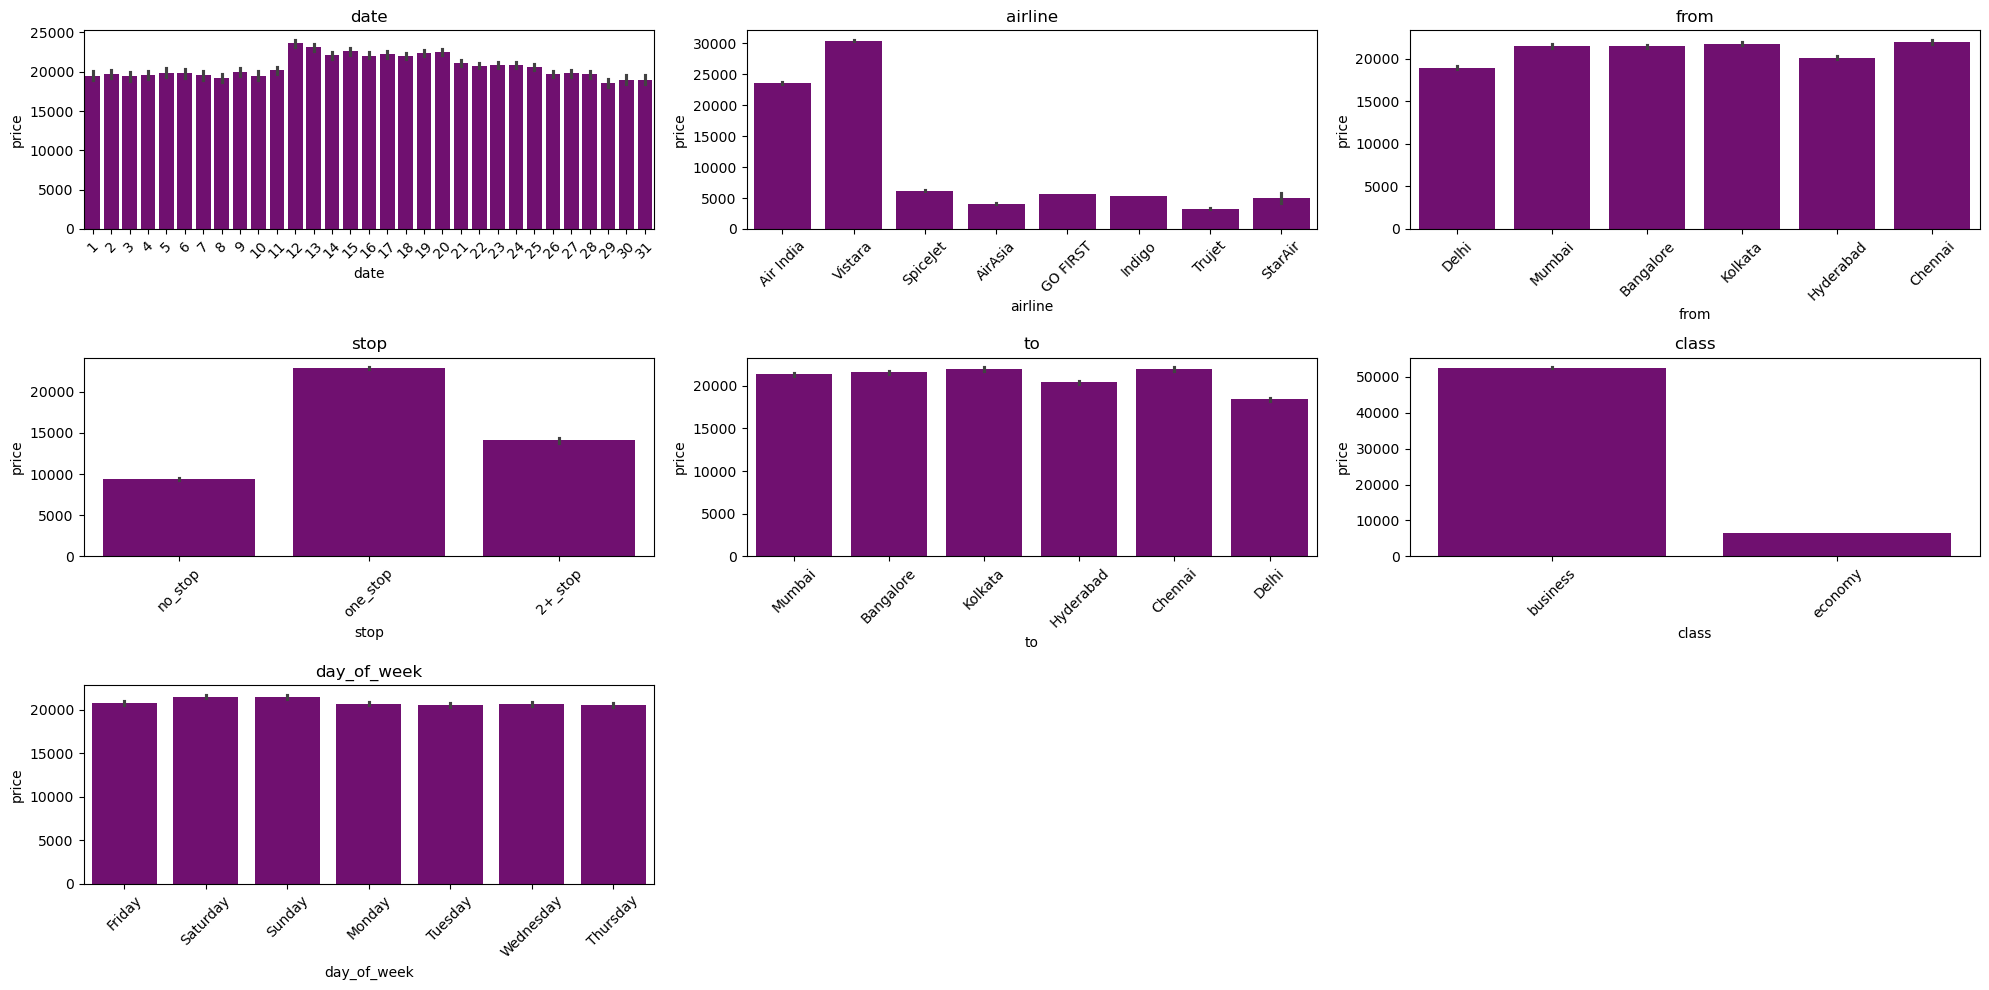

In [188]:
num = ['num_code', 'dep_time', 'time_taken', 'arr_time', 'price']
cat = ['date', 'airline', 'from', 'stop', 'to', 'class', 'day_of_week']
t = 1
plt.figure(figsize=(20,10))
for i in cat:
    plt.subplot(3,3,t)
    sns.barplot(data = df_raw, x = i, y = 'price', estimator = 'mean', color = 'purple')
    plt.xticks(rotation = 45)
    plt.title(i)
    t += 1

plt.tight_layout()
plt.show()

#### Statistical analysis:

In [201]:
def interpretation(pval, alpha = 0.05):
    if p_value < alpha:
        print(F'Since p value is less than alpha we reject H0, hence : "{H1}"')
    else:
        print(f'Since p value is greater than alpha , we fail to reject H0 and hence : "{H0}"')

In [202]:
# day_of_Week vs price:
from scipy import stats
H0 = 'There is no difference in price among different day_of_week categories'
H1 = 'At least one day_of_week category has a different mean price compared to the others'
grouped_data = [df_raw[df_raw['day_of_week'] == size]['price'] for size in df_raw['day_of_week'].unique()]
f_stat, p_value = stats.f_oneway(*grouped_data)

# Output the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

interpretation(p_value)

F-statistic: 13.61807649994426
P-value: 1.5926343217553477e-15
Since p value is less than alpha we reject H0, hence : "At least one day_of_week category has a different mean price compared to the others"


In [204]:
# Let us find which category's mean is different:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog = df_raw['price'], groups= df_raw['day_of_week'], alpha = 0.05)
tukey.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [206]:
# stop vs price:
from scipy import stats
H0 = 'There is no difference in price among different stop categories'
H1 = 'At least one stop category has a different mean price compared to the others'
grouped_data = [df_raw[df_raw['stop'] == size]['price'] for size in df_raw['stop'].unique()]
f_stat, p_value = stats.f_oneway(*grouped_data)

# Output the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

interpretation(p_value)

F-statistic: 6491.182146191993
P-value: 0.0
Since p value is less than alpha we reject H0, hence : "At least one stop category has a different mean price compared to the others"


In [207]:
# Let us find which category's mean is different:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog = df_raw['price'], groups= df_raw['stop'], alpha = 0.05)
tukey.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [208]:
# from vs price:
H0 = 'There is no difference in price among different from categories'
H1 = 'At least one from category has a different mean price compared to the others'
grouped_data = [df_raw[df_raw['from'] == size]['price'] for size in df_raw['from'].unique()]
f_stat, p_value = stats.f_oneway(*grouped_data)

# Output the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

interpretation(p_value)

F-statistic: 145.26530574164235
P-value: 1.539564037268297e-154
Since p value is less than alpha we reject H0, hence : "At least one from category has a different mean price compared to the others"


In [209]:
# Let us find which category's mean is different:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog = df_raw['price'], groups= df_raw['from'], alpha = 0.05)
tukey.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [210]:
# cat vs cat
# airlines vs stop
H0 = 'The variables are independent'
H1 = 'The variables are not independent' 

contingency_table = pd.crosstab(df_raw['airline'], df_raw['stop'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

interpretation(p_value)

Chi-Square Statistic: 18330.115942170498
P-value: 0.0
Degrees of Freedom: 14
Since p value is less than alpha we reject H0, hence : "The variables are not independent"


In [212]:
# cat vs cat
# from vs day_of_week
H0 = 'The variables are independent'
H1 = 'The variables are not independent' 

contingency_table = pd.crosstab(df_raw['day_of_week'], df_raw['from'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

interpretation(p_value)

Chi-Square Statistic: 86.34585507038165
P-value: 2.3256373196791984e-07
Degrees of Freedom: 30
Since p value is less than alpha we reject H0, hence : "The variables are not independent"


In [213]:
# cat vs cat
# to vs class
H0 = 'The variables are independent'
H1 = 'The variables are not independent' 

contingency_table = pd.crosstab(df_raw['to'], df_raw['class'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

interpretation(p_value)

Chi-Square Statistic: 238.24100237539236
P-value: 1.8298875918857124e-49
Degrees of Freedom: 5
Since p value is less than alpha we reject H0, hence : "The variables are not independent"


#### Encoding:

In [100]:
df_raw.replace({'no_stop':0,'one_stop':1, '2+_stop': 2}, inplace = True)
df_raw['stop'].unique()

array([0, 1, 2], dtype=int64)

In [101]:
df_enc = pd.get_dummies(df_raw, drop_first=True, dtype='int')
df_enc.head()

date  num_code  dep_time  time_taken  stop  arr_time    price  \
0    11       868     18.00    2.000000     0     20.00  25612.0   
1    11       624     19.00    2.250000     0     21.15  25612.0   
2    11       531     20.00   24.750000     1     20.45  42220.0   
3    11       839     21.25   26.500000     1     23.55  44450.0   
4    11       544     17.15    6.666667     1     23.55  46690.0   

   airline_AirAsia  airline_GO FIRST  airline_Indigo  ...  to_Hyderabad  \
0                0                 0               0  ...             0   
1                0                 0               0  ...             0   
2                0                 0               0  ...             0   
3                0                 0               0  ...             0   
4                0                 0               0  ...             0   

   to_Kolkata  to_Mumbai  class_economy  day_of_week_Monday  \
0           0          1              0                   0   
1           0          1              0                   0   
2           0          1              0                   0   
3           0          1              0                   0   
4           0          1              0                   0   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   day_of_week_Tuesday  day_of_week_Wednesday  
0                    0                      0  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      0  

[5 rows x 31 columns]

In [102]:
num = ['dep_time','time_taken','arr_time','price']
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
df_enc[num] = st.fit_transform(df_enc[num])
df_enc.head()

date  num_code  dep_time  time_taken  stop  arr_time     price  \
0    11       868  0.882712   -1.429372     0  0.738319  0.208503   
1    11       624  1.068692   -1.394329     0  0.928429  0.208503   
2    11       531  1.254672    1.759497     1  0.812710  0.940531   
3    11       839  1.487147    2.004795     1  1.325181  1.038822   
4    11       544  0.724629   -0.775245     1  1.325181  1.137555   

   airline_AirAsia  airline_GO FIRST  airline_Indigo  ...  to_Hyderabad  \
0                0                 0               0  ...             0   
1                0                 0               0  ...             0   
2                0                 0               0  ...             0   
3                0                 0               0  ...             0   
4                0                 0               0  ...             0   

   to_Kolkata  to_Mumbai  class_economy  day_of_week_Monday  \
0           0          1              0                   0   
1           0          1              0                   0   
2           0          1              0                   0   
3           0          1              0                   0   
4           0          1              0                   0   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   day_of_week_Tuesday  day_of_week_Wednesday  
0                    0                      0  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      0  

[5 rows x 31 columns]

### Train test split:

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, classification_report, f1_score,mean_absolute_percentage_error, root_mean_squared_error
from sklearn.metrics import *
import statsmodels.api as sma
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [14]:
X = df_enc.drop(['price'], axis = 1)
y = df_enc['price']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=10)

In [15]:
print(df_enc.shape)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(300259, 31)
(210181, 30)
(210181,)
(90078, 30)
(90078,)


### Hypthoesis testing:

In [221]:
import statsmodels.api as sma

In [233]:
xtrain_t = sma.add_constant(xtrain)
model1 = sma.OLS(ytrain, xtrain_t).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 6.618e+04
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:56:34   Log-Likelihood:                -51687.
No. Observations:              210181   AIC:                         1.034e+05
Df Residuals:                  210150   BIC:                         1.038e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.0997      0.004    269.091      0.000       1.092       1.108
date                     -0.0005   8.43e-05     -5.792      0.000      -0.001      -0.000
num_code               2.274e-06   3.83e-07      5.933      0.000    1.52e-06    3.03e-06
dep_time                 -0.0017      0.001     -2.488      0.013      -0.003      -0.000
time_taken                0.0288      0.001     32.637      0.000       0.027       0.031
stop                      0.2486      0.002    124.917      0.000       0.245       0.252
arr_time                  0.0133      0.001     19.006      0.000       0.012       0.015
airline_AirAsia          -0.0175      0.003     -5.123      0.000      -0.024      -0.011
airline_GO FIRST          0.0731      0.003     24.746      0.000       0.067       0.079
airline_Indigo            0.0908      0.003     34.170      0.000       0.086       0.096
airline_SpiceJet          0.1003      0.004     23.194      0.000       0.092       0.109
airline_StarAir           0.2441      0.047      5.163      0.000       0.151       0.337
airline_Trujet           -0.0022      0.055     -0.040      0.968      -0.110       0.105
airline_Vistara           0.1769      0.002    103.867      0.000       0.174       0.180
from_Chennai             -0.0084      0.003     -3.333      0.001      -0.013      -0.003
from_Delhi               -0.0714      0.002    -31.163      0.000      -0.076      -0.067
from_Hyderabad           -0.0785      0.002    -31.469      0.000      -0.083      -0.074
from_Kolkata              0.0625      0.002     25.791      0.000       0.058       0.067
from_Mumbai              -0.0106      0.002     -4.661      0.000      -0.015      -0.006
to_Chennai               -0.0201      0.002     -8.064      0.000      -0.025      -0.015
to_Delhi                 -0.0659      0.002    -28.097      0.000      -0.071      -0.061
to_Hyderabad             -0.0819      0.002    -33.073      0.000      -0.087      -0.077
to_Kolkata                0.0579      0.002     24.141      0.000       0.053       0.063
to_Mumbai                 0.0005      0.002      0.205      0.838      -0.004       0.005
class_economy            -1.9924      0.002  -1211.842      0.000      -1.996      -1.989
day_of_week_Monday       -0.0215      0.003     -8.386      0.000      -0.027      -0.017
day_of_week_Saturday      0.0060      0.003      2.333      0.020       0.001       0.011
day_of_week_Sunday        0.0122      0.003      4.710      0.000       0.007       0.017
day_of_week_Thursday     -0.0249      0.003     -9.733      0.000      -0.030      -0.020
day_of_week_Tuesday      -0.0275      0.003    -10.762      0.000      -0.033      -0.023
day_of_week_Wednesday    -0.0250      0.003     -9.773      0.000      -0.030      -0.020
=======================

In [234]:
# Hypothesis testing for normality:
H0 = 'Data/Residual are normally distributed'
H1 = 'Data/Residual are not normally Distributed'
t_stat, pval = stats.jarque_bera(model1.resid)
print(t_stat, pval)
interpretation(pval)

183441.06971126396 0.0
Since p value is less than alpha we reject H0, hence : "Data/Residual are not normally Distributed"


In [235]:
# Test for linearity:
H0 = 'Data has linear relationship with the target'
H1 = 'Data has no linear relationship with the target'
t_stat, pval = sma.stats.linear_rainbow(model1)
print(t_stat, pval)
interpretation(pval)

1.005236565116942 0.19863524471175184
Since p value is less than alpha we reject H0, hence : "Data has no linear relationship with the target"


In [237]:
#Hypothesis testing for Heteroscedasticity:
import statsmodels.stats.api as ssa
H0 = 'There is equal variance present in the data'
H1 = 'There is unequal variance in the data'
t_stat, pval, f_stat, f_pval = ssa.het_breuschpagan(model.resid, model.model.exog)
print(t_stat, pval)
interpretation(pval)

37041.721474007354 0.0
Since p value is less than alpha we reject H0, hence : "There is unequal variance in the data"


### Feature selection:

In [107]:
import statsmodels.api as sm
import pandas as pd

def forward_selection(x, y, significance_level=0.05):
    initial_features = []
    remaining_features = list(x.columns)
    best_features = []
    
    while remaining_features:
        p_values = []
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(x[initial_features + [feature]])).fit()
            p_values.append((feature, model.pvalues[feature]))
        
        
        p_values = pd.DataFrame(p_values, columns=['feature', 'p_value'])
        p_values = p_values.sort_values(by='p_value')
        
        if p_values.iloc[0]['p_value'] < significance_level:
            best_feature = p_values.iloc[0]['feature']
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_features = initial_features[:]
        else:
            break
    
    return best_features


selected_features = forward_selection(X, y)
print("Selected Features:", selected_features)


Selected Features: ['num_code', 'time_taken', 'arr_time', 'class_economy', 'stop', 'from_Kolkata', 'airline_AirAsia', 'to_Kolkata', 'airline_Vistara', 'to_Hyderabad', 'from_Hyderabad', 'from_Delhi', 'to_Delhi', 'airline_Indigo', 'airline_GO FIRST', 'airline_SpiceJet', 'day_of_week_Sunday', 'day_of_week_Saturday', 'to_Chennai', 'date', 'airline_StarAir', 'day_of_week_Tuesday', 'day_of_week_Thursday', 'day_of_week_Wednesday', 'day_of_week_Monday', 'from_Mumbai', 'from_Chennai', 'dep_time']


In [103]:
selected_features = ['num_code', 'time_taken', 'arr_time', 'class_economy', 'stop', 'from_Kolkata', 'airline_AirAsia', 
                     'to_Kolkata', 'airline_Vistara', 'to_Hyderabad', 'from_Hyderabad', 'from_Delhi', 'to_Delhi', 
                     'airline_Indigo', 'airline_GO FIRST', 'airline_SpiceJet', 'day_of_week_Sunday', 'day_of_week_Saturday', 
                     'to_Chennai', 'date', 'airline_StarAir', 'day_of_week_Tuesday', 'day_of_week_Thursday', 
                     'day_of_week_Wednesday', 'day_of_week_Monday', 'from_Mumbai', 'from_Chennai', 'dep_time']
len(selected_features)

28

### Model creation:

In [104]:
X = df_enc[selected_features]
y = df_enc['price']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=10)

print(df_enc.shape)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(300259, 31)
(210181, 28)
(210181,)
(90078, 28)
(90078,)


In [110]:
lr = LinearRegression()
model = lr.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.9042799065856382
Testing r2 score: 0.9040861297946238
Train MAPE: 1.0909304399202284
Test MAPE: 1.0164907544788406


In [111]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
lasso = Lasso()
model_lasso = lasso.fit(xtrain, ytrain)
ypred_train = model_lasso.predict(xtrain)
ypred_test = model_lasso.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.04530123660752372
Testing r2 score: 0.04538870529577044
Train MAPE: 1.0474411126587932
Test MAPE: 1.050631822226348


In [112]:
ridge = Ridge()
model_ridge = ridge.fit(xtrain, ytrain)
ypred_train = model_ridge.predict(xtrain)
ypred_test = model_ridge.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.9042798995472601
Testing r2 score: 0.9040862076252054
Train MAPE: 1.0909077936800586
Test MAPE: 1.016470452234931


In [113]:
en = ElasticNet()
model_en = en.fit(xtrain, ytrain)
ypred_train = model_en.predict(xtrain)
ypred_test = model_en.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.045301428341799954
Testing r2 score: 0.04538950063165559
Train MAPE: 1.0475912777958958
Test MAPE: 1.0507845263894073


In [105]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_rf = rf.fit(xtrain, ytrain)
ypred_train = model_rf.predict(xtrain)
ypred_test = model_rf.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.9917685386287706
Testing r2 score: 0.9723919098407326
Train MAPE: 0.17942898455141162
Test MAPE: 0.3286854769652216


In [114]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
model_gb = gb.fit(xtrain, ytrain)
ypred_train = model_gb.predict(xtrain)
ypred_test = model_gb.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.9502457822309274
Testing r2 score: 0.9492346776549618
Train MAPE: 0.4754684705616277
Test MAPE: 0.4528055035892454


In [134]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [91]:
ada = AdaBoostRegressor()
model_ada = ada.fit(xtrain, ytrain)
ypred_train = model_ada.predict(xtrain)
ypred_test = model_ada.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.9107914370987606
Testing r2 score: 0.9091121599807722
0.6649540190559609
0.6286198908409766


In [92]:
dt = DecisionTreeRegressor()
model_dt = ada.fit(xtrain, ytrain)
ypred_train = model_dt.predict(xtrain)
ypred_test = model_dt.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.8897658355457037
Testing r2 score: 0.8877787776452655
0.6818023036722222
0.6499132503603591


In [94]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
model_xgb = xgb.fit(xtrain, ytrain)
ypred_train = model_xgb.predict(xtrain)
ypred_test = model_xgb.predict(xtest)
print(f'Training r2 score: {r2_score(ytrain, ypred_train)}')
print(f'Testing r2 score: {r2_score(ytest, ypred_test)}')
print(f'Train MAPE: {mean_absolute_percentage_error(ytrain, ypred_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(ytest, ypred_test)}')

Training r2 score: 0.9771431558041429
Testing r2 score: 0.9755530146455282
Train MAPE: 0.35731385417771805
Test MAPE: 0.3563270854663135


#### scorecard:

In [115]:
mod = []
r_squared_train = []
r_squared_test = []
mse = []
rmse = []
mae = []
mape = []

def model_validation(model, xtrain, ytrain, xtest, ytest):
    global scorecard
    
    # Fit the model
    m = model
    m.fit(xtrain, ytrain)
    
    # Predict values
    y_pred_train = m.predict(xtrain)
    y_pred_test = m.predict(xtest)

    # Calculate metrics
    print('R-Squared Train: ', r2_score(ytrain, y_pred_train))
    print('R-Squared Test: ', r2_score(ytest, y_pred_test))
    print('Mean squared error: ', mean_squared_error(ytest, y_pred_test))
    print('Root mean squared error: ', mean_squared_error(ytest, y_pred_test)**0.5)
    print('Mean absolute error: ', mean_absolute_error(ytest, y_pred_test))
    print('Mean absolute percentage error: ', mean_absolute_percentage_error(ytest, y_pred_test))
    
    # Residuals plot
    residuals = ytest - y_pred_test
    plt.scatter(y_pred_test, residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f'Residuals Plot')
    plt.show()
    
    # Save results
    ans = input('Do you want to save the result? Y/N: ')
    if ans.lower() == 'y':
        mod.append(str(model))
        r_squared_train.append(r2_score(ytrain, y_pred_train))
        r_squared_test.append(r2_score(ytest, y_pred_test))
        mse.append(mean_squared_error(ytest, y_pred_test))
        rmse.append(mean_squared_error(ytest, y_pred_test)**0.5)
        mae.append(mean_absolute_error(ytest, y_pred_test))
        mape.append(mean_absolute_percentage_error(ytest, y_pred_test))
        scorecard = pd.DataFrame({
            'Model': mod,
            'R-squared Train': r_squared_train,
            'R-squared Test': r_squared_test,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape
        })
    else:
        return

R-Squared Train:  0.9042799065856382
R-Squared Test:  0.9040861297946238
Mean squared error:  0.09585032053655355
Root mean squared error:  0.3095970292760471
Mean absolute error:  0.2111735873965516
Mean absolute percentage error:  1.0164907544788406


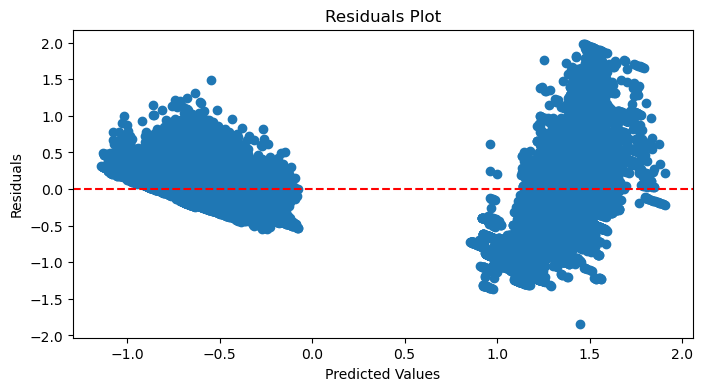

Do you want to save the result? Y/N:  y


In [116]:
model_validation(LinearRegression(), xtrain, ytrain, xtest, ytest)

R-Squared Train:  0.04530123660752372
R-Squared Test:  0.04538870529577044
Mean squared error:  0.9539787977410377
Root mean squared error:  0.9767183820022216
Mean absolute error:  0.8416954279684963
Mean absolute percentage error:  1.050631822226348


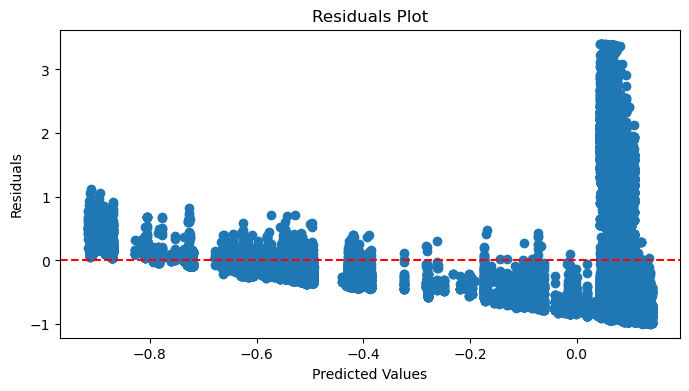

Do you want to save the result? Y/N:  y


In [122]:
model_validation(Lasso(), xtrain, ytrain, xtest, ytest)

In [117]:
parameters = {'alpha': [0.0001,0.001, 0.01, 0.1], 
              'max_iter': [500, 1000, 5000]}
gridcv = GridSearchCV(estimator=Lasso(), param_grid= parameters, cv = 3, n_jobs= 8)

gridcv.fit(xtrain, ytrain)

gridcv.best_params_

{'alpha': 0.0001, 'max_iter': 500}

R-Squared Train:  0.904264234740851
R-Squared Test:  0.9040783286882487
Mean squared error:  0.09585811647414827
Root mean squared error:  0.3096096194793506
Mean absolute error:  0.2110006115431912
Mean absolute percentage error:  1.0164312245644442


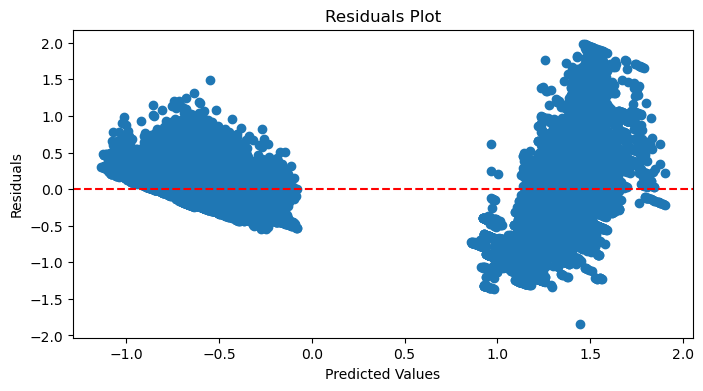

Do you want to save the result? Y/N:  y


In [123]:
model_validation(Lasso(alpha= 0.0001, max_iter= 500), xtrain, ytrain, xtest, ytest)

R-Squared Train:  0.9042798995472601
R-Squared Test:  0.9040862076252054
Mean squared error:  0.09585024275754005
Root mean squared error:  0.30959690366271436
Mean absolute error:  0.21117229187000489
Mean absolute percentage error:  1.016470452234931


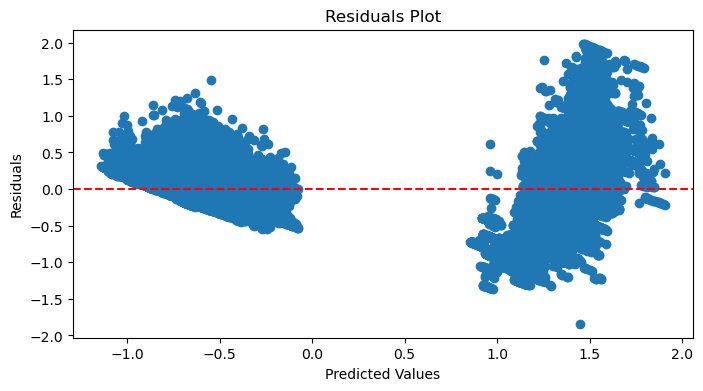

Do you want to save the result? Y/N:  y


In [124]:
model_validation(Ridge(), xtrain, ytrain, xtest, ytest)

In [125]:
parameters = {'alpha': [0.0001,0.001, 0.01, 0.1], 
              'max_iter': [500, 1000, 5000]}
gridcv = GridSearchCV(estimator=Ridge(), param_grid= parameters, cv = 3, n_jobs= 8)

gridcv.fit(xtrain, ytrain)

gridcv.best_params_

{'alpha': 0.1, 'max_iter': 500}

R-Squared Train:  0.9042799065125429
R-Squared Test:  0.9040861381699791
Mean squared error:  0.09585031216674747
Root mean squared error:  0.3095970157587884
Mean absolute error:  0.21117343960149926
Mean absolute percentage error:  1.0164887009860843


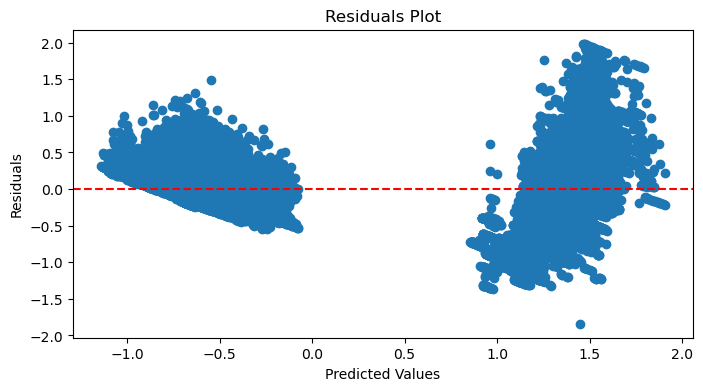

Do you want to save the result? Y/N:  n


In [127]:
model_validation(Ridge(alpha=0.1, max_iter= 500), xtrain, ytrain, xtest, ytest)

R-Squared Train:  0.045301428341799954
R-Squared Test:  0.04538950063165559
Mean squared error:  0.9539780029321183
Root mean squared error:  0.9767179751249172
Mean absolute error:  0.8417079998007378
Mean absolute percentage error:  1.0507845263894073


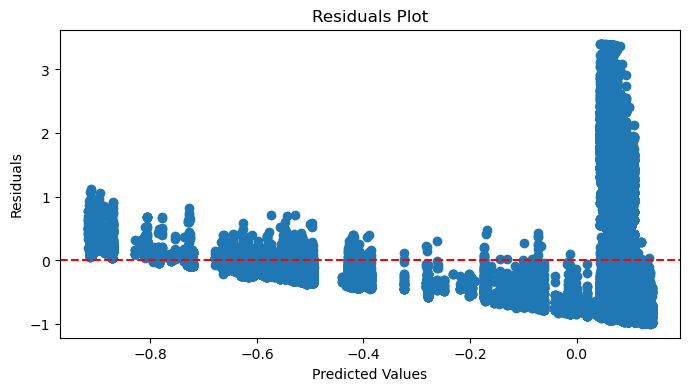

Do you want to save the result? Y/N:  y


In [128]:
model_validation(ElasticNet(), xtrain, ytrain, xtest, ytest)

In [129]:
parameters = {'alpha': [0.0001,0.001, 0.01, 0.1], 
              'max_iter': [500, 1000, 5000]}
gridcv = GridSearchCV(estimator=ElasticNet(), param_grid= parameters, cv = 3, n_jobs= 8)

gridcv.fit(xtrain, ytrain)

gridcv.best_params_

{'alpha': 0.0001, 'max_iter': 500}

R-Squared Train:  0.9042666092019742
R-Squared Test:  0.9040776343185358
Mean squared error:  0.09585881038379243
Root mean squared error:  0.30961074009761425
Mean absolute error:  0.21108813355526745
Mean absolute percentage error:  1.0162941411720956


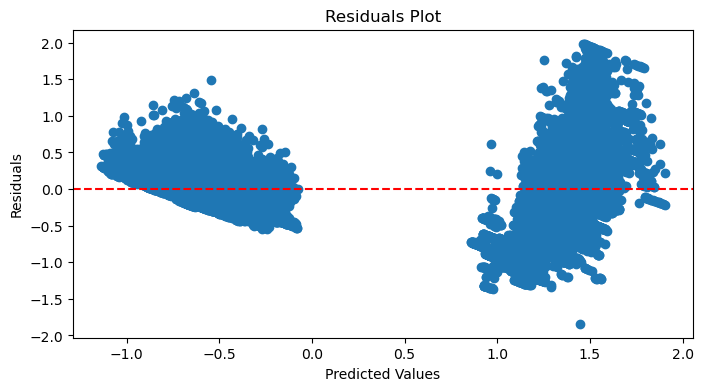

Do you want to save the result? Y/N:  y


In [130]:
model_validation(ElasticNet(alpha=0.0001, max_iter=500), xtrain, ytrain, xtest, ytest)

R-Squared Train:  0.9917628770580864
R-Squared Test:  0.9724173960387311
Mean squared error:  0.027564328550806854
Root mean squared error:  0.1660250841011889
Mean absolute error:  0.09464620580037551
Mean absolute percentage error:  0.33020048106548466


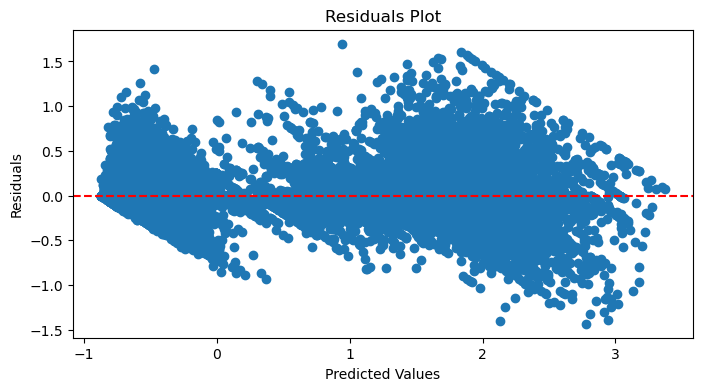

Do you want to save the result? Y/N:  y


In [133]:
model_validation(RandomForestRegressor(), xtrain, ytrain, xtest, ytest)

R-Squared Train:  0.9266477328363238
R-Squared Test:  0.9250124834924591
Mean squared error:  0.0749378320163438
Root mean squared error:  0.2737477525320414
Mean absolute error:  0.18777658053399088
Mean absolute percentage error:  0.6295150603365322


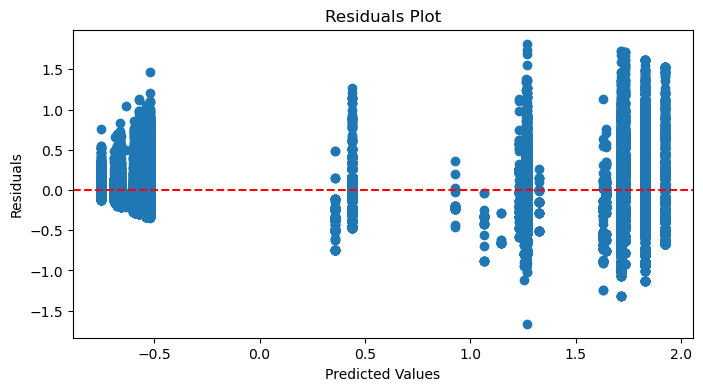

Do you want to save the result? Y/N:  y


In [135]:
model_validation(AdaBoostRegressor(), xtrain, ytrain, xtest, ytest)

In [141]:
parameters = {'n_estimators': [100, 200, 500], 
              'learning_rate': [0.01, 0.05, 0.1]}
gridcv = GridSearchCV(estimator=AdaBoostRegressor(), param_grid= parameters, cv = 3, n_jobs= -1)

gridcv.fit(xtrain, ytrain)

gridcv.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

R-Squared Train:  0.928649608619146
R-Squared Test:  0.9271812946927237
Mean squared error:  0.0727704578056744
Root mean squared error:  0.2697600003812174
Mean absolute error:  0.17974685077644662
Mean absolute percentage error:  0.5146972754639851


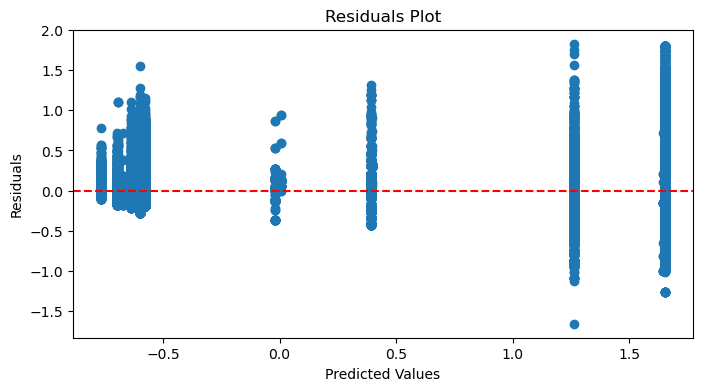

Do you want to save the result? Y/N:  y


In [142]:
model_validation(AdaBoostRegressor(learning_rate=0.01, n_estimators=100), xtrain, ytrain, xtest, ytest)

R-Squared Train:  0.9502457822309274
R-Squared Test:  0.949234677654962
Mean squared error:  0.050731686757027744
Root mean squared error:  0.22523695690767034
Mean absolute error:  0.1468910199801059
Mean absolute percentage error:  0.45280550358924415


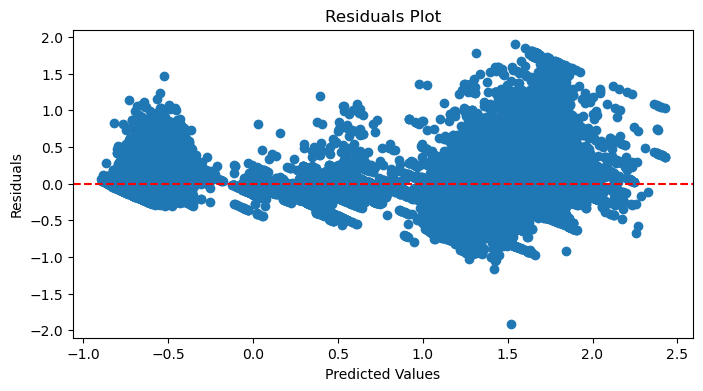

Do you want to save the result? Y/N:  y


In [144]:
model_validation(GradientBoostingRegressor(), xtrain, ytrain, xtest, ytest)

In [145]:
parameters = {'n_estimators': [100, 200, 500], 
              'max_depth': [5, 10], 
              'max_features': ['sqrt', None]}

gridcv = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid= parameters, cv = 3, n_jobs= -1)

gridcv.fit(xtrain, ytrain)

gridcv.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}

R-Squared Train:  0.9874246956847422
R-Squared Test:  0.9792523982178597
Mean squared error:  0.02073385504020088
Root mean squared error:  0.14399255203030772
Mean absolute error:  0.09068725972916557
Mean absolute percentage error:  0.31503361724367646


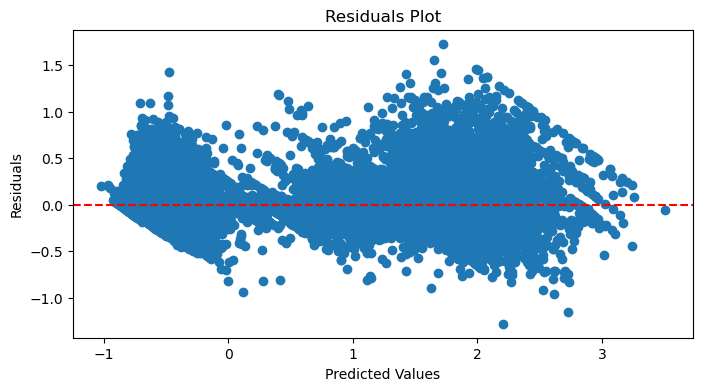

Do you want to save the result? Y/N:  y


In [146]:
model_validation(GradientBoostingRegressor(max_depth=10, max_features='sqrt', n_estimators=500), xtrain, ytrain, xtest, ytest)

In [149]:
parameters = {'n_estimators': [100, 200, 500], 
              'max_depth': [10, 20, 30],
              'max_features': ['sqrt', None]}
gridcv = GridSearchCV(estimator=RandomForestRegressor(), param_grid= parameters, cv = 3, n_jobs= -1)

gridcv.fit(xtrain, ytrain)

gridcv.best_params_

{'max_depth': 20, 'max_features': None, 'n_estimators': 500}

R-Squared Train:  0.9880766598345773
R-Squared Test:  0.9770020927629697
Mean squared error:  0.022982669509834013
Root mean squared error:  0.15160036117976108
Mean absolute error:  0.08858938671319636
Mean absolute percentage error:  0.3161301310975352


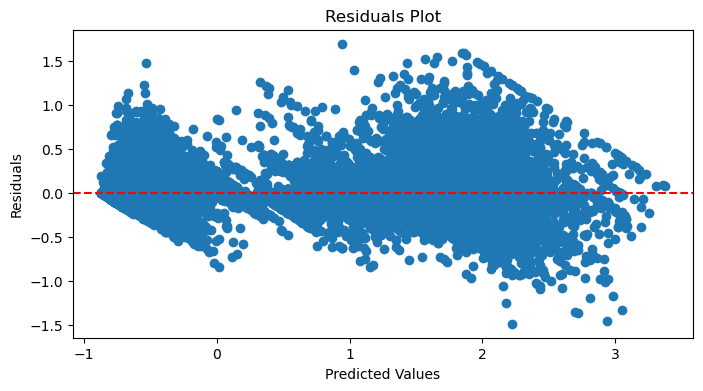

Do you want to save the result? Y/N:  y


In [150]:
model_validation(RandomForestRegressor(n_estimators=500, max_depth=20, max_features=None), xtrain, ytrain, xtest, ytest)

R-Squared Train:  0.9764897605867443
R-Squared Test:  0.97488479487106
Mean squared error:  0.025098564543329795
Root mean squared error:  0.15842526485169528
Mean absolute error:  0.10297287977387354
Mean absolute percentage error:  0.34703172955767997


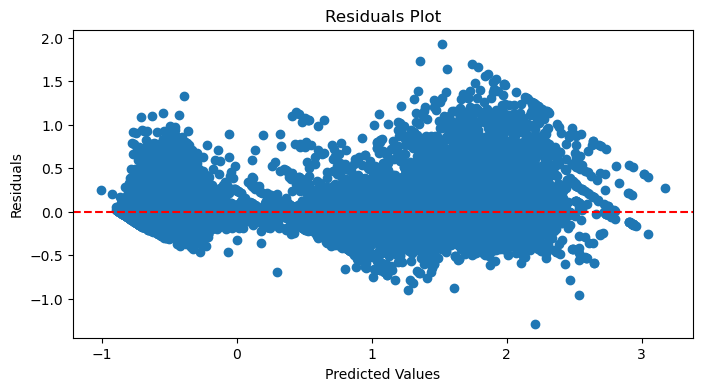

Do you want to save the result? Y/N:  y


In [151]:
from xgboost import XGBRegressor
model_validation(XGBRegressor(), xtrain, ytrain, xtest, ytest)

In [153]:
parameters = {'n_estimators': [100, 300, 500], 
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 6, 9]}

gridcv = GridSearchCV(estimator=XGBRegressor(), param_grid= parameters, cv = 3, n_jobs= -1)

gridcv.fit(xtrain, ytrain)

gridcv.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}

R-Squared Train:  0.9873716930690796
R-Squared Test:  0.9809366979994777
Mean squared error:  0.019050671225367424
Root mean squared error:  0.13802416898995415
Mean absolute error:  0.08504039361310056
Mean absolute percentage error:  0.30667016125815716


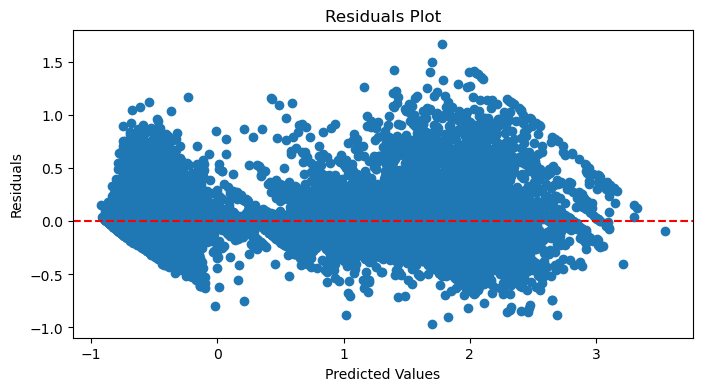

Do you want to save the result? Y/N:  y


In [155]:
model_validation(XGBRegressor(n_estimators = 500, learning_rate = 0.1, max_depth = 9), xtrain, ytrain, xtest, ytest)

In [156]:
scorecard

Model  R-squared Train  \
0                                  LinearRegression()         0.904280   
1                                             Lasso()         0.045301   
2                   Lasso(alpha=0.0001, max_iter=500)         0.904264   
3                                             Ridge()         0.904280   
4                                        ElasticNet()         0.045301   
5              ElasticNet(alpha=0.0001, max_iter=500)         0.904267   
6                             RandomForestRegressor()         0.991763   
7                                 AdaBoostRegressor()         0.926648   
8   AdaBoostRegressor(learning_rate=0.01, n_estima...         0.928650   
9                         GradientBoostingRegressor()         0.950246   
10  GradientBoostingRegressor(max_depth=10, max_fe...         0.987425   
11  RandomForestRegressor(max_depth=20, max_featur...         0.988077   
12  XGBRegressor(base_score=None, booster=None, ca...         0.976490   
13  XGBRegressor(base_score=None, booster=None, ca...         0.987372   

    R-squared Test       MSE      RMSE       MAE      MAPE  
0         0.904086  0.095850  0.309597  0.211174  1.016491  
1         0.045389  0.953979  0.976718  0.841695  1.050632  
2         0.904078  0.095858  0.309610  0.211001  1.016431  
3         0.904086  0.095850  0.309597  0.211172  1.016470  
4         0.045390  0.953978  0.976718  0.841708  1.050785  
5         0.904078  0.095859  0.309611  0.211088  1.016294  
6         0.972417  0.027564  0.166025  0.094646  0.330200  
7         0.925012  0.074938  0.273748  0.187777  0.629515  
8         0.927181  0.072770  0.269760  0.179747  0.514697  
9         0.949235  0.050732  0.225237  0.146891  0.452806  
10        0.979252  0.020734  0.143993  0.090687  0.315034  
11        0.977002  0.022983  0.151600  0.088589  0.316130  
12        0.974885  0.025099  0.158425  0.102973  0.347032  
13        0.980937  0.019051  0.138024  0.085040  0.306670

Amongst all other models we can see that the XGBoost with the tuned parameters have done the best predictions with R squared score being 98.73% and MAPE score of 30.66%.